# Capstone Project: Predicting the S&P 500 Using Trump's Part1: NLP

- James M. Irving
- james.irving.phd@gmail.com
- Updated as of 06/18/21

Flatiron Full Time Data Science 021119 Cohort


>- **Note: this notebook (`Capstone_Project_part1_NLP.ipynb`) is one of 3 project notebooks..** 
    1. **Tweet Preprocessing and NLP Classifications**
    2. Time Series Modeling of S&P 500
    3. Combined NLP + Time Series Modeling with S&P500 and Trump's Tweets

# 📚 ABSTRACT:

> Stock Market prices are notoriously difficult to model, but advances in machine learning algorithms in recent years provide renewed possibilities in accurately modeling market performance. One notable addition in modern machine learning is that of Natural Language Processing (NLP). For those modeling a specific stock, performing NLP feature extraction and analysis on the collection of news headlines, shareholder documents, or social media postings that mention the company can provide additional information about the human/social elements to predicting market behaviors. These insights could not be captured by historical price data and technical indicators alone.

> President Donald J. Trump is one of the most prolific users of social media, specifically Twitter, using it as a direct messaging channel to his followers, avoiding the traditional filtering and restriction that normally controls the public influence of the President of the United States. An additional element of the presidency that Trump has avoided is that of financial transparency and divesting of assets. Historically, this is done in order to avoid conflicts of interest, apparent or actual. The president is also known to target companies directly with his Tweets, advocating for specific changes/decisions by the company, or simply airing his greivances. This leads to the natural question, how much influence *does* President Trump exert over the financial markets? 

> To explore this question, we built multiple types of models attempting to answer this question, using the S&P500 as our market index. First, we built a classification model to predict the change in stock price 60 mins after the tweet. We trained Word2Vec embeddings on President Trump's tweets since his election, which we used as the embedding layer for LSTM and GRU neural networks. 

> We next build a baseline time series regression model, using historical price data alone to predict price by trading-hour. We then built upon this, adding several technical indicators of market performance as additional features. 
Finally, we combined the predicitons of our classification model, as well as several other metrics about the tweets (sentiment scores, # of retweets/favorites, upper-to-lowercase ratio,etc.) to see if combining all of these sources of information could explain even more of the variance in stock market prices. 



## Table of Contents Legend

- 📚: Info sections
- 🕹: Coding sections
    - 🎛: **yperparameters to tune**
    - 🏋️: fitting models
    - 🤔: New Things to Potentially Try 
- Use the Table of Contents view on the left sidebar to find the relevant sections (button looks like a bulleted list)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Capstone-Project:-Predicting-the-S&amp;P-500-Using-Trump's-Part1:-NLP" data-toc-modified-id="Capstone-Project:-Predicting-the-S&amp;P-500-Using-Trump's-Part1:-NLP-1">Capstone Project: Predicting the S&amp;P 500 Using Trump's Part1: NLP</a></span></li><li><span><a href="#📚-ABSTRACT:" data-toc-modified-id="📚-ABSTRACT:-2">📚 ABSTRACT:</a></span><ul class="toc-item"><li><span><a href="#Table-of-Contents-Legend" data-toc-modified-id="Table-of-Contents-Legend-2.1">Table of Contents Legend</a></span></li><li><span><a href="#📚-MAIN-QUESTION:" data-toc-modified-id="📚-MAIN-QUESTION:-2.2">📚 MAIN QUESTION:</a></span><ul class="toc-item"><li><span><a href="#REFERENCES-/-INSPIRATION:" data-toc-modified-id="REFERENCES-/-INSPIRATION:-2.2.1">REFERENCES / INSPIRATION:</a></span></li></ul></li><li><span><a href="#OVERVIEW-OF-DATA/FEATURES-USED-PER-MODEL" data-toc-modified-id="OVERVIEW-OF-DATA/FEATURES-USED-PER-MODEL-2.3">OVERVIEW OF DATA/FEATURES USED PER MODEL</a></span><ul class="toc-item"><li><span><a href="#FINAL-MODEL:-COMBINING-STOCK-MARKET-DATA,--NLP-CLASSIFICATION,-AND-OTHER-TWEET-METRICS" data-toc-modified-id="FINAL-MODEL:-COMBINING-STOCK-MARKET-DATA,--NLP-CLASSIFICATION,-AND-OTHER-TWEET-METRICS-2.3.1">FINAL MODEL: COMBINING STOCK MARKET DATA,  NLP CLASSIFICATION, AND OTHER TWEET METRICS</a></span></li></ul></li><li><span><a href="#OSEMN-FRAMEWORK" data-toc-modified-id="OSEMN-FRAMEWORK-2.4">OSEMN FRAMEWORK</a></span><ul class="toc-item"><li><span><a href="#OBTAIN" data-toc-modified-id="OBTAIN-2.4.1"><a href="#OBTAIN">OBTAIN</a></a></span></li><li><span><a href="#SCRUB" data-toc-modified-id="SCRUB-2.4.2"><a href="#SCRUB">SCRUB</a></a></span></li><li><span><a href="#EXPLORE-/-VISUALIZE" data-toc-modified-id="EXPLORE-/-VISUALIZE-2.4.3"><a href="#EXPLORE/VISUALIZE">EXPLORE / VISUALIZE</a></a></span></li><li><span><a href="#MODELING-(Initial)" data-toc-modified-id="MODELING-(Initial)-2.4.4"><a href="#INITIAL-MODELING">MODELING (Initial)</a></a></span></li><li><span><a href="#iNTERPRETATION" data-toc-modified-id="iNTERPRETATION-2.4.5">iNTERPRETATION</a></span></li></ul></li></ul></li><li><span><a href="#OBTAIN" data-toc-modified-id="OBTAIN-3">OBTAIN</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Importing-Functions" data-toc-modified-id="Importing-Functions-3.0.1">Importing Functions</a></span></li><li><span><a href="#📚-DATA-SOURCES:" data-toc-modified-id="📚-DATA-SOURCES:-3.0.2">📚 DATA SOURCES:</a></span></li></ul></li></ul></li><li><span><a href="#SCRUB" data-toc-modified-id="SCRUB-4">SCRUB</a></span><ul class="toc-item"><li><span><a href="#📚-TRUMP'S-TWEETS" data-toc-modified-id="📚-TRUMP'S-TWEETS-4.1">📚 TRUMP'S TWEETS</a></span><ul class="toc-item"><li><span><a href="#Natural-Language-Processing-Info" data-toc-modified-id="Natural-Language-Processing-Info-4.1.1">Natural Language Processing Info</a></span></li><li><span><a href="#🎛Tweet-Processing" data-toc-modified-id="🎛Tweet-Processing-4.1.2">🎛Tweet Processing</a></span></li><li><span><a href="#Calculating-delta_price_class-for-Each-Tweet" data-toc-modified-id="Calculating-delta_price_class-for-Each-Tweet-4.1.3">Calculating <code>delta_price_class</code> for Each Tweet</a></span></li><li><span><a href="#Add-Delta-Stock-Price-Data---For-Each-Tweet" data-toc-modified-id="Add-Delta-Stock-Price-Data---For-Each-Tweet-4.1.4">Add Delta Stock Price Data - For <em>Each</em> Tweet</a></span></li><li><span><a href="#Determining-Cutoffs-for-Delta-Price-Classes" data-toc-modified-id="Determining-Cutoffs-for-Delta-Price-Classes-4.1.5">Determining Cutoffs for Delta Price Classes</a></span></li></ul></li><li><span><a href="#EXPLORE/VISUALIZE" data-toc-modified-id="EXPLORE/VISUALIZE-4.2">EXPLORE/VISUALIZE</a></span><ul class="toc-item"><li><span><a href="#Delta-Price-Classes" data-toc-modified-id="Delta-Price-Classes-4.2.1">Delta Price Classes</a></span></li><li><span><a href="#NLP-by-Delta-Price-Class" data-toc-modified-id="NLP-by-Delta-Price-Class-4.2.2">NLP by Delta Price Class</a></span></li></ul></li></ul></li><li><span><a href="#INITIAL-MODELING" data-toc-modified-id="INITIAL-MODELING-5">INITIAL MODELING</a></span><ul class="toc-item"><li><span><a href="#TWEET-DELTA-PRICE-CLASSIFICATON" data-toc-modified-id="TWEET-DELTA-PRICE-CLASSIFICATON-5.1">TWEET DELTA PRICE CLASSIFICATON</a></span><ul class="toc-item"><li><span><a href="#Creating-Word-Embeddings-with-Word2Vec" data-toc-modified-id="Creating-Word-Embeddings-with-Word2Vec-5.1.1">Creating Word Embeddings with Word2Vec</a></span></li><li><span><a href="#Class-Balancing" data-toc-modified-id="Class-Balancing-5.1.2">Class Balancing</a></span></li><li><span><a href="#Target-Params" data-toc-modified-id="Target-Params-5.1.3">Target Params</a></span></li><li><span><a href="#Tokenization,-X,y-train-test-split" data-toc-modified-id="Tokenization,-X,y-train-test-split-5.1.4">Tokenization, X,y train-test-split</a></span></li><li><span><a href="#" data-toc-modified-id="-5.1.5"></a></span></li></ul></li><li><span><a href="#Updated-Modeling-Functions" data-toc-modified-id="Updated-Modeling-Functions-5.2">Updated Modeling Functions</a></span></li><li><span><a href="#Model-0" data-toc-modified-id="Model-0-5.3">Model 0</a></span><ul class="toc-item"><li><span><a href="#Calculating-Class-Weights" data-toc-modified-id="Calculating-Class-Weights-5.3.1">Calculating Class Weights</a></span></li><li><span><a href="#Simple-LSTM---Fresh-Embedding" data-toc-modified-id="Simple-LSTM---Fresh-Embedding-5.3.2">Simple LSTM - Fresh Embedding</a></span></li><li><span><a href="#Making-Keras-embedding-from-W2V" data-toc-modified-id="Making-Keras-embedding-from-W2V-5.3.3">Making Keras embedding from W2V</a></span></li><li><span><a href="#Compare-to-a-Dummy-Classifier" data-toc-modified-id="Compare-to-a-Dummy-Classifier-5.3.4">Compare to a Dummy Classifier</a></span></li></ul></li></ul></li><li><span><a href="#BOOKMARK-06/17/21" data-toc-modified-id="BOOKMARK-06/17/21-6">BOOKMARK 06/17/21</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Model-0A-Summary" data-toc-modified-id="Model-0A-Summary-6.0.1">Model 0A Summary</a></span></li></ul></li><li><span><a href="#Model-0B" data-toc-modified-id="Model-0B-6.1">Model 0B</a></span><ul class="toc-item"><li><span><a href="#Model-0B-Summary" data-toc-modified-id="Model-0B-Summary-6.1.1">Model 0B Summary</a></span></li></ul></li></ul></li><li><span><a href="#FORECASTING-STOCK-MARKET-PRICE" data-toc-modified-id="FORECASTING-STOCK-MARKET-PRICE-7">FORECASTING STOCK MARKET PRICE</a></span><ul class="toc-item"><li><span><a href="#Loading-&amp;-Processing-Stock-Data-(SCRUB)" data-toc-modified-id="Loading-&amp;-Processing-Stock-Data-(SCRUB)-7.1">Loading &amp; Processing Stock Data (SCRUB)</a></span></li><li><span><a href="#Load-in-raw-text-file-with-minute-resolutin-S&amp;P-500-prices" data-toc-modified-id="Load-in-raw-text-file-with-minute-resolutin-S&amp;P-500-prices-7.2">Load in raw text file with minute-resolutin S&amp;P 500 prices</a></span></li><li><span><a href="#Model-1:-Using-Price-as-only-feature" data-toc-modified-id="Model-1:-Using-Price-as-only-feature-7.3">Model 1: Using Price as only feature</a></span><ul class="toc-item"><li><span><a href="#Model-1-Summary" data-toc-modified-id="Model-1-Summary-7.3.1">Model 1 Summary</a></span></li></ul></li><li><span><a href="#Model-2:-Stock-Price-+-Technical-Indicators" data-toc-modified-id="Model-2:-Stock-Price-+-Technical-Indicators-7.4">Model 2: Stock Price + Technical Indicators</a></span><ul class="toc-item"><li><span><a href="#Technical-Indicator-Details" data-toc-modified-id="Technical-Indicator-Details-7.4.1">Technical Indicator Details</a></span></li><li><span><a href="#Model-2:-Summary" data-toc-modified-id="Model-2:-Summary-7.4.2">Model 2: Summary</a></span></li></ul></li></ul></li><li><span><a href="#PART-4:-COMBINING-TWEET-STATS,-NLP-CLASSIFICATION,-AND-MARKET-DATA" data-toc-modified-id="PART-4:-COMBINING-TWEET-STATS,-NLP-CLASSIFICATION,-AND-MARKET-DATA-8">PART 4: COMBINING TWEET STATS, NLP CLASSIFICATION, AND MARKET DATA</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Loading-in-NLP-Model-for-Predictions" data-toc-modified-id="Loading-in-NLP-Model-for-Predictions-8.0.1">Loading in NLP Model for Predictions</a></span></li><li><span><a href="#Get-Predictions-for-Hour-Binned-Tweets" data-toc-modified-id="Get-Predictions-for-Hour-Binned-Tweets-8.0.2">Get Predictions for Hour-Binned Tweets</a></span></li></ul></li><li><span><a href="#Model-3:-Stock-Price-+-Indicators-+-NLP-Preds-&amp;-Tweet-Features" data-toc-modified-id="Model-3:-Stock-Price-+-Indicators-+-NLP-Preds-&amp;-Tweet-Features-8.1">Model 3: Stock Price + Indicators + NLP Preds &amp; Tweet Features</a></span><ul class="toc-item"><li><span><a href="#Finalize-colums-for-final-model" data-toc-modified-id="Finalize-colums-for-final-model-8.1.1">Finalize colums for final model</a></span></li><li><span><a href="#Model-3-Summary" data-toc-modified-id="Model-3-Summary-8.1.2">Model 3 Summary</a></span></li></ul></li><li><span><a href="#Model-X:-XGB-Regression-+-Feature-Importance" data-toc-modified-id="Model-X:-XGB-Regression-+-Feature-Importance-8.2">Model X: XGB Regression + Feature Importance</a></span><ul class="toc-item"><li><span><a href="#Model-Interpretation" data-toc-modified-id="Model-Interpretation-8.2.1">Model Interpretation</a></span></li><li><span><a href="#Model-X-Summary" data-toc-modified-id="Model-X-Summary-8.2.2">Model X Summary</a></span></li></ul></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-9">Summary</a></span></li></ul></div>

## 📚 MAIN QUESTION:

> #### **Can the Twitter activity of Donald Trump explain fluctuations in the stock market?**

**We will use a combination of traditional stock market forecasting combined with Natural Language Processing and word embeddings from President Trump's tweets to predict fluctuations in the stock market (using S&P 500 as index).**

>- **Question 1: Can we predict if stock prices will go up or down at a fixed time point, based on the language in Trump's tweets?**
    - [NLP Model 0](#Model-0)<br><br>
    
- Question 2: How well can explain stock market fluctuations using only historical price data?
    - [Stock Market Model 1](#Model-1:-Using-Price-as-only-feature)<br><br>
- Question 3: Does adding technical market indicators to our model improve its ability to predict stock prices?
    - [Stock Market Model 2](#Model-2:-Stock-Price-+-Technical-Indicators)<br><br>

- **Question 4: Can the NLP predictions from Question 1, combined with all of the features from Question 3, as well as additional information regarding Trump's Tweets explain even more of the stock market fluctuations?**
    - Stock Market Model 3
    - Stock Market Model X<br><br>

    

### REFERENCES / INSPIRATION:

1. **Stanford Scientific Poster Using NLP ALONE to predict if stock prices increase or decrease 5 mins after Trump tweets.**  
    - [Poster PDF LINK](http://cs229.stanford.edu/proj2017/final-posters/5140843.pdf)
    - Best accuracy was X, goal 1 is to create a classifier on a longer timescale with superior results.
    

2. **TowardsDataScience Blog Plost on "Using the latest advancements in deep learning to predict stock price movements."** 
     - [Blog Post link](https://towardsdatascience.com/aifortrading-2edd6fac689d)

## OVERVIEW OF DATA/FEATURES USED PER MODEL


#### TWITTER DATA - CLASSIFICATION MODEL
**Trained Word2Vec embeddings on collection of Donal Trump's Tweets.**
- Used negative skip-gram method and negative sampling to best represent infrequently used words.
    
**Classified tweets based on change in stock price (delta_price)**
- Calculated price change from time of tweet to 60 mins later.
    - "No Change" if the delta price was < \\$0.05 
    - "Increase" if delta price was >+\\$0.05
    - "Decrease if delta price was >-\\$0.05
    
*NOTE: This model's predictions will become a feature in our final model.*


#### STOCK MARKET (S&P 500) DATA :
##### TIME SERIES FORECASTING USING MARKET DATA
**Model 1: Use price alone to forecast hourly price.**
- Train model using time sequences of 7-trading-hours (1 day) to predict the following hour. 
    * [x] ~~SARIMAX model~~
    * [x] LSTM neural network 

**Model 2: Use price combined with technical indicators.**
    * LSTM neural network
- **Calculate 7 technical indicators from S&P 500 hourly closing price.**
    * [x] 7 days moving average 
    * [x] 21 days moving average
    * [x] exponential moving average
    * [x] momentum
    * [x] Bollinger bands
    * [x] MACD
    
  

### FINAL MODEL: COMBINING STOCK MARKET DATA,  NLP CLASSIFICATION, AND OTHER TWEET METRICS

- **FEATURES FOR FINAL MODEL:**<br><br>
    - **Stock Data:**
        * [x] 7 days moving average 
        * [x] 21 days moving average
        * [x] exponential moving average
        * [x] momentum
        * [x] Bollinger bands
        * [x] MACD<br><br>
    - **Tweet Data:**
        * [x] 'delta_price' prediction classification for body of tweets from prior hour (model 0)
        * [x] Number of tweets in hour
        * [x] Ratio of uppercase:lowercase ratio (case_ratio)
        * [x] Total # of favorites for the tweets
        * [x] Total # of retweets for the tweets
        * [x] Sentiment Scores:
            - [x] Individual negative, neutral, and positive sentiment scores
            - [x] Compound Sentiment Score (combines all 3)
            - [x] sentiment class (+/- compound score)    

## OSEMN FRAMEWORK

### [OBTAIN](#OBTAIN)
- Obtaining 1-min resolution stock market data (S&P 500 Index)
- Obtain batch of historical tweets by President Trump 

### [SCRUB](#SCRUB)
1. **[Tweets](#TRUMP'S-TWEETS)**
    - Preprocessing for Natural Language Processing<br><br>
2. **[Stock Market](#Loading-&-Processing-Stock-Data-(SCRUB))**
    - Time frequency conversion
    - Technical Indicator Calculation

### [EXPLORE / VISUALIZE](#EXPLORE/VISUALIZE)
- [Tweet Delta Price Classes](#Delta-Price-Classes) 
- [NLP Figures / Example Tweets](#Natural-Language-Processing)
- [S&P 500 Price](#Model-1:-Using-Price-as-only-feature)
- [S&P 500 Technical Indicators](#Technical-Indicator-Details)

### [MODELING (Initial)](#INITIAL-MODELING)
- [Delta-Stock-Price NLP Classifier](#TWEET-DELTA-PRICE-CLASSIFICATON)
- [S&P 500 Neural Network (price only)] ( )

### iNTERPRETATION 
- Delta-Stock-Price NLP Models
    - Model 0A Summary
    - Model 0B Summary
    
- Stock-Market-Forecasting
    - Model 1 Summary
    - Model 2 Summary
    - Model 3 Summary
    - Model 4 Summary
- Final Summary

# OBTAIN

### Importing Functions

In [111]:
## Personal Functions 
# Note: the bs_ds package on pip is not compatible with python 3.8+
# Therefore I am importing it locally instead

## IMPORT CUSTOM CAPSTONE FUNCTIONS
%load_ext autoreload
%autoreload 2 
import bsds as bs
from bsds import ihelp,ihelp_menu,reload, inspect_variables
from bsds import functions_combined_BEST as ji
from bsds import functions_io as io
# from bsds.imports import *


## The Basics 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os,glob,sys,time

#Set pd.set_options for tweet visibility
pd.set_option('display.max_colwidth',200)
pd.set_option('display.max_columns',50)


print(f"Pandas v: \t {pd.__version__:>5}")
print(f"Numpy v: \t{np.__version__:>5}")
print(f"Seaborn v:\t {sns.__version__:>5}")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Pandas v: 	 1.2.4
Numpy v: 	1.18.5
Seaborn v:	 0.11.0


In [112]:
## NLP TOOLS
import nltk
# nltk.download('vader_lexicon')

In [113]:
# Import plotly and cufflinks for iplots
import plotly
import cufflinks as cf
from plotly import graph_objs as go
from plotly.offline import iplot
cf.go_offline()

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [114]:
## IMPORT CONVENIENCE FUNCTIONS
from pprint import pprint
# import qgrid
import json

In [115]:
file_dict = io.def_filename_dictionary(load_prior=False, save_directory=True)
# file_dict = ji.load_filename_directory()

------------ Dictionary Contents ------------


interactive(children=(Dropdown(description='dict_to_display', options={'file_directory': {'history': '', 'file…

[i] filename_directory saved to data/filename_dictionary.json.
	 - use `update_file_directory(file_dict)` to update file.
[i] creating all required folders...


### 📚 DATA SOURCES:

* **All Donald Trump tweets from 12/01/2016 (pre-inaugaration day) to end of 08/23/2018**
    *          Extracted from http://www.trumptwitterarchive.com/

* **Minute-resolution data for the S&P500 covering the same time period.**
    *         IVE S&P500 Index from - http://www.kibot.com/free_historical_data.aspx
    
    
* NOTE: Both sources required manual extraction and both 1-min historical stock data and batch-historical-tweet data are difficult to obtain without paying \\$150-\\$2000 monthly developer memberships. 

In [116]:
DOWNLOAD_STOCK_DATA = False
DOWNLOAD_TWEET_DATA = False

In [117]:
## DOWNLOAD THE DATA IF REQUESTED
if DOWNLOAD_TWEET_DATA:
    print('[i] Downoading data sets...')
    tweets = bs.data.download_trump_tweets()
    
else: 
    ## Or Load in Most Recent Files
    print('[i] Loading most recent data set...')
    
    ## Check for prx-existing files
    files_glob = glob.glob('data/*.csv')
    tweet_files = list(filter(lambda x: 'tweet' in x, files_glob))


    ## Get Time Files Modified 
    TWEET_FILES = {f:pd.to_datetime(time.ctime(os.path.getmtime(f))) for f in tweet_files}

    ## Get most recent files using idxmin
    recent_tweets = pd.Series(TWEET_FILES).idxmax()
    
    ## Load in the csvs with datetime indices
    try:
        tweets = pd.read_csv(recent_tweets,parse_dates=['date'],index_col='date')
    except:
        tweets = pd.read_csv(recent_tweets)
    
    ## Sort timeseries
    tweets.sort_index(inplace=True)
    
    
    
## Display Preview of DFs
display(tweets.head())

[i] Loading most recent data set...


,id,text,isRetweet,isDeleted,device,favorites,retweets,isFlagged
date,,,,,,,,
2009-05-04 18:54:25,1698308935,Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight!,f,f,Twitter Web Client,939,519,f
2009-05-05 01:00:10,1701461182,Donald Trump will be appearing on The View tomorrow morning to discuss Celebrity Apprentice and his new book Think Like A Champion!,f,f,Twitter Web Client,259,34,f
2009-05-08 13:38:08,1737479987,Donald Trump reads Top Ten Financial Tips on Late Show with David Letterman: http://tinyurl.com/ooafwn - Very funny!,f,f,Twitter Web Client,37,15,f
2009-05-08 20:40:15,1741160716,New Blog Post: Celebrity Apprentice Finale and Lessons Learned Along the Way: http://tinyurl.com/qlux5e,f,f,Twitter Web Client,29,11,f
2009-05-12 14:07:28,1773561338,"""""""My persona will never be that of a wallflower - I’d rather build walls than cling to them"""" --Donald J. Trump""",f,f,Twitter Web Client,1877,1321,f


In [118]:
## DOWNLOAD THE DATA IF REQUESTED
if DOWNLOAD_STOCK_DATA:
    print('[i] Downoading data sets...')
    stock_df = bs.data.download_stock_data()
    
else: 
    ## Or Load in Most Recent Files
    print('[i] Loading most recent data sets...')
    
    ## Check for prx-existing files
    files_glob = glob.glob('data/*.csv*')
    stock_files = list(filter(lambda x: 'ive_minute' in x, files_glob))


    ## Get Time Files Modified 
    STOCK_FILES = {f:pd.to_datetime(time.ctime(os.path.getmtime(f))) for f in stock_files}

    ## Get most recent files using idxmin
    recent_stocks = pd.Series(STOCK_FILES).idxmax()
    
    ## Load in the csvs with datetime indices
    stock_df = pd.read_csv(recent_stocks)#,parse_dates=['date'],index_col='date')
    
    ## Sort timeseries
    stock_df.sort_index(inplace=True)
    
    
## Display Preview of DFs
stock_df

[i] Loading most recent data sets...


,Date,Time,BidOpen,BidHigh,BidLow,BidClose,AskOpen,AskHigh,AskLow,AskClose,datetime
0,09/28/2009,09:30,38.50,38.50,38.50,38.50,38.57,38.57,38.57,38.57,2009-09-28 09:30:00
1,09/28/2009,09:31,38.54,38.54,38.51,38.53,38.55,38.55,38.54,38.55,2009-09-28 09:31:00
2,09/28/2009,09:32,38.55,38.58,38.55,38.58,38.56,38.60,38.56,38.60,2009-09-28 09:32:00
3,09/28/2009,09:33,38.58,38.58,38.58,38.58,38.58,38.60,38.58,38.59,2009-09-28 09:33:00
4,09/28/2009,09:34,38.58,38.58,38.56,38.56,38.59,38.59,38.58,38.58,2009-09-28 09:34:00
...,...,...,...,...,...,...,...,...,...,...,...
970319,06/17/2021,15:57,146.38,146.40,146.35,146.35,146.40,146.41,146.36,146.37,2021-06-17 15:57:00
970320,06/17/2021,15:58,146.36,146.40,146.35,146.39,146.37,146.41,146.37,146.40,2021-06-17 15:58:00
970321,06/17/2021,15:59,146.38,146.41,146.34,146.35,146.40,146.43,146.37,146.37,2021-06-17 15:59:00
970322,06/17/2021,16:00,146.34,146.34,146.34,146.34,146.39,146.39,146.39,146.39,2021-06-17 16:00:00


# SCRUB

In [119]:
tweets.sort_index()

,id,text,isRetweet,isDeleted,device,favorites,retweets,isFlagged
date,,,,,,,,
2009-05-04 18:54:25,1698308935,Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight!,f,f,Twitter Web Client,939,519,f
2009-05-05 01:00:10,1701461182,Donald Trump will be appearing on The View tomorrow morning to discuss Celebrity Apprentice and his new book Think Like A Champion!,f,f,Twitter Web Client,259,34,f
2009-05-08 13:38:08,1737479987,Donald Trump reads Top Ten Financial Tips on Late Show with David Letterman: http://tinyurl.com/ooafwn - Very funny!,f,f,Twitter Web Client,37,15,f
2009-05-08 20:40:15,1741160716,New Blog Post: Celebrity Apprentice Finale and Lessons Learned Along the Way: http://tinyurl.com/qlux5e,f,f,Twitter Web Client,29,11,f
2009-05-12 14:07:28,1773561338,"""""""My persona will never be that of a wallflower - I’d rather build walls than cling to them"""" --Donald J. Trump""",f,f,Twitter Web Client,1877,1321,f
...,...,...,...,...,...,...,...,...
2021-01-06 21:17:24,1346928882595885058,https://t.co/Pm2PKV0Fp3,f,f,Twitter for iPhone,0,0,f
2021-01-06 23:01:04,1346954970910707712,These are the things and events that happen when a sacred landslide election victory is so unceremoniously &amp; viciously stripped away from great patriots who have been badly &amp; unfairly trea...,f,f,Twitter for iPhone,0,0,f
2021-01-08 00:10:24,1347334804052844550,https://t.co/csX07ZVWGe,f,f,Twitter Media Studio,629326,154877,f


## 📚 TRUMP'S TWEETS

### Natural Language Processing Info



To prepare Donal Trump's tweets for modeling, **it is essential to preprocess the text** and simplify its contents.
<br><br>
1. **At a minimum, things like:**
    - punctuation
    - numbers
    - upper vs lowercase letters<br>
    ***must*** be addressed before any initial analyses. I refer tho this initial cleaning as **"minimal cleaning"** of the text content<br>
    
> Version 1 of the tweet processing removes these items, as well as the removal of any urls in a tweet. The resulting data column is referred to here as "content_min_clean".

<br><br>
2. It is **always recommended** that go a step beyond this and<br> remove **commonly used words that contain little information** <br>for our machine learning algorithms. Words like: (the,was,he,she, it,etc.)<br> are called **"stopwords"**, and it is critical to address them as well.

> Version 2 of the tweet processing removes these items and the resulting data column is referred here as `cleaned_stopped_content`

<br>

3. Additionally, many analyses **need the text tokenzied** into a list of words<br> and not in a natural sentence format. Instead, they are a list of words (**tokens**) separated by ",", which tells the algorithm what should be considered one word.<br><br>For the tweet processing, I used a version of tokenization, called `regexp_tokenziation` <br>which uses pattern of letters and symbols (the `expression`) <br>that indicate what combination of alpha numeric characters should be considered a single token.<br><br>The pattern I used was `"([a-zA-Z]+(?:'[a-z]+)?)"`, which allows for words such as "can't" that contain "'" in the middle of word. This processes was actually applied in order to process Version 1 and 2 of the Tweets, but the resulting text was put back into sentence form. 

> Version 3 of the tweets keeps the text in their regexp-tokenized form and is reffered to as `cleaned_stopped_tokens`
<br>

4. While not always required, it is often a good idea to reduce similar words down to a shared core.
There are often **multiple variants of the same word with the same/simiar meaning**,<br> but one may plural **(i.e. "democrat" and "democrats")**, or form of words is different **(i.e. run, running).**<br> Simplifying words down to the basic core word (or word *stem*) is referred to as **"stemming"**. <br><br> A more advanced form of this also understands things like words that are just in a **different tense** such as  i.e.  **"ran", "run", "running"**. This process is called  **"lemmatization**, where the words are reduced to their simplest form, called "**lemmas**"<br>  
> Version 4 of the tweets are all reduced down to their word lemmas, futher aiding the algorithm in learning the meaning of the texts.


### 🎛Tweet Processing

In [120]:
## SHow interactive code menus
SHOW_MENUS = False

if SHOW_MENUS:
    ihelp_menu([ji.load_raw_twitter_file,
               ji.make_stopwords_list,
               ji.full_twitter_df_processing,
               ji.full_sentiment_analysis])

In [121]:
## Load in raw csv of twitter_data, create date_time_index, rename columns
raw_tweets = file_dict['twitter_df']['raw_tweet_file']
twitter_df = ji.load_raw_twitter_file(filename=raw_tweets, 
                         date_as_index=True,
                         rename_map={'text': 'content',
                                     'created_at': 'date'})

## Create list of stopwords for twitter processing
stop_words = ji.make_stopwords_list(incl_punc=True, incl_nums=True,
                                    add_custom=['http','https',
                                                '...','…','``',
                                                'co','“','“','’','‘','”',
                                                "n't","''",'u','s',"'s",
                                                '|','\\|','amp',"i'm","mr"])

## Process twitter data: 
# 1. create minimally cleaned column `content_min_clean` with urls
twitter_df = ji.full_twitter_df_processing(twitter_df,
                                           raw_tweet_col='content',
                                           name_for_cleaned_tweet_col='content_cleaned',
                                           name_for_stopped_col='cleaned_stopped_content', 
                                           name_for_tokenzied_stopped_col='cleaned_stopped_tokens',
                                           use_col_for_case_ratio=None, 
                                           use_col_for_sentiment='content_min_clean',
                                           RT=True, urls=True, hashtags=True, mentions=True,
                                           str_tags_mentions=True,
                                           stopwords_list=stop_words, force=False)
## Display Index information
ji.index_report(twitter_df,label='twitter_df')

## Check for strings that exceed the correct tweet length
keep_idx = ji.check_length_string_column(twitter_df, 'content_min_clean',length_cutoff=400,display_describe=False)
## verify no issues arise.
if keep_idx.isna().sum()>0:
    raise Exception('')
else:
    twitter_df=twitter_df[keep_idx]
    print(f'removed {np.sum(keep_idx==False)}')

ji.check_length_string_column(twitter_df, 'content_min_clean',length_cutoff=400,return_keep_idx=False)
twitter_df.head(2)

[io] Loading raw tweet text file: data/trumptwitterarchive_export_iphone_only__08_23_2019.csv
[i] case_ratio calculated from content_min_clean before text to lowercase
[i] case->lower and punctuation removed from "content_min_clean" 
[i] stopped text column:  cleaned_stopped_content
[i] tokenized stopped text column:  cleaned_stopped_tokens
[i] lemmaztied columns: cleaned_stopped_lemmas
------------------------------------------------------------
	INDEX REPORT:	twitter_df
------------------------------------------------------------
* Index Endpoints:
	2016-12-01 14:37:57 -- to -- 2019-08-24 03:58:32
* Index Freq:
	None
------------------------------------------------------------
	STRING LENGTH REPORT:	"content_min_clean" column
------------------------------------------------------------
[i] Found 2 # of strings above cutoff of 400 chars.
removed 2
------------------------------------------------------------
	STRING LENGTH REPORT:	"content_min_clean" column
----------------------------

,count,mean,std,min,25%,50%,75%,max
content_min_clean,9320.000000,158.038197,84.030732,0.000000,102.000000,136.000000,251.000000,310.000000


,source,content,date,retweet_count,favorite_count,is_retweet,id_str,has_RT,starts_RT,content_starts_RT,content_cleaned,content_min_clean,case_ratio,content_hashtags,hashtag_strings,content_mentions,mention_strings,cleaned_stopped_content,cleaned_stopped_tokens,cleaned_stopped_lemmas,sentiment_scores,compound_score,sentiment_class,neg,neu,pos
date,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-12-01 14:37:57,Twitter for iPhone,My thoughts and prayers are with those affected by the tragic storms and tornadoes in the Southeastern United States. Stay safe!,2016-12-01 14:37:57,12077,65724,False,804333718999539712,False,False,[],My thoughts and prayers are with those affected by the tragic storms and tornadoes in the Southeastern United States. Stay safe!,my thoughts and prayers are with those affected by the tragic storms and tornadoes in the southeastern united states stay safe,0.03906,[],,[],,thoughts prayers affected tragic storms tornadoes southeastern united states stay safe,"[thoughts, prayers, affected, tragic, storms, tornadoes, southeastern, united, states, stay, safe]",thought prayer affected tragic storm tornado southeastern united state stay safe,"{'neg': 0.168, 'neu': 0.623, 'pos': 0.209, 'compound': 0.2732}",0.2732,pos,0.168,0.623,0.209
2016-12-01 22:52:10,Twitter for iPhone,Heading to U.S. Bank Arena in Cincinnati Ohio for a 7pm rally. Join me! Tickets: https://t.co/HiWqZvHv6M,2016-12-01 22:52:10,5564,31256,False,804458095569158144,False,False,[],Heading to U.S. Bank Arena in Cincinnati Ohio for a 7pm rally. Join me! Tickets:,heading to u s bank arena in cincinnati ohio for a 7pm rally join me tickets,0.11111,[],,[],,heading bank arena cincinnati ohio pm rally join tickets,"[heading, bank, arena, cincinnati, ohio, pm, rally, join, tickets]",heading bank arena cincinnati ohio pm rally join ticket,"{'neg': 0.0, 'neu': 0.845, 'pos': 0.155, 'compound': 0.296}",0.2960,pos,0.000,0.845,0.155


In [122]:
## PREVIEW THE DIFFERENT VERSION OF THE CLEANED DATA
ji.display_same_tweet_diff_cols(twitter_df )

#### TWEET FROM 06-27-2018 15:26:24:

* **["content"] column:**<p><blockquote>***"Harley-Davidson should stay 100% in America with the people that got you your success. I’ve done so much for you and then this. Other companies are coming back where they belong! We won’t forget and neither will your customers or your now very HAPPY competitors!"***

* **["content_min_clean"] column:**<p><blockquote>***"harley davidson should stay 100  in america with the people that got you your success  i’ve done so much for you and then this  other companies are coming back where they belong  we won’t forget and neither will your customers or your now very happy competitors "***

* **["cleaned_stopped_content"] column:**<p><blockquote>***"harley davidson stay america people got success done much companies coming back belong forget neither customers happy competitors"***

* **["cleaned_stopped_tokens"] column:**<p><blockquote>***"['harley', 'davidson', 'stay', 'america', 'people', 'got', 'success', 'done', 'much', 'companies', 'coming', 'back', 'belong', 'forget', 'neither', 'customers', 'happy', 'competitors']"***

* **["cleaned_stopped_lemmas"] column:**<p><blockquote>***"harley davidson stay america people got success done much company coming back belong forget neither customer happy competitor"***

In [123]:
## can also use function to pull up tweets by index
ji.display_same_tweet_diff_cols(twitter_df, index='08-23-2019')

<br>

### Tweet #1 of 46: sent @ *08-23-2019 03:26:23*:

* **["content"] column:**<p><blockquote>***"RT @MariaBartiromo: The economy is poised to continue to expand: Kansas City Fed President https://t.co/MCs8DXQ2yB  @MorningsMaria @FoxBusi…"***

* **["content_min_clean"] column:**<p><blockquote>***"  the economy is poised to continue to expand  kansas city fed president    morningsmaria  foxbusi…"***

* **["cleaned_stopped_content"] column:**<p><blockquote>***"economy poised continue expand kansas city fed president"***

* **["cleaned_stopped_tokens"] column:**<p><blockquote>***"['economy', 'poised', 'continue', 'expand', 'kansas', 'city', 'fed', 'president']"***

* **["cleaned_stopped_lemmas"] column:**<p><blockquote>***"economy poised continue expand kansa city fed president"***

<br>

### Tweet #2 of 46: sent @ *08-23-2019 03:26:57*:

* **["content"] column:**<p><blockquote>***"RT @MariaBartiromo: Another informant the FBI decided to turn on.   Unbelievable.   ⁦@MorningsMaria⁩     ⁦@FoxBusiness⁩ Former Overstock CE…"***

* **["content_min_clean"] column:**<p><blockquote>***"  another informant the fbi decided to turn on    unbelievable    ⁦ morningsmaria⁩     ⁦ foxbusiness⁩ former overstock ce…"***

* **["cleaned_stopped_content"] column:**<p><blockquote>***"another informant fbi decided turn unbelievable former overstock ce"***

* **["cleaned_stopped_tokens"] column:**<p><blockquote>***"['another', 'informant', 'fbi', 'decided', 'turn', 'unbelievable', 'former', 'overstock', 'ce']"***

* **["cleaned_stopped_lemmas"] column:**<p><blockquote>***"another informant fbi decided turn unbelievable former overstock ce"***

<br>

### Tweet #3 of 46: sent @ *08-23-2019 03:27:25*:

* **["content"] column:**<p><blockquote>***"RT @Scavino45: President @realDonaldTrump presents the Presidential Medal of Freedom the nation’s highest civilian honor to legendary @NB…"***

* **["content_min_clean"] column:**<p><blockquote>***"  president  realdonaldtrump presents the presidential medal of freedom the nation’s highest civilian honor to legendary  nb…"***

* **["cleaned_stopped_content"] column:**<p><blockquote>***"president presents presidential medal freedom nation highest civilian honor legendary"***

* **["cleaned_stopped_tokens"] column:**<p><blockquote>***"['president', 'presents', 'presidential', 'medal', 'freedom', 'nation', 'highest', 'civilian', 'honor', 'legendary']"***

* **["cleaned_stopped_lemmas"] column:**<p><blockquote>***"president present presidential medal freedom nation highest civilian honor legendary"***

<br>

### Tweet #4 of 46: sent @ *08-23-2019 03:27:40*:

* **["content"] column:**<p><blockquote>***"RT @MariaBartiromo: https://t.co/6H0ZF1qZZ1 @MorningsMaria @FoxBusiness"***

* **["content_min_clean"] column:**<p><blockquote>***"    morningsmaria  foxbusiness"***

* **["cleaned_stopped_content"] column:**<p><blockquote>***""***

* **["cleaned_stopped_tokens"] column:**<p><blockquote>***"[]"***

* **["cleaned_stopped_lemmas"] column:**<p><blockquote>***""***

<br>

### Tweet #5 of 46: sent @ *08-23-2019 03:27:53*:

* **["content"] column:**<p><blockquote>***"RT @WhiteHouse: Bob Cousy is celebrated as one of the greatest players in the history of basketball.Off the court Cousy fought racism an…"***

* **["content_min_clean"] column:**<p><blockquote>***"  bob cousy is celebrated as one of the greatest players in the history of basketball off the court cousy fought racism an…"***

* **["cleaned_stopped_content"] column:**<p><blockquote>***"bob cousy celebrated one greatest players history basketball court cousy fought racism"***

* **["cleaned_stopped_tokens"] column:**<p><blockquote>***"['bob', 'cousy', 'celebrated', 'one', 'greatest', 'players', 'history', 'basketball', 'court', 'cousy', 'fought', 'racism']"***

* **["cleaned_stopped_lemmas"] column:**<p><blockquote>***"bob cousy celebrated one greatest player history basketball court cousy fought racism"***

<br>

### Tweet #6 of 46: sent @ *08-23-2019 03:28:01*:

* **["content"] column:**<p><blockquote>***"RT @realDonaldTrump: Congratulations to the GREAT Bob Cousy! https://t.co/nNF26OQL6i"***

* **["content_min_clean"] column:**<p><blockquote>***"  congratulations to the great bob cousy  "***

* **["cleaned_stopped_content"] column:**<p><blockquote>***"congratulations great bob cousy"***

* **["cleaned_stopped_tokens"] column:**<p><blockquote>***"['congratulations', 'great', 'bob', 'cousy']"***

* **["cleaned_stopped_lemmas"] column:**<p><blockquote>***"congratulation great bob cousy"***

<br>

### Tweet #7 of 46: sent @ *08-23-2019 03:31:31*:

* **["content"] column:**<p><blockquote>***"RT @ericbolling: A response to @RashidaTlaib and @IlhanMN regarding our great ally #Israel Share this far and wide so that these two US R…"***

* **["content_min_clean"] column:**<p><blockquote>***"  a response to  rashidatlaib and  ilhanmn regarding our great ally  israel share this far and wide so that these two us r…"***

* **["cleaned_stopped_content"] column:**<p><blockquote>***"response regarding great ally share far wide two us r"***

* **["cleaned_stopped_tokens"] column:**<p><blockquote>***"['response', 'regarding', 'great', 'ally', 'share', 'far', 'wide', 'two', 'us', 'r']"***

* **["cleaned_stopped_lemmas"] column:**<p><blockquote>***"response regarding great ally share far wide two u r"***

<br>

### Tweet #8 of 46: sent @ *08-23-2019 03:32:01*:

* **["content"] column:**<p><blockquote>***"RT @VP: Thank you Utah! https://t.co/GOvig2ZZ5p"***

* **["content_min_clean"] column:**<p><blockquote>***"  thank you utah  "***

* **["cleaned_stopped_content"] column:**<p><blockquote>***"thank utah"***

* **["cleaned_stopped_tokens"] column:**<p><blockquote>***"['thank', 'utah']"***

* **["cleaned_stopped_lemmas"] column:**<p><blockquote>***"thank utah"***

<br>

### Tweet #9 of 46: sent @ *08-23-2019 03:41:26*:

* **["content"] column:**<p><blockquote>***".@SenCoryGardner has done a fantastic job representing the people of Colorado. He really knows how to win. Strong on Crime Borders &amp; the 2nd A Cory fights hard for our Military &amp; Vets. John Hickenlooper is badly damaged after his horrible run for President. Big Primary trouble!"***

* **["content_min_clean"] column:**<p><blockquote>***"  sencorygardner has done a fantastic job representing the people of colorado  he really knows how to win  strong on crime borders  amp  the 2nd a cory fights hard for our military  amp  vets  john hickenlooper is badly damaged after his horrible run for president  big primary trouble "***

* **["cleaned_stopped_content"] column:**<p><blockquote>***"done fantastic job representing people colorado really knows win strong crime borders nd cory fights hard military vets john hickenlooper badly damaged horrible run president big primary trouble"***

* **["cleaned_stopped_tokens"] column:**<p><blockquote>***"['done', 'fantastic', 'job', 'representing', 'people', 'colorado', 'really', 'knows', 'win', 'strong', 'crime', 'borders', 'nd', 'cory', 'fights', 'hard', 'military', 'vets', 'john', 'hickenlooper', 'badly', 'damaged', 'horrible', 'run', 'president', 'big', 'primary', 'trouble']"***

* **["cleaned_stopped_lemmas"] column:**<p><blockquote>***"done fantastic job representing people colorado really know win strong crime border nd cory fight hard military vet john hickenlooper badly damaged horrible run president big primary trouble"***

<br>

### Tweet #10 of 46: sent @ *08-23-2019 03:42:02*:

* **["content"] column:**<p><blockquote>***"RT @WhiteHouse: "You're one of the all-time greats in the history of sports" President @realDonaldTrump told basketball legend Bob Cousy i…"***

* **["content_min_clean"] column:**<p><blockquote>***"   you re one of the all time greats in the history of sports  president  realdonaldtrump told basketball legend bob cousy i…"***

* **["cleaned_stopped_content"] column:**<p><blockquote>***"one time greats history sports president told basketball legend bob cousy"***

* **["cleaned_stopped_tokens"] column:**<p><blockquote>***"['one', 'time', 'greats', 'history', 'sports', 'president', 'told', 'basketball', 'legend', 'bob', 'cousy']"***

* **["cleaned_stopped_lemmas"] column:**<p><blockquote>***"one time great history sport president told basketball legend bob cousy"***

<br>

### Tweet #11 of 46: sent @ *08-23-2019 03:43:23*:

* **["content"] column:**<p><blockquote>***"RT @VP: Under the #USMCA Utah will have more jobs more opportunity and more prosperity. Congress needs to pass the #USMCA for the people…"***

* **["content_min_clean"] column:**<p><blockquote>***"  under the  usmca utah will have more jobs more opportunity and more prosperity  congress needs to pass the  usmca for the people…"***

* **["cleaned_stopped_content"] column:**<p><blockquote>***"utah jobs opportunity prosperity congress needs pass people"***

* **["cleaned_stopped_tokens"] column:**<p><blockquote>***"['utah', 'jobs', 'opportunity', 'prosperity', 'congress', 'needs', 'pass', 'people']"***

* **["cleaned_stopped_lemmas"] column:**<p><blockquote>***"utah job opportunity prosperity congress need pas people"***

<br>

### Tweet #12 of 46: sent @ *08-23-2019 03:45:52*:

* **["content"] column:**<p><blockquote>***"Happy birthday James! https://t.co/nx5yo7ajTt"***

* **["content_min_clean"] column:**<p><blockquote>***"happy birthday james  "***

* **["cleaned_stopped_content"] column:**<p><blockquote>***"happy birthday james"***

* **["cleaned_stopped_tokens"] column:**<p><blockquote>***"['happy', 'birthday', 'james']"***

* **["cleaned_stopped_lemmas"] column:**<p><blockquote>***"happy birthday james"***

<br>

### Tweet #13 of 46: sent @ *08-23-2019 03:47:23*:

* **["content"] column:**<p><blockquote>***"RT @WhiteHouse: Because of you America is safe. Because of you America is strong. Because of you America is free. And because of y…"***

* **["content_min_clean"] column:**<p><blockquote>***"  because of you america is safe  because of you america is strong  because of you america is free  and because of y…"***

* **["cleaned_stopped_content"] column:**<p><blockquote>***"america safe america strong america free"***

* **["cleaned_stopped_tokens"] column:**<p><blockquote>***"['america', 'safe', 'america', 'strong', 'america', 'free']"***

* **["cleaned_stopped_lemmas"] column:**<p><blockquote>***"america safe america strong america free"***

<br>

### Tweet #14 of 46: sent @ *08-23-2019 03:49:31*:

* **["content"] column:**<p><blockquote>***"RT @GOPoversight: “It’s kind of troubling to think some Democrats [are] almost wishing for a recession because they think it helps them pol…"***

* **["content_min_clean"] column:**<p><blockquote>***"  “it’s kind of troubling to think some democrats  are  almost wishing for a recession because they think it helps them pol…"***

* **["cleaned_stopped_content"] column:**<p><blockquote>***"kind troubling think democrats almost wishing recession think helps pol"***

* **["cleaned_stopped_tokens"] column:**<p><blockquote>***"['kind', 'troubling', 'think', 'democrats', 'almost', 'wishing', 'recession', 'think', 'helps', 'pol']"***

* **["cleaned_stopped_lemmas"] column:**<p><blockquote>***"kind troubling think democrat almost wishing recession think help pol"***

<br>

### Tweet #15 of 46: sent @ *08-23-2019 03:49:50*:

* **["content"] column:**<p><blockquote>***"RT @Jim_Jordan: Business owners and hard-working Americans tell us every day how great the economy is under President Trump.But now the L…"***

* **["content_min_clean"] column:**<p><blockquote>***"  business owners and hard working americans tell us every day how great the economy is under president trump but now the l…"***

* **["cleaned_stopped_content"] column:**<p><blockquote>***"business owners hard working americans tell us every day great economy president trump l"***

* **["cleaned_stopped_tokens"] column:**<p><blockquote>***"['business', 'owners', 'hard', 'working', 'americans', 'tell', 'us', 'every', 'day', 'great', 'economy', 'president', 'trump', 'l']"***

* **["cleaned_stopped_lemmas"] column:**<p><blockquote>***"business owner hard working american tell u every day great economy president trump l"***

<br>

### Tweet #16 of 46: sent @ *08-23-2019 03:51:53*:

* **["content"] column:**<p><blockquote>***"RT @TomFitton: BREAKING: FBI 302 reports of Bruce Ohr released to @JudicialWatch. Confirm FBI warned that [Steele?] was "desperate that @Re…"***

* **["content_min_clean"] column:**<p><blockquote>***"  breaking  fbi 302 reports of bruce ohr released to  judicialwatch  confirm fbi warned that  steele   was  desperate that  re…"***

* **["cleaned_stopped_content"] column:**<p><blockquote>***"breaking fbi reports bruce ohr released confirm fbi warned steele desperate"***

* **["cleaned_stopped_tokens"] column:**<p><blockquote>***"['breaking', 'fbi', 'reports', 'bruce', 'ohr', 'released', 'confirm', 'fbi', 'warned', 'steele', 'desperate']"***

* **["cleaned_stopped_lemmas"] column:**<p><blockquote>***"breaking fbi report bruce ohr released confirm fbi warned steele desperate"***

<br>

### Tweet #17 of 46: sent @ *08-23-2019 03:52:00*:

* **["content"] column:**<p><blockquote>***"RT @SaraCarterDC: Talking about the BREAKING release of Bruce Ohr 302s tonight on @seanhannity with @Jim_Jordan and @jsolomonReports https:…"***

* **["content_min_clean"] column:**<p><blockquote>***"  talking about the breaking release of bruce ohr 302s tonight on  seanhannity with  jim jordan and  jsolomonreports https …"***

* **["cleaned_stopped_content"] column:**<p><blockquote>***"talking breaking release bruce ohr tonight"***

* **["cleaned_stopped_tokens"] column:**<p><blockquote>***"['talking', 'breaking', 'release', 'bruce', 'ohr', 'tonight']"***

* **["cleaned_stopped_lemmas"] column:**<p><blockquote>***"talking breaking release bruce ohr tonight"***

<br>

### Tweet #18 of 46: sent @ *08-23-2019 03:54:18*:

* **["content"] column:**<p><blockquote>***"RT @TomFitton: Biggest story anti-@realDonaldTrump media is hiding: Obama FBI/DOJ and State Dept colluded with Bruce Ohr his wife and Cl…"***

* **["content_min_clean"] column:**<p><blockquote>***"  biggest story anti  realdonaldtrump media is hiding  obama fbi doj and state dept colluded with bruce ohr his wife and cl…"***

* **["cleaned_stopped_content"] column:**<p><blockquote>***"biggest story anti media hiding obama fbi doj state dept colluded bruce ohr wife cl"***

* **["cleaned_stopped_tokens"] column:**<p><blockquote>***"['biggest', 'story', 'anti', 'media', 'hiding', 'obama', 'fbi', 'doj', 'state', 'dept', 'colluded', 'bruce', 'ohr', 'wife', 'cl']"***

* **["cleaned_stopped_lemmas"] column:**<p><blockquote>***"biggest story anti medium hiding obama fbi doj state dept colluded bruce ohr wife cl"***

<br>

### Tweet #19 of 46: sent @ *08-23-2019 03:56:10*:

* **["content"] column:**<p><blockquote>***"RT @MZHemingway: EXCITING NEWS: I've written a book on the Kavanaugh confirmation with the inimitable @JCNSeverino. We interviewed more tha…"***

* **["content_min_clean"] column:**<p><blockquote>***"  exciting news  i ve written a book on the kavanaugh confirmation with the inimitable  jcnseverino  we interviewed more tha…"***

* **["cleaned_stopped_content"] column:**<p><blockquote>***"exciting news i've written book kavanaugh confirmation inimitable interviewed tha"***

* **["cleaned_stopped_tokens"] column:**<p><blockquote>***"['exciting', 'news', "i've", 'written', 'book', 'kavanaugh', 'confirmation', 'inimitable', 'interviewed', 'tha']"***

* **["cleaned_stopped_lemmas"] column:**<p><blockquote>***"exciting news i've written book kavanaugh confirmation inimitable interviewed tha"***

<br>

### Tweet #20 of 46: sent @ *08-23-2019 03:56:22*:

* **["content"] column:**<p><blockquote>***"RT @MZHemingway: The Democratic Party Is Becoming Unsalvageable – Tablet Magazine https://t.co/JMjMZOPZLp"***

* **["content_min_clean"] column:**<p><blockquote>***"  the democratic party is becoming unsalvageable – tablet magazine "***

* **["cleaned_stopped_content"] column:**<p><blockquote>***"democratic party becoming unsalvageable tablet magazine"***

* **["cleaned_stopped_tokens"] column:**<p><blockquote>***"['democratic', 'party', 'becoming', 'unsalvageable', 'tablet', 'magazine']"***

* **["cleaned_stopped_lemmas"] column:**<p><blockquote>***"democratic party becoming unsalvageable tablet magazine"***

<br>

### Tweet #21 of 46: sent @ *08-23-2019 03:57:35*:

* **["content"] column:**<p><blockquote>***"RT @KimStrassel: If you watched this week's liberal excesses with anger/frustration and are worried about the damage the Resistance is doi…"***

* **["content_min_clean"] column:**<p><blockquote>***"  if you watched this week s liberal excesses with anger frustration and are worried about the damage the resistance is doi…"***

* **["cleaned_stopped_content"] column:**<p><blockquote>***"watched week's liberal excesses anger frustration worried damage resistance doi"***

* **["cleaned_stopped_tokens"] column:**<p><blockquote>***"['watched', "week's", 'liberal', 'excesses', 'anger', 'frustration', 'worried', 'damage', 'resistance', 'doi']"***

* **["cleaned_stopped_lemmas"] column:**<p><blockquote>***"watched week's liberal excess anger frustration worried damage resistance doi"***

<br>

### Tweet #22 of 46: sent @ *08-23-2019 03:58:57*:

* **["content"] column:**<p><blockquote>***"RT @AndrewCMcCarthy: I don’t get it. Why limit it to the world? Shouldn’t we aspire to more? https://t.co/In30uJX3YQ"***

* **["content_min_clean"] column:**<p><blockquote>***"  i don’t get it  why limit it to the world  shouldn’t we aspire to more  "***

* **["cleaned_stopped_content"] column:**<p><blockquote>***"get limit world aspire"***

* **["cleaned_stopped_tokens"] column:**<p><blockquote>***"['get', 'limit', 'world', 'aspire']"***

* **["cleaned_stopped_lemmas"] column:**<p><blockquote>***"get limit world aspire"***

<br>

### Tweet #23 of 46: sent @ *08-23-2019 04:02:51*:

* **["content"] column:**<p><blockquote>***"RT @KimStrassel: How did a private citizen--Fusion GPS head Glenn Simpson--command so much attention from high-ranking officials? https://…"***

* **["content_min_clean"] column:**<p><blockquote>***"  how did a private citizen  fusion gps head glenn simpson  command so much attention from high ranking officials  https   …"***

* **["cleaned_stopped_content"] column:**<p><blockquote>***"private citizen fusion gps head glenn simpson command much attention high ranking officials"***

* **["cleaned_stopped_tokens"] column:**<p><blockquote>***"['private', 'citizen', 'fusion', 'gps', 'head', 'glenn', 'simpson', 'command', 'much', 'attention', 'high', 'ranking', 'officials']"***

* **["cleaned_stopped_lemmas"] column:**<p><blockquote>***"private citizen fusion gps head glenn simpson command much attention high ranking official"***

<br>

### Tweet #24 of 46: sent @ *08-23-2019 04:04:05*:

* **["content"] column:**<p><blockquote>***"RT @KimStrassel: I just started reading my copy last night. Fantastic book! https://t.co/ar7IE8G7Hz"***

* **["content_min_clean"] column:**<p><blockquote>***"  i just started reading my copy last night  fantastic book  "***

* **["cleaned_stopped_content"] column:**<p><blockquote>***"started reading copy last night fantastic book"***

* **["cleaned_stopped_tokens"] column:**<p><blockquote>***"['started', 'reading', 'copy', 'last', 'night', 'fantastic', 'book']"***

* **["cleaned_stopped_lemmas"] column:**<p><blockquote>***"started reading copy last night fantastic book"***

<br>

### Tweet #25 of 46: sent @ *08-23-2019 04:04:23*:

* **["content"] column:**<p><blockquote>***"RT @USAmbIsrael: Please read my attached statement with regard to the decision of the Government of Israel to deny entry to BDS activists…"***

* **["content_min_clean"] column:**<p><blockquote>***"  please read my attached statement with regard to the decision of the government of israel to deny entry to bds activists…"***

* **["cleaned_stopped_content"] column:**<p><blockquote>***"please read attached statement regard decision government israel deny entry bds activists"***

* **["cleaned_stopped_tokens"] column:**<p><blockquote>***"['please', 'read', 'attached', 'statement', 'regard', 'decision', 'government', 'israel', 'deny', 'entry', 'bds', 'activists']"***

* **["cleaned_stopped_lemmas"] column:**<p><blockquote>***"please read attached statement regard decision government israel deny entry bd activist"***

<br>

### Tweet #26 of 46: sent @ *08-23-2019 04:04:50*:

* **["content"] column:**<p><blockquote>***"RT @AndrewCMcCarthy: Today is the day: book is out. https://t.co/1w1oZzUrWX"***

* **["content_min_clean"] column:**<p><blockquote>***"  today is the day  book is out  "***

* **["cleaned_stopped_content"] column:**<p><blockquote>***"today day book"***

* **["cleaned_stopped_tokens"] column:**<p><blockquote>***"['today', 'day', 'book']"***

* **["cleaned_stopped_lemmas"] column:**<p><blockquote>***"today day book"***

<br>

### Tweet #27 of 46: sent @ *08-23-2019 04:05:22*:

* **["content"] column:**<p><blockquote>***"RT @Varneyco: Are #Democrats too extreme when it comes to #GunControl? @DavidAsmanfox is joined by @KimStrassel of @WSJ to discuss how gun…"***

* **["content_min_clean"] column:**<p><blockquote>***"  are  democrats too extreme when it comes to  guncontrol   davidasmanfox is joined by  kimstrassel of  wsj to discuss how gun…"***

* **["cleaned_stopped_content"] column:**<p><blockquote>***"extreme comes joined discuss gun"***

* **["cleaned_stopped_tokens"] column:**<p><blockquote>***"['extreme', 'comes', 'joined', 'discuss', 'gun']"***

* **["cleaned_stopped_lemmas"] column:**<p><blockquote>***"extreme come joined discus gun"***

<br>

### Tweet #28 of 46: sent @ *08-23-2019 10:49:11*:

* **["content"] column:**<p><blockquote>***"94% Approval Rating within the  Republican Party. Thank you!"***

* **["content_min_clean"] column:**<p><blockquote>***"94  approval rating within the  republican party  thank you "***

* **["cleaned_stopped_content"] column:**<p><blockquote>***"approval rating within republican party thank"***

* **["cleaned_stopped_tokens"] column:**<p><blockquote>***"['approval', 'rating', 'within', 'republican', 'party', 'thank']"***

* **["cleaned_stopped_lemmas"] column:**<p><blockquote>***"approval rating within republican party thank"***

<br>

### Tweet #29 of 46: sent @ *08-23-2019 11:24:51*:

* **["content"] column:**<p><blockquote>***"date
2019-08-23 11:24:51    ..willing to lose their wealth or a big part of it just for the possibility of winning the Election. But it won’t work because I always find a way to win especially for the people! The greatest po...
2019-08-23 11:24:51    The Economy is strong and good whereas the rest of the world is not doing so well. Despite this the Fake News Media together with their Partner the Democrat Party are working overtime to convince ...
Name: content, dtype: object"***

* **["content_min_clean"] column:**<p><blockquote>***"date
2019-08-23 11:24:51      willing to lose their wealth or a big part of it just for the possibility of winning the election  but it won’t work because i always find a way to win especially for the people  the greatest po...
2019-08-23 11:24:51    the economy is strong and good whereas the rest of the world is not doing so well  despite this the fake news media together with their partner the democrat party are working overtime to convince ...
Name: content_min_clean, dtype: object"***

* **["cleaned_stopped_content"] column:**<p><blockquote>***"date
2019-08-23 11:24:51    willing lose wealth big part possibility winning election work always find way win especially people greatest political movement history country another big win
2019-08-23 11:24:51           economy strong good whereas rest world well despite fake news media together partner democrat party working overtime convince people soon going recession
Name: cleaned_stopped_content, dtype: object"***

* **["cleaned_stopped_tokens"] column:**<p><blockquote>***"date
2019-08-23 11:24:51    [willing, lose, wealth, big, part, possibility, winning, election, work, always, find, way, win, especially, people, greatest, political, movement, history, country, another, big, win]
2019-08-23 11:24:51            [economy, strong, good, whereas, rest, world, well, despite, fake, news, media, together, partner, democrat, party, working, overtime, convince, people, soon, going, recession]
Name: cleaned_stopped_tokens, dtype: object"***

* **["cleaned_stopped_lemmas"] column:**<p><blockquote>***"date
2019-08-23 11:24:51    willing lose wealth big part possibility winning election work always find way win especially people greatest political movement history country another big win
2019-08-23 11:24:51          economy strong good whereas rest world well despite fake news medium together partner democrat party working overtime convince people soon going recession
Name: cleaned_stopped_lemmas, dtype: object"***

<br>

### Tweet #30 of 46: sent @ *08-23-2019 11:24:51*:

* **["content"] column:**<p><blockquote>***"date
2019-08-23 11:24:51    ..willing to lose their wealth or a big part of it just for the possibility of winning the Election. But it won’t work because I always find a way to win especially for the people! The greatest po...
2019-08-23 11:24:51    The Economy is strong and good whereas the rest of the world is not doing so well. Despite this the Fake News Media together with their Partner the Democrat Party are working overtime to convince ...
Name: content, dtype: object"***

* **["content_min_clean"] column:**<p><blockquote>***"date
2019-08-23 11:24:51      willing to lose their wealth or a big part of it just for the possibility of winning the election  but it won’t work because i always find a way to win especially for the people  the greatest po...
2019-08-23 11:24:51    the economy is strong and good whereas the rest of the world is not doing so well  despite this the fake news media together with their partner the democrat party are working overtime to convince ...
Name: content_min_clean, dtype: object"***

* **["cleaned_stopped_content"] column:**<p><blockquote>***"date
2019-08-23 11:24:51    willing lose wealth big part possibility winning election work always find way win especially people greatest political movement history country another big win
2019-08-23 11:24:51           economy strong good whereas rest world well despite fake news media together partner democrat party working overtime convince people soon going recession
Name: cleaned_stopped_content, dtype: object"***

* **["cleaned_stopped_tokens"] column:**<p><blockquote>***"date
2019-08-23 11:24:51    [willing, lose, wealth, big, part, possibility, winning, election, work, always, find, way, win, especially, people, greatest, political, movement, history, country, another, big, win]
2019-08-23 11:24:51            [economy, strong, good, whereas, rest, world, well, despite, fake, news, media, together, partner, democrat, party, working, overtime, convince, people, soon, going, recession]
Name: cleaned_stopped_tokens, dtype: object"***

* **["cleaned_stopped_lemmas"] column:**<p><blockquote>***"date
2019-08-23 11:24:51    willing lose wealth big part possibility winning election work always find way win especially people greatest political movement history country another big win
2019-08-23 11:24:51          economy strong good whereas rest world well despite fake news medium together partner democrat party working overtime convince people soon going recession
Name: cleaned_stopped_lemmas, dtype: object"***

<br>

### Tweet #31 of 46: sent @ *08-23-2019 11:29:06*:

* **["content"] column:**<p><blockquote>***"This despite the Fake News and Polls! https://t.co/DksmF8hTr7"***

* **["content_min_clean"] column:**<p><blockquote>***"this despite the fake news and polls  "***

* **["cleaned_stopped_content"] column:**<p><blockquote>***"despite fake news polls"***

* **["cleaned_stopped_tokens"] column:**<p><blockquote>***"['despite', 'fake', 'news', 'polls']"***

* **["cleaned_stopped_lemmas"] column:**<p><blockquote>***"despite fake news poll"***

<br>

### Tweet #32 of 46: sent @ *08-23-2019 13:01:33*:

* **["content"] column:**<p><blockquote>***"Now the Fed can show their stuff!"***

* **["content_min_clean"] column:**<p><blockquote>***"now the fed can show their stuff "***

* **["cleaned_stopped_content"] column:**<p><blockquote>***"fed show stuff"***

* **["cleaned_stopped_tokens"] column:**<p><blockquote>***"['fed', 'show', 'stuff']"***

* **["cleaned_stopped_lemmas"] column:**<p><blockquote>***"fed show stuff"***

<br>

### Tweet #33 of 46: sent @ *08-23-2019 14:40:56*:

* **["content"] column:**<p><blockquote>***"As usual the Fed did NOTHING! It is incredible that they can “speak” without knowing or asking what I am doing which will be announced shortly. We have a very strong dollar and a very weak Fed. I will work “brilliantly” with both and the U.S. will do great..."***

* **["content_min_clean"] column:**<p><blockquote>***"as usual the fed did nothing  it is incredible that they can “speak” without knowing or asking what i am doing which will be announced shortly  we have a very strong dollar and a very weak fed  i will work “brilliantly” with both and the u s  will do great   "***

* **["cleaned_stopped_content"] column:**<p><blockquote>***"usual fed nothing incredible speak without knowing asking announced shortly strong dollar weak fed work brilliantly great"***

* **["cleaned_stopped_tokens"] column:**<p><blockquote>***"['usual', 'fed', 'nothing', 'incredible', 'speak', 'without', 'knowing', 'asking', 'announced', 'shortly', 'strong', 'dollar', 'weak', 'fed', 'work', 'brilliantly', 'great']"***

* **["cleaned_stopped_lemmas"] column:**<p><blockquote>***"usual fed nothing incredible speak without knowing asking announced shortly strong dollar weak fed work brilliantly great"***

<br>

### Tweet #34 of 46: sent @ *08-23-2019 14:40:57*:

* **["content"] column:**<p><blockquote>***"....My only question is who is our bigger enemy Jay Powel or Chairman Xi?"***

* **["content_min_clean"] column:**<p><blockquote>***"    my only question is who is our bigger enemy jay powel or chairman xi "***

* **["cleaned_stopped_content"] column:**<p><blockquote>***"question bigger enemy jay powel chairman xi"***

* **["cleaned_stopped_tokens"] column:**<p><blockquote>***"['question', 'bigger', 'enemy', 'jay', 'powel', 'chairman', 'xi']"***

* **["cleaned_stopped_lemmas"] column:**<p><blockquote>***"question bigger enemy jay powel chairman xi"***

<br>

### Tweet #35 of 46: sent @ *08-23-2019 14:57:40*:

* **["content"] column:**<p><blockquote>***"date
2019-08-23 14:57:40    As usual the Fed did NOTHING! It is incredible that they can “speak” without knowing or asking what I am doing which will be announced shortly. We have a very strong dollar and a very weak Fed. I ...
2019-08-23 14:57:40                                                                                                                                 ....My only question is who is our bigger enemy Jay Powell or Chairman Xi?
Name: content, dtype: object"***

* **["content_min_clean"] column:**<p><blockquote>***"date
2019-08-23 14:57:40    as usual the fed did nothing  it is incredible that they can “speak” without knowing or asking what i am doing which will be announced shortly  we have a very strong dollar and a very weak fed  i ...
2019-08-23 14:57:40                                                                                                                                     my only question is who is our bigger enemy jay powell or chairman xi 
Name: content_min_clean, dtype: object"***

* **["cleaned_stopped_content"] column:**<p><blockquote>***"date
2019-08-23 14:57:40    usual fed nothing incredible speak without knowing asking announced shortly strong dollar weak fed work brilliantly great
2019-08-23 14:57:40                                                                                 question bigger enemy jay powell chairman xi
Name: cleaned_stopped_content, dtype: object"***

* **["cleaned_stopped_tokens"] column:**<p><blockquote>***"date
2019-08-23 14:57:40    [usual, fed, nothing, incredible, speak, without, knowing, asking, announced, shortly, strong, dollar, weak, fed, work, brilliantly, great]
2019-08-23 14:57:40                                                                                           [question, bigger, enemy, jay, powell, chairman, xi]
Name: cleaned_stopped_tokens, dtype: object"***

* **["cleaned_stopped_lemmas"] column:**<p><blockquote>***"date
2019-08-23 14:57:40    usual fed nothing incredible speak without knowing asking announced shortly strong dollar weak fed work brilliantly great
2019-08-23 14:57:40                                                                                 question bigger enemy jay powell chairman xi
Name: cleaned_stopped_lemmas, dtype: object"***

<br>

### Tweet #36 of 46: sent @ *08-23-2019 14:57:40*:

* **["content"] column:**<p><blockquote>***"date
2019-08-23 14:57:40    As usual the Fed did NOTHING! It is incredible that they can “speak” without knowing or asking what I am doing which will be announced shortly. We have a very strong dollar and a very weak Fed. I ...
2019-08-23 14:57:40                                                                                                                                 ....My only question is who is our bigger enemy Jay Powell or Chairman Xi?
Name: content, dtype: object"***

* **["content_min_clean"] column:**<p><blockquote>***"date
2019-08-23 14:57:40    as usual the fed did nothing  it is incredible that they can “speak” without knowing or asking what i am doing which will be announced shortly  we have a very strong dollar and a very weak fed  i ...
2019-08-23 14:57:40                                                                                                                                     my only question is who is our bigger enemy jay powell or chairman xi 
Name: content_min_clean, dtype: object"***

* **["cleaned_stopped_content"] column:**<p><blockquote>***"date
2019-08-23 14:57:40    usual fed nothing incredible speak without knowing asking announced shortly strong dollar weak fed work brilliantly great
2019-08-23 14:57:40                                                                                 question bigger enemy jay powell chairman xi
Name: cleaned_stopped_content, dtype: object"***

* **["cleaned_stopped_tokens"] column:**<p><blockquote>***"date
2019-08-23 14:57:40    [usual, fed, nothing, incredible, speak, without, knowing, asking, announced, shortly, strong, dollar, weak, fed, work, brilliantly, great]
2019-08-23 14:57:40                                                                                           [question, bigger, enemy, jay, powell, chairman, xi]
Name: cleaned_stopped_tokens, dtype: object"***

* **["cleaned_stopped_lemmas"] column:**<p><blockquote>***"date
2019-08-23 14:57:40    usual fed nothing incredible speak without knowing asking announced shortly strong dollar weak fed work brilliantly great
2019-08-23 14:57:40                                                                                 question bigger enemy jay powell chairman xi
Name: cleaned_stopped_lemmas, dtype: object"***

<br>

### Tweet #37 of 46: sent @ *08-23-2019 14:59:03*:

* **["content"] column:**<p><blockquote>***"Our Country has lost stupidly Trillions of Dollars with China over many years. They have stolen our Intellectual Property at a rate of Hundreds of Billions of Dollars a year &amp; they want to continue. I won’t let that happen! We don’t need China and frankly would be far...."***

* **["content_min_clean"] column:**<p><blockquote>***"our country has lost stupidly trillions of dollars with china over many years  they have stolen our intellectual property at a rate of hundreds of billions of dollars a year  amp  they want to continue  i won’t let that happen  we don’t need china and frankly would be far    "***

* **["cleaned_stopped_content"] column:**<p><blockquote>***"country lost stupidly trillions dollars china many years stolen intellectual property rate hundreds billions dollars year want continue let happen need china frankly would far"***

* **["cleaned_stopped_tokens"] column:**<p><blockquote>***"['country', 'lost', 'stupidly', 'trillions', 'dollars', 'china', 'many', 'years', 'stolen', 'intellectual', 'property', 'rate', 'hundreds', 'billions', 'dollars', 'year', 'want', 'continue', 'let', 'happen', 'need', 'china', 'frankly', 'would', 'far']"***

* **["cleaned_stopped_lemmas"] column:**<p><blockquote>***"country lost stupidly trillion dollar china many year stolen intellectual property rate hundred billion dollar year want continue let happen need china frankly would far"***

<br>

### Tweet #38 of 46: sent @ *08-23-2019 14:59:04*:

* **["content"] column:**<p><blockquote>***"date
2019-08-23 14:59:04    ....your companies HOME and making your products in the USA. I will be responding to China’s Tariffs this afternoon. This is a GREAT opportunity for the United States. Also I am ordering all carri...
2019-08-23 14:59:04    ....better off without them. The vast amounts of money made and stolen by China from the United States year after year for decades will and must STOP. Our great American companies are hereby order...
Name: content, dtype: object"***

* **["content_min_clean"] column:**<p><blockquote>***"date
2019-08-23 14:59:04        your companies home and making your products in the usa  i will be responding to china’s tariffs this afternoon  this is a great opportunity for the united states  also i am ordering all carri...
2019-08-23 14:59:04        better off without them  the vast amounts of money made and stolen by china from the united states year after year for decades will and must stop  our great american companies are hereby order...
Name: content_min_clean, dtype: object"***

* **["cleaned_stopped_content"] column:**<p><blockquote>***"date
2019-08-23 14:59:04                      companies home making products usa responding china tariffs afternoon great opportunity united states also ordering carriers including fed ex amazon ups post office search refuse
2019-08-23 14:59:04    better without vast amounts money made stolen china united states year year decades must stop great american companies hereby ordered immediately start looking alternative china including bringing
Name: cleaned_stopped_content, dtype: object"***

* **["cleaned_stopped_tokens"] column:**<p><blockquote>***"date
2019-08-23 14:59:04    [companies, home, making, products, usa, responding, china, tariffs, afternoon, great, opportunity, united, states, also, ordering, carriers, including, fed, ex, amazon, ups, post, office, search,...
2019-08-23 14:59:04    [better, without, vast, amounts, money, made, stolen, china, united, states, year, year, decades, must, stop, great, american, companies, hereby, ordered, immediately, start, looking, alternative,...
Name: cleaned_stopped_tokens, dtype: object"***

* **["cleaned_stopped_lemmas"] column:**<p><blockquote>***"date
2019-08-23 14:59:04                       company home making product usa responding china tariff afternoon great opportunity united state also ordering carrier including fed ex amazon ups post office search refuse
2019-08-23 14:59:04    better without vast amount money made stolen china united state year year decade must stop great american company hereby ordered immediately start looking alternative china including bringing
Name: cleaned_stopped_lemmas, dtype: object"***

<br>

### Tweet #39 of 46: sent @ *08-23-2019 14:59:04*:

* **["content"] column:**<p><blockquote>***"date
2019-08-23 14:59:04    ....your companies HOME and making your products in the USA. I will be responding to China’s Tariffs this afternoon. This is a GREAT opportunity for the United States. Also I am ordering all carri...
2019-08-23 14:59:04    ....better off without them. The vast amounts of money made and stolen by China from the United States year after year for decades will and must STOP. Our great American companies are hereby order...
Name: content, dtype: object"***

* **["content_min_clean"] column:**<p><blockquote>***"date
2019-08-23 14:59:04        your companies home and making your products in the usa  i will be responding to china’s tariffs this afternoon  this is a great opportunity for the united states  also i am ordering all carri...
2019-08-23 14:59:04        better off without them  the vast amounts of money made and stolen by china from the united states year after year for decades will and must stop  our great american companies are hereby order...
Name: content_min_clean, dtype: object"***

* **["cleaned_stopped_content"] column:**<p><blockquote>***"date
2019-08-23 14:59:04                      companies home making products usa responding china tariffs afternoon great opportunity united states also ordering carriers including fed ex amazon ups post office search refuse
2019-08-23 14:59:04    better without vast amounts money made stolen china united states year year decades must stop great american companies hereby ordered immediately start looking alternative china including bringing
Name: cleaned_stopped_content, dtype: object"***

* **["cleaned_stopped_tokens"] column:**<p><blockquote>***"date
2019-08-23 14:59:04    [companies, home, making, products, usa, responding, china, tariffs, afternoon, great, opportunity, united, states, also, ordering, carriers, including, fed, ex, amazon, ups, post, office, search,...
2019-08-23 14:59:04    [better, without, vast, amounts, money, made, stolen, china, united, states, year, year, decades, must, stop, great, american, companies, hereby, ordered, immediately, start, looking, alternative,...
Name: cleaned_stopped_tokens, dtype: object"***

* **["cleaned_stopped_lemmas"] column:**<p><blockquote>***"date
2019-08-23 14:59:04                       company home making product usa responding china tariff afternoon great opportunity united state also ordering carrier including fed ex amazon ups post office search refuse
2019-08-23 14:59:04    better without vast amount money made stolen china united state year year decade must stop great american company hereby ordered immediately start looking alternative china including bringing
Name: cleaned_stopped_lemmas, dtype: object"***

<br>

### Tweet #40 of 46: sent @ *08-23-2019 14:59:05*:

* **["content"] column:**<p><blockquote>***"....all deliveries of Fentanyl from China (or anywhere else!). Fentanyl kills 100000 Americans a year. President Xi said this would stop - it didn’t. Our Economy because of our gains in the last 2 1/2 years is MUCH larger than that of China. We will keep it that way!"***

* **["content_min_clean"] column:**<p><blockquote>***"    all deliveries of fentanyl from china  or anywhere else    fentanyl kills 100000 americans a year  president xi said this would stop   it didn’t  our economy because of our gains in the last 2 1 2 years is much larger than that of china  we will keep it that way "***

* **["cleaned_stopped_content"] column:**<p><blockquote>***"deliveries fentanyl china anywhere else fentanyl kills americans year president xi said would stop economy gains last years much larger china keep way"***

* **["cleaned_stopped_tokens"] column:**<p><blockquote>***"['deliveries', 'fentanyl', 'china', 'anywhere', 'else', 'fentanyl', 'kills', 'americans', 'year', 'president', 'xi', 'said', 'would', 'stop', 'economy', 'gains', 'last', 'years', 'much', 'larger', 'china', 'keep', 'way']"***

* **["cleaned_stopped_lemmas"] column:**<p><blockquote>***"delivery fentanyl china anywhere else fentanyl kill american year president xi said would stop economy gain last year much larger china keep way"***

<br>

### Tweet #41 of 46: sent @ *08-23-2019 19:01:20*:

* **["content"] column:**<p><blockquote>***"The Dow is down 573 points perhaps on the news that Representative Seth Moulton whoever that may be has dropped out of the 2020 Presidential Race!"***

* **["content_min_clean"] column:**<p><blockquote>***"the dow is down 573 points perhaps on the news that representative seth moulton whoever that may be has dropped out of the 2020 presidential race "***

* **["cleaned_stopped_content"] column:**<p><blockquote>***"dow points perhaps news representative seth moulton whoever may dropped presidential race"***

* **["cleaned_stopped_tokens"] column:**<p><blockquote>***"['dow', 'points', 'perhaps', 'news', 'representative', 'seth', 'moulton', 'whoever', 'may', 'dropped', 'presidential', 'race']"***

* **["cleaned_stopped_lemmas"] column:**<p><blockquote>***"dow point perhaps news representative seth moulton whoever may dropped presidential race"***

<br>

### Tweet #42 of 46: sent @ *08-23-2019 21:00:32*:

* **["content"] column:**<p><blockquote>***"date
2019-08-23 21:00:32    For many years China (and many other countries) has been taking advantage of the United States on Trade Intellectual Property Theft and much more. Our Country has been losing HUNDREDS OF BILLIONS ...
2019-08-23 21:00:32    ....Sadly past Administrations have allowed China to get so far ahead of Fair and Balanced Trade that it has become a great burden to the American Taxpayer. As President I can no longer allow this...
Name: content, dtype: object"***

* **["content_min_clean"] column:**<p><blockquote>***"date
2019-08-23 21:00:32    for many years china  and many other countries  has been taking advantage of the united states on trade intellectual property theft and much more  our country has been losing hundreds of billions ...
2019-08-23 21:00:32        sadly past administrations have allowed china to get so far ahead of fair and balanced trade that it has become a great burden to the american taxpayer  as president i can no longer allow this...
Name: content_min_clean, dtype: object"***

* **["cleaned_stopped_content"] column:**<p><blockquote>***"date
2019-08-23 21:00:32                        many years china many countries taking advantage united states trade intellectual property theft much country losing hundreds billions dollars year china end sight
2019-08-23 21:00:32    sadly past administrations allowed china get far ahead fair balanced trade become great burden american taxpayer president longer allow happen spirit achieving fair trade must balance
Name: cleaned_stopped_content, dtype: object"***

* **["cleaned_stopped_tokens"] column:**<p><blockquote>***"date
2019-08-23 21:00:32                [many, years, china, many, countries, taking, advantage, united, states, trade, intellectual, property, theft, much, country, losing, hundreds, billions, dollars, year, china, end, sight]
2019-08-23 21:00:32    [sadly, past, administrations, allowed, china, get, far, ahead, fair, balanced, trade, become, great, burden, american, taxpayer, president, longer, allow, happen, spirit, achieving, fair, trade, ...
Name: cleaned_stopped_tokens, dtype: object"***

* **["cleaned_stopped_lemmas"] column:**<p><blockquote>***"date
2019-08-23 21:00:32                              many year china many country taking advantage united state trade intellectual property theft much country losing hundred billion dollar year china end sight
2019-08-23 21:00:32    sadly past administration allowed china get far ahead fair balanced trade become great burden american taxpayer president longer allow happen spirit achieving fair trade must balance
Name: cleaned_stopped_lemmas, dtype: object"***

<br>

### Tweet #43 of 46: sent @ *08-23-2019 21:00:32*:

* **["content"] column:**<p><blockquote>***"date
2019-08-23 21:00:32    For many years China (and many other countries) has been taking advantage of the United States on Trade Intellectual Property Theft and much more. Our Country has been losing HUNDREDS OF BILLIONS ...
2019-08-23 21:00:32    ....Sadly past Administrations have allowed China to get so far ahead of Fair and Balanced Trade that it has become a great burden to the American Taxpayer. As President I can no longer allow this...
Name: content, dtype: object"***

* **["content_min_clean"] column:**<p><blockquote>***"date
2019-08-23 21:00:32    for many years china  and many other countries  has been taking advantage of the united states on trade intellectual property theft and much more  our country has been losing hundreds of billions ...
2019-08-23 21:00:32        sadly past administrations have allowed china to get so far ahead of fair and balanced trade that it has become a great burden to the american taxpayer  as president i can no longer allow this...
Name: content_min_clean, dtype: object"***

* **["cleaned_stopped_content"] column:**<p><blockquote>***"date
2019-08-23 21:00:32                        many years china many countries taking advantage united states trade intellectual property theft much country losing hundreds billions dollars year china end sight
2019-08-23 21:00:32    sadly past administrations allowed china get far ahead fair balanced trade become great burden american taxpayer president longer allow happen spirit achieving fair trade must balance
Name: cleaned_stopped_content, dtype: object"***

* **["cleaned_stopped_tokens"] column:**<p><blockquote>***"date
2019-08-23 21:00:32                [many, years, china, many, countries, taking, advantage, united, states, trade, intellectual, property, theft, much, country, losing, hundreds, billions, dollars, year, china, end, sight]
2019-08-23 21:00:32    [sadly, past, administrations, allowed, china, get, far, ahead, fair, balanced, trade, become, great, burden, american, taxpayer, president, longer, allow, happen, spirit, achieving, fair, trade, ...
Name: cleaned_stopped_tokens, dtype: object"***

* **["cleaned_stopped_lemmas"] column:**<p><blockquote>***"date
2019-08-23 21:00:32                              many year china many country taking advantage united state trade intellectual property theft much country losing hundred billion dollar year china end sight
2019-08-23 21:00:32    sadly past administration allowed china get far ahead fair balanced trade become great burden american taxpayer president longer allow happen spirit achieving fair trade must balance
Name: cleaned_stopped_lemmas, dtype: object"***

<br>

### Tweet #44 of 46: sent @ *08-23-2019 21:00:33*:

* **["content"] column:**<p><blockquote>***"date
2019-08-23 21:00:33    ...Additionally the remaining 300 BILLION DOLLARS of goods and products from China that was being taxed from September 1st at 10% will now be taxed at 15%. Thank you for your attention to this mat...
2019-08-23 21:00:33    ...unfair Trading Relationship. China should not have put new Tariffs on 75 BILLION DOLLARS of United States product (politically motivated!). Starting on October 1st the 250 BILLION DOLLARS of go...
Name: content, dtype: object"***

* **["content_min_clean"] column:**<p><blockquote>***"date
2019-08-23 21:00:33       additionally the remaining 300 billion dollars of goods and products from china that was being taxed from september 1st at 10  will now be taxed at 15   thank you for your attention to this mat...
2019-08-23 21:00:33       unfair trading relationship  china should not have put new tariffs on 75 billion dollars of united states product  politically motivated    starting on october 1st the 250 billion dollars of go...
Name: content_min_clean, dtype: object"***

* **["cleaned_stopped_content"] column:**<p><blockquote>***"date
2019-08-23 21:00:33                                                                                     additionally remaining billion dollars goods products china taxed september st taxed thank attention matter
2019-08-23 21:00:33    unfair trading relationship china put new tariffs billion dollars united states product politically motivated starting october st billion dollars goods products china currently taxed taxed
Name: cleaned_stopped_content, dtype: object"***

* **["cleaned_stopped_tokens"] column:**<p><blockquote>***"date
2019-08-23 21:00:33                                                                                 [additionally, remaining, billion, dollars, goods, products, china, taxed, september, st, taxed, thank, attention, matter]
2019-08-23 21:00:33    [unfair, trading, relationship, china, put, new, tariffs, billion, dollars, united, states, product, politically, motivated, starting, october, st, billion, dollars, goods, products, china, curren...
Name: cleaned_stopped_tokens, dtype: object"***

* **["cleaned_stopped_lemmas"] column:**<p><blockquote>***"date
2019-08-23 21:00:33                                                                                  additionally remaining billion dollar good product china taxed september st taxed thank attention matter
2019-08-23 21:00:33    unfair trading relationship china put new tariff billion dollar united state product politically motivated starting october st billion dollar good product china currently taxed taxed
Name: cleaned_stopped_lemmas, dtype: object"***

<br>

### Tweet #45 of 46: sent @ *08-23-2019 21:00:33*:

* **["content"] column:**<p><blockquote>***"date
2019-08-23 21:00:33    ...Additionally the remaining 300 BILLION DOLLARS of goods and products from China that was being taxed from September 1st at 10% will now be taxed at 15%. Thank you for your attention to this mat...
2019-08-23 21:00:33    ...unfair Trading Relationship. China should not have put new Tariffs on 75 BILLION DOLLARS of United States product (politically motivated!). Starting on October 1st the 250 BILLION DOLLARS of go...
Name: content, dtype: object"***

* **["content_min_clean"] column:**<p><blockquote>***"date
2019-08-23 21:00:33       additionally the remaining 300 billion dollars of goods and products from china that was being taxed from september 1st at 10  will now be taxed at 15   thank you for your attention to this mat...
2019-08-23 21:00:33       unfair trading relationship  china should not have put new tariffs on 75 billion dollars of united states product  politically motivated    starting on october 1st the 250 billion dollars of go...
Name: content_min_clean, dtype: object"***

* **["cleaned_stopped_content"] column:**<p><blockquote>***"date
2019-08-23 21:00:33                                                                                     additionally remaining billion dollars goods products china taxed september st taxed thank attention matter
2019-08-23 21:00:33    unfair trading relationship china put new tariffs billion dollars united states product politically motivated starting october st billion dollars goods products china currently taxed taxed
Name: cleaned_stopped_content, dtype: object"***

* **["cleaned_stopped_tokens"] column:**<p><blockquote>***"date
2019-08-23 21:00:33                                                                                 [additionally, remaining, billion, dollars, goods, products, china, taxed, september, st, taxed, thank, attention, matter]
2019-08-23 21:00:33    [unfair, trading, relationship, china, put, new, tariffs, billion, dollars, united, states, product, politically, motivated, starting, october, st, billion, dollars, goods, products, china, curren...
Name: cleaned_stopped_tokens, dtype: object"***

* **["cleaned_stopped_lemmas"] column:**<p><blockquote>***"date
2019-08-23 21:00:33                                                                                  additionally remaining billion dollar good product china taxed september st taxed thank attention matter
2019-08-23 21:00:33    unfair trading relationship china put new tariff billion dollar united state product politically motivated starting october st billion dollar good product china currently taxed taxed
Name: cleaned_stopped_lemmas, dtype: object"***

<br>

### Tweet #46 of 46: sent @ *08-23-2019 22:04:25*:

* **["content"] column:**<p><blockquote>***"Just spoke with President @JairBolsonaro of Brazil. Our future Trade prospects are very exciting and our relationship is strong perhaps stronger than ever before. I told him if the United States can help with the Amazon Rainforest fires we stand ready to assist!"***

* **["content_min_clean"] column:**<p><blockquote>***"just spoke with president  jairbolsonaro of brazil  our future trade prospects are very exciting and our relationship is strong perhaps stronger than ever before  i told him if the united states can help with the amazon rainforest fires we stand ready to assist "***

* **["cleaned_stopped_content"] column:**<p><blockquote>***"spoke president brazil future trade prospects exciting relationship strong perhaps stronger ever told united states help amazon rainforest fires stand ready assist"***

* **["cleaned_stopped_tokens"] column:**<p><blockquote>***"['spoke', 'president', 'brazil', 'future', 'trade', 'prospects', 'exciting', 'relationship', 'strong', 'perhaps', 'stronger', 'ever', 'told', 'united', 'states', 'help', 'amazon', 'rainforest', 'fires', 'stand', 'ready', 'assist']"***

* **["cleaned_stopped_lemmas"] column:**<p><blockquote>***"spoke president brazil future trade prospect exciting relationship strong perhaps stronger ever told united state help amazon rainforest fire stand ready assist"***

In [124]:
## Jan 06 2021
# ji.display_same_tweet_diff_cols(twitter_df, index='01-06-2021')

In [125]:
## Search all tweets for occurances of specific words
word = 'russia'
idx_russia_tweets = ji.search_for_tweets_with_word(twitter_df, word =word,
                                     display_n=5, from_column='content',
                                     return_index=True, display_df=True)

date,content,retweet_count,favorite_count,source,compound_score,sentiment_class
2019-08-18 18:24:39,RT @MariaBartiromo: Lindsey Graham on IG investigation into Russia probe: I want the American people to see what happened https://t.co/gM0y…,8753,0,Twitter for iPhone,0.077200,pos
2019-08-18 12:22:55,The Failing New York Times in one of the most devastating portrayals of bad journalism in history got caught by a leaker that they are shifting from their Phony Russian Collusion Narrative (the Mueller Report & his testimony were a total disaster) to a Racism Witch Hunt.....,27580,113527,Twitter for iPhone,-0.972200,neg
2019-08-17 22:03:57,RT @steph93065: In 2016 Trump voters were DeplorableIn 2017 Trump voters were RussiansIn 2018 Trump voters were NazisIn 2019 Trum…,23902,0,Twitter for iPhone,0.000000,pos
2019-08-12 21:26:32,The United States is learning much from the failed missile explosion in Russia. We have similar though more advanced technology. The Russian “Skyfall” explosion has people worried about the air around the facility and far beyond. Not good!,18836,77730,Twitter for iPhone,-0.424000,neg
2019-07-31 14:08:05,Such a great victory in court yesterday on the Russian Hoax the greatest political scam in the history of our Country. TREASON! Hopefully the Attorney Generel of the United States and all of those working with him will find out in great detail what happened. NEVER AGAIN!!!!,26216,105241,Twitter for iPhone,0.880700,pos


	 * there are 388 tweets not shown. Next index = 2019-07-30 16:26:27


### Calculating `delta_price_class` for Each Tweet
#### Using S&P 500 Price  1-min-resolution for `delta_price`

In [126]:

if SHOW_MENUS:
    ihelp_menu([ji.load_raw_stock_data_from_txt, 
                ji.set_timeindex_freq])

In [127]:
# ## Load in 
# fname = file_dict['stock_df']['raw_csv_file']
# stock_df = ji.load_raw_stock_data_from_txt(filename = fname,
#                                                verbose=2)
# fig = ji.plotly_time_series(stock_df,x y_col='BidClose',as_figure=True)#,fig_dim=(300,500))

### Add Delta Stock Price Data - For *Each* Tweet

In [128]:
if SHOW_MENUS:
    ihelp_menu(ji.load_twitter_df_stock_price)

In [129]:
print(f"[i] # number of tweets = {twitter_df.shape[0]}")

## add stock_price for twitter_df
null_ratio = ji.check_null_small(twitter_df,null_index_column='case_ratio')

print(f'[!] {len(null_ratio)} null values for "case_ratio" are tweets containing only urls. Dropping...')
twitter_df.dropna(subset=['is_retweet','case_ratio'],inplace=True)
print(f"[i] New # of tweets = {twitter_df.shape[0]}\n")


twitter_df = ji.load_twitter_df_stock_price(twitter_df, 
                                           get_stock_prices_per_tweet=True,
                                           price_mins_after_tweet=60)

ji.index_report(twitter_df);


idx_null_delta = ji.check_null_small(twitter_df,null_index_column='delta_price');
print(f"[!] {len(idx_null_delta)} null values for 'delta_price' were off-hour tweets,\
more than 1 day before the market reopened. Dropping...")
twitter_df.dropna(subset=['delta_price'], inplace=True)

print(f"\n[i] Final # of tweets = {twitter_df.shape[0]}")

[i] # number of tweets = 9320


------------------------------
Columns with Null Values
------------------------------
is_retweet     56
case_ratio    136
dtype: int64


[!] 136 null values for "case_ratio" are tweets containing only urls. Dropping...
[i] New # of tweets = 9128

[io] Loading 1-minute-resolution stock_prices...
[i] Adding stock_price data for 60 mins post-tweets using `get_stock_prices_for_twitter_data`...
[i] Limiting twitter_df timeindex to match stock_price.
------------------------------------------------------------
	INDEX REPORT:	
------------------------------------------------------------
* Index Endpoints:
	2016-12-01 14:37:57 -- to -- 2019-08-23 14:59:05
* Index Freq:
	None


------------------------------
Columns with Null Values
------------------------------
stock_price_results    2344
B_ts_rounded           2344
pre_tweet_price        2344
mins_after_tweet       2344
B_ts_post_tweet        2344
post_tweet_price       2344
delta_time             2344
delta_

In [130]:
if SHOW_MENUS:
    qdf = ji.column_report(twitter_df,as_df=False)
    display(qdf)

### Determining Cutoffs for Delta Price Classes

In [131]:
## Examine delta_price
print("CURRENT # OF POSTITIVE AND NEGATIVE PRICE DELTAS:")
print(twitter_df['delta_price_class'].value_counts())

## Examining Changes to classes if use a "No Change" cutoff of $0.05
delta_price = twitter_df['delta_price']
small_pos =[ 0 < x <.05 for x in delta_price] #/len(delta_price)
small_neg = [-.05<x <0 for x in delta_price]

sum_pos = np.sum(small_pos)
sum_neg = np.sum(small_neg)
print('\nCHANGES TO CLASSES IF USING ATHRESHOLD OF $0.05:\n','---'*12)
print(f'# Positive Delta -> "No Change" = {sum_pos}')
print(f'# Negative Delta -> "No Change" = {sum_neg}')
print(f'# of Unchanged Classifications =  {len(delta_price)-(sum_pos+sum_neg)}')#


CURRENT # OF POSTITIVE AND NEGATIVE PRICE DELTAS:
pos    3897
neg    2861
Name: delta_price_class, dtype: int64

CHANGES TO CLASSES IF USING ATHRESHOLD OF $0.05:
 ------------------------------------
# Positive Delta -> "No Change" = 526
# Negative Delta -> "No Change" = 545
# of Unchanged Classifications =  5687


In [132]:
## BIN DELTA PRICE CLASS
bins = pd.IntervalIndex.from_tuples([
    (-np.inf,-.05),
    (-.05,.05),
    (.05,np.inf)],
    closed='left')

indexer= bins.get_indexer(twitter_df['delta_price'])
twitter_df['indexer'] = indexer

# remap -1,0,1 to classes
mapper ={-1:np.nan,
         0:0,
         1:1,
         2:2}
mapper2 = {0:'neg',
          1:'no_change',
          2:'pos'}


twitter_df['delta_price_class_int']= twitter_df['indexer'].apply(lambda x: mapper[x])
twitter_df['delta_price_class'] = twitter_df['delta_price_class_int'].apply(lambda x: mapper2[x])


res1 = twitter_df['delta_price_class_int'].value_counts().reset_index()
res2 = twitter_df['delta_price_class'].value_counts().reset_index()
res_df =pd.concat([res1,res2],axis=1)


res_df

,index,delta_price_class_int,index,delta_price_class
0,2,3371,pos,3371
1,0,2250,neg,2250
2,1,1137,no_change,1137


In [133]:
fname = file_dict['twitter_df']['twitter_df_post_stock_price']
twitter_df.to_csv(fname)
print(f"[io] Saved twitter_df to {fname}")

[io] Saved twitter_df to data/_twitter_df_with_stock_price.csv


In [134]:
twitter_df.head()

,source,content,date,retweet_count,favorite_count,is_retweet,id_str,has_RT,starts_RT,content_starts_RT,content_cleaned,content_min_clean,case_ratio,content_hashtags,hashtag_strings,content_mentions,mention_strings,cleaned_stopped_content,cleaned_stopped_tokens,cleaned_stopped_lemmas,sentiment_scores,compound_score,sentiment_class,neg,neu,pos,day,time,dayofweek,B_day,B_shifted,B_time,B_dt_index,time_shift,B_dt_minutes,stock_price_results,null_results,B_ts_rounded,pre_tweet_price,mins_after_tweet,B_ts_post_tweet,post_tweet_price,delta_time,delta_price,delta_price_class,delta_price_class_int,indexer
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-12-01 14:37:57,Twitter for iPhone,My thoughts and prayers are with those affected by the tragic storms and tornadoes in the Southeastern United States. Stay safe!,2016-12-01 14:37:57,12077,65724,False,804333718999539712,False,False,[],My thoughts and prayers are with those affected by the tragic storms and tornadoes in the Southeastern United States. Stay safe!,my thoughts and prayers are with those affected by the tragic storms and tornadoes in the southeastern united states stay safe,0.03906,[],,[],,thoughts prayers affected tragic storms tornadoes southeastern united states stay safe,"[thoughts, prayers, affected, tragic, storms, tornadoes, southeastern, united, states, stay, safe]",thought prayer affected tragic storm tornado southeastern united state stay safe,"{'neg': 0.168, 'neu': 0.623, 'pos': 0.209, 'compound': 0.2732}",0.2732,pos,0.168,0.623,0.209,2016-12-01,14:37:57,Thursday,2016-12-01,False,14:37:57,2016-12-01 14:37:57,0 days 00:00:00,2016-12-01 14:38:00,"{'B_ts_rounded': 2016-12-01 14:38:00, 'pre_tweet_price': 93.97, 'mins_after_tweet': 60, 'B_ts_post_tweet': 2016-12-01 15:38:00, 'post_tweet_price': 93.82, 'delta_time': 0 days 01:00:00, 'delta_pri...",False,2016-12-01 14:38:00,93.97,60.0,2016-12-01 15:38:00,93.82,0 days 01:00:00,-0.15,neg,0,0
2016-12-01 22:52:10,Twitter for iPhone,Heading to U.S. Bank Arena in Cincinnati Ohio for a 7pm rally. Join me! Tickets: https://t.co/HiWqZvHv6M,2016-12-01 22:52:10,5564,31256,False,804458095569158144,False,False,[],Heading to U.S. Bank Arena in Cincinnati Ohio for a 7pm rally. Join me! Tickets:,heading to u s bank arena in cincinnati ohio for a 7pm rally join me tickets,0.11111,[],,[],,heading bank arena cincinnati ohio pm rally join tickets,"[heading, bank, arena, cincinnati, ohio, pm, rally, join, tickets]",heading bank arena cincinnati ohio pm rally join ticket,"{'neg': 0.0, 'neu': 0.845, 'pos': 0.155, 'compound': 0.296}",0.2960,pos,0.000,0.845,0.155,2016-12-01,22:52:10,Thursday,2016-12-01,False,22:52:10,2016-12-01 22:52:10,0 days 00:00:00,2016-12-01 22:52:00,"{'B_ts_rounded': 2016-12-02 09:30:00, 'pre_tweet_price': 93.97, 'mins_after_tweet': 60, 'B_ts_post_tweet': 2016-12-02 10:30:00, 'post_tweet_price': 94.03, 'delta_time': 0 days 01:00:00, 'delta_pri...",False,2016-12-02 09:30:00,93.97,60.0,2016-12-02 10:30:00,94.03,0 days 01:00:00,0.06,pos,2,2
2016-12-02 02:45:18,Twitter for iPhone,Thank you Ohio! Together we made history – and now the real work begins. America will start winning again!… https://t.co/sVNSNJE7Uf,2016-12-02 02:45:18,17283,72196,False,804516764562374656,False,False,[],Thank you Ohio! Together we made history – and now the real work begins. America will start winning again!…,thank you ohio together we made history – and now the real work begins america will start winning again …,0.03704,[],,[],,thank ohio together made history real work begins america start winning,"[thank, ohio, together, made, history, real, work, begins, america, start, winning]",thank ohio together made history real work begin america start winning,"{'neg': 0.0, 'neu': 0.731, 'pos': 0.269, 'compound': 0.7096}",0.7096,pos,0.000,0.731,0.269,2016-12-02,02:45:18,Friday,2016-12-02,False,02:45:18,2016-12-02 02:45:18,0 days 00:00:00,2016-12-02 02:45:00,"{'B_ts_rounded': 2016-12-02 09:30:00, 'pre_tweet_price': 93.97, 'mins_after_tweet': 60, 'B_t

## EXPLORE/VISUALIZE 
### Delta Price Classes

In [135]:
# print(, np.sum(small_neg), len(delta_price))
ji.plotly_price_histogram(twitter_df,show_fig=True,as_figure=False)
ji.plotly_pie_chart(twitter_df, column_to_plot='delta_price_class',show_fig=True, as_figure=False)

### NLP by Delta Price Class

In [136]:
nlp_df = twitter_df.loc[twitter_df['delta_price_class']!='no_change'].copy()
nlp_df.dropna(inplace=True)
nlp_df.head(2)

,source,content,date,retweet_count,favorite_count,is_retweet,id_str,has_RT,starts_RT,content_starts_RT,content_cleaned,content_min_clean,case_ratio,content_hashtags,hashtag_strings,content_mentions,mention_strings,cleaned_stopped_content,cleaned_stopped_tokens,cleaned_stopped_lemmas,sentiment_scores,compound_score,sentiment_class,neg,neu,pos,day,time,dayofweek,B_day,B_shifted,B_time,B_dt_index,time_shift,B_dt_minutes,stock_price_results,null_results,B_ts_rounded,pre_tweet_price,mins_after_tweet,B_ts_post_tweet,post_tweet_price,delta_time,delta_price,delta_price_class,delta_price_class_int,indexer
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-12-01 14:37:57,Twitter for iPhone,My thoughts and prayers are with those affected by the tragic storms and tornadoes in the Southeastern United States. Stay safe!,2016-12-01 14:37:57,12077,65724,False,804333718999539712,False,False,[],My thoughts and prayers are with those affected by the tragic storms and tornadoes in the Southeastern United States. Stay safe!,my thoughts and prayers are with those affected by the tragic storms and tornadoes in the southeastern united states stay safe,0.03906,[],,[],,thoughts prayers affected tragic storms tornadoes southeastern united states stay safe,"[thoughts, prayers, affected, tragic, storms, tornadoes, southeastern, united, states, stay, safe]",thought prayer affected tragic storm tornado southeastern united state stay safe,"{'neg': 0.168, 'neu': 0.623, 'pos': 0.209, 'compound': 0.2732}",0.2732,pos,0.168,0.623,0.209,2016-12-01,14:37:57,Thursday,2016-12-01,False,14:37:57,2016-12-01 14:37:57,0 days,2016-12-01 14:38:00,"{'B_ts_rounded': 2016-12-01 14:38:00, 'pre_tweet_price': 93.97, 'mins_after_tweet': 60, 'B_ts_post_tweet': 2016-12-01 15:38:00, 'post_tweet_price': 93.82, 'delta_time': 0 days 01:00:00, 'delta_pri...",False,2016-12-01 14:38:00,93.97,60.0,2016-12-01 15:38:00,93.82,0 days 01:00:00,-0.15,neg,0,0
2016-12-01 22:52:10,Twitter for iPhone,Heading to U.S. Bank Arena in Cincinnati Ohio for a 7pm rally. Join me! Tickets: https://t.co/HiWqZvHv6M,2016-12-01 22:52:10,5564,31256,False,804458095569158144,False,False,[],Heading to U.S. Bank Arena in Cincinnati Ohio for a 7pm rally. Join me! Tickets:,heading to u s bank arena in cincinnati ohio for a 7pm rally join me tickets,0.11111,[],,[],,heading bank arena cincinnati ohio pm rally join tickets,"[heading, bank, arena, cincinnati, ohio, pm, rally, join, tickets]",heading bank arena cincinnati ohio pm rally join ticket,"{'neg': 0.0, 'neu': 0.845, 'pos': 0.155, 'compound': 0.296}",0.2960,pos,0.000,0.845,0.155,2016-12-01,22:52:10,Thursday,2016-12-01,False,22:52:10,2016-12-01 22:52:10,0 days,2016-12-01 22:52:00,"{'B_ts_rounded': 2016-12-02 09:30:00, 'pre_tweet_price': 93.97, 'mins_after_tweet': 60, 'B_ts_post_tweet': 2016-12-02 10:30:00, 'post_tweet_price': 94.03, 'delta_time': 0 days 01:00:00, 'delta_pri...",False,2016-12-02 09:30:00,93.97,60.0,2016-12-02 10:30:00,94.03,0 days 01:00:00,0.06,pos,2,2


In [137]:
# Generate wordclouds
twitter_df_groups,twitter_group_text = ji.get_group_texts_for_word_cloud(nlp_df, 
                                                                      text_column='cleaned_stopped_lemmas', 
                                                                      groupby_column='delta_price_class')

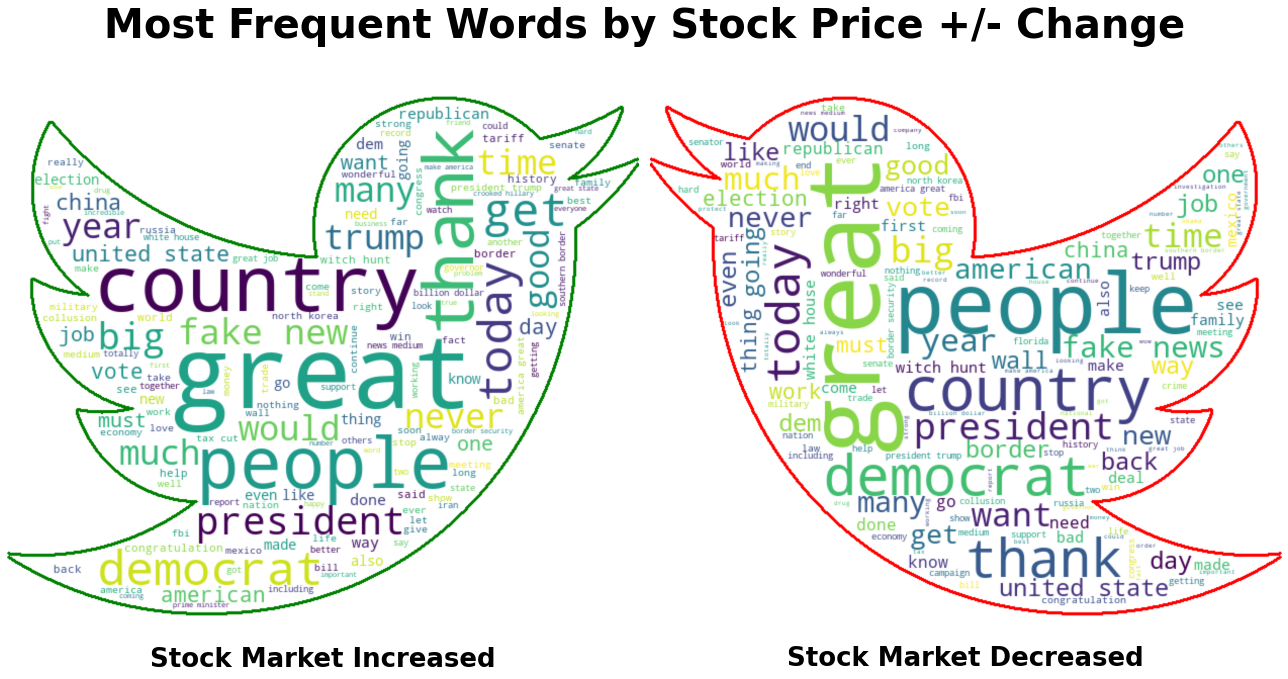

figured saved as figures/wordcloud_top_words_by_delta_price.png


In [138]:

ji.compare_word_clouds(text1=twitter_df_groups['pos']['joined'],
                       label1='Stock Market Increased',
                       text2= twitter_df_groups['neg']['joined'],
                       label2='Stock Market Decreased',
                       twitter_shaped = True, verbose=1,
                       suptitle_y_loc=0.75,
                       suptitle_text='Most Frequent Words by Stock Price +/- Change',
                       wordcloud_cfg_dict={'collocations':True},
                       save_file=True,filepath_folder='',
                       png_filename=file_dict['nlp_figures']['word_clouds_compare'],
                      **{'subplot_titles_fontdict':{'fontsize':26,'fontweight':'bold'},
                        'suptitle_fontdict':{'fontsize':40,'fontweight':'bold'},
                         'group_colors':{'group1':'green','group2':'red'},
                        });

In [139]:
## Comparing words ONLY unique to each group
df_pos_words, df_neg_words = ji.compare_freq_dists_unique_words(text1=twitter_df_groups['pos']['text_tokens'],
                                                                label1='Price Increased',
                                                                text2=twitter_df_groups['neg']['text_tokens'],
                                                                label2='Price Decreased',
                                                                top_n=20, display_dfs=True,
                                                                return_as_dicts=False)

pos_freq_dict, neg_freq_dict = ji.compare_freq_dists_unique_words(text1=twitter_df_groups['pos']['text_tokens'],
                                                                label1='Price Increased',
                                                                text2=twitter_df_groups['neg']['text_tokens'],
                                                                label2='Price Decreased',
                                                                top_n=20, display_dfs=False,
                                                                return_as_dicts=True)


Unique Text1 Words,Frequency
bank,19
mccain,13
con,12
era,12
wallace,9
closer,8
singapore,8
partner,8
nervous,8
friendship,8


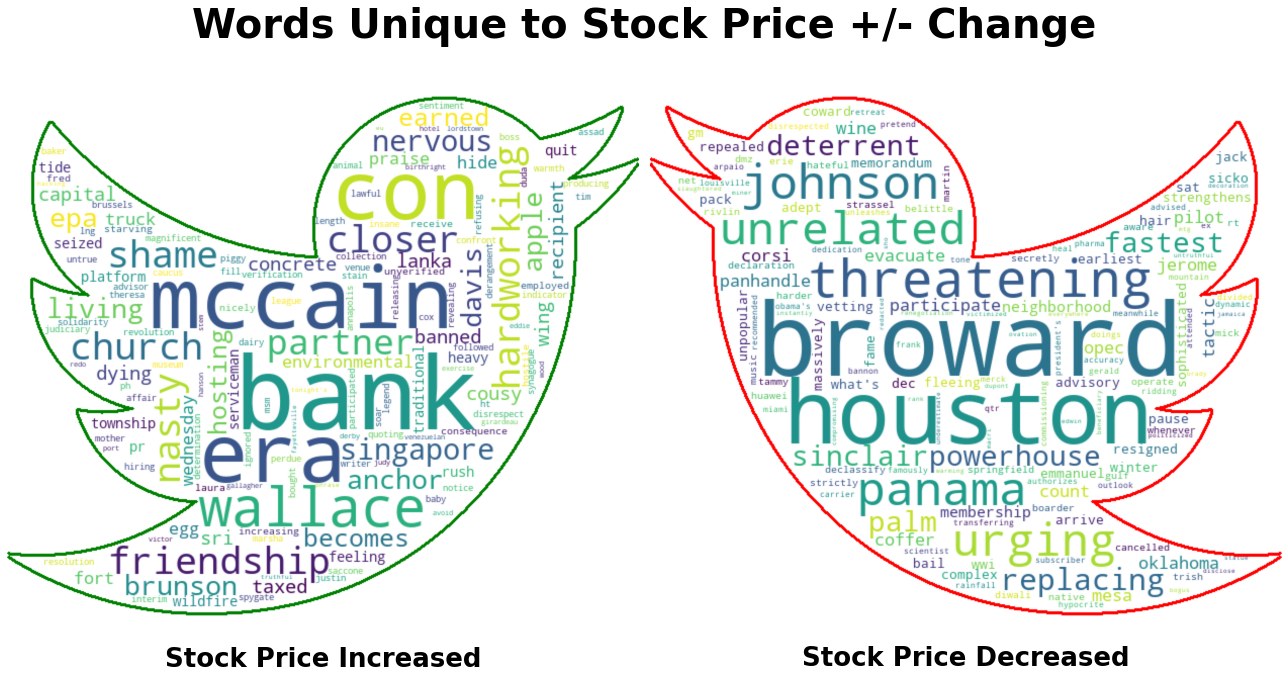

figured saved as figures/wordcloud_unique_words_by_delta_price.png


In [140]:
## WORDCLOUD OF WORDS UNIQUE TO TWEETS THAT INCREASED VS DECREASED STOCK PRICE
ji.reload(ji)

ji.compare_word_clouds(text1= pos_freq_dict,label1='Stock Price Increased',
                       text2=neg_freq_dict, label2='Stock Price Decreased',
                       twitter_shaped=True, from_freq_dicts=True,
                       suptitle_y_loc=0.75,wordcloud_cfg_dict={'collocations':True},
                       suptitle_text='Words Unique to Stock Price +/- Change',
                       save_file=True,filepath_folder='',
                       png_filename=file_dict['nlp_figures']['word_clouds_compare_unique'],
                       **{'subplot_titles_fontdict':
                         {'fontsize':26,
                         'fontweight':'bold'},
                        'suptitle_fontdict':{
                         'fontsize':40,
                         'fontweight':'bold'},
                         'group_colors':{
                             'group1':'green','group2':'red'}
                        });

In [141]:
reload(ji)
ji.make_tweet_bigrams_by_group(twitter_df_groups)

,Frequency
Bigram,
fake news,0.003101
united states,0.002589
witch hunt,0.001746
white house,0.001626
president trump,0.001385
north korea,0.001355
border security,0.001294
america great,0.001204
southern border,0.001054


# INITIAL MODELING

## TWEET DELTA PRICE CLASSIFICATON

### Creating Word Embeddings with Word2Vec

In [142]:
# # class Word2vecParams():
# #     """Class for tracking modelparams used for word2vec"""

# #     def __init__(self,params=None,verbose=1):
# #         '''Creates empty dataframe, last_params attribute, displays message'''
# #         self.last_params = {}
# #         self._df_ = pd.DataFrame(columns= ['text_column', 'window', 'min_count',
# #                                            'epochs','sg', 'hs', 'negative', 'ns_exponent'])
# #         if params is not None:
            
# #             self._df_.loc[self.get_now()] = params
# #             self.last_params=params
# #         else:
# #             self.last_params ={'text_column': '',
# #                                'window':'',
# #                                'min_count':'',
# #                                'epochs': '',
# #                                'sg':'',
# #                                'hs':'',
# #                                'negative':'',
# #                                'ns_exponent':''
# #                               }
# #         if verbose>0:
# #             print('[i] call .params_template() for dict to copy/pate.')
# # #             print('[i] call .show_info() to display param meanings.')

# #     def get_df(self):
# #         """returns dataframe of all attempts"""
# #         return self._df_
    
# #     def get_now(self):
# #         """calls external function to get current timestamp"""
# #         import functions_io as io
# #         return io.get_now()        
            
# #     def print_params(self):
# #         """prints self.last_params"""
# #         print(self.last_params)
        
# #     def params_template(self):
# #         """Prints a template dictionary of possible values. Copy-paste ready."""
# #         print('#TEMPLATE(call.show_info() for details:')
# #         print(self._template_)

    
# #     def append(self, params_dict):
# #         """Appends internal dataframe using the current time as the index"""
# #         ts = self.get_now()
# #         self._df_.loc[ts] = pd.Series(params_dict)
# #         self.last_params = params_dict
# #         print('- params saved.')
    
# #     def show_info(self):
# #         from IPython.display import display
# #         import pandas as pd
# #         info_df = self.info
# # #         info_df = info_df.style
# #         capt_text = 'Word2Vec Model Params'
# #         with pd.option_context('display.max_colwidth',0, 'display.colheader_justify','left'):
# #             table_style =[{'selector':'caption',
# #             'props':[('font-size','1.1em'),('color','darkblue'),('font-weight','bold'),
# #             ('vertical-align','0%')]}]
# #             dfs = info_df.style.set_caption(capt_text).set_properties(**{'width':'400px',
# #             'text-align':'left',
# # #             'padding':'1em',
# #             'font-size':'1.2em'}).set_table_styles(table_style)
# #             display(dfs)
                
# #     _template_="""
# #         w2vparams = {
# #         'text_column': 'cleaned_stopped_lemmas',
# #         'window':3-5,
# #         'min_count':1-3,
# #         'epochs':10-20,
# #         'sg':0 or 1, 
# #         'hs':'0 or 1,
# #         'negative': 0 or 5-20 ,
# #         'ns_exponent':-1.0 to 1.0
# #         }"""
        
# #     info = pd.DataFrame.from_dict({
# #         'text_column':'column to sample',
# #         'window':'# of words per window',
# #         'min_count':'# of times word must appear',
# #         'epochs':'# of training epochs',
# #         'sg':"embedding method. 1=skip-gram, 0=cbow (default)",
# #         'hs':"1=hierarchical softmax (default). 0 = use negative sampling (if 'negative' is non-zero)",
# #         'negative':"5-20, default=0. (# number of 'noisy' words to remove by negative sampling)",
# #         'ns_exponent':"weight for sampling low/high freq words. 0.0=sample all equally, 1.0=sample by word frequency, (-) values = sample infrequent words more"},
# #         orient='index',columns=['info'])
    
           
# def get_kwargs(params):
#     ## get kwargs for make_word2vecmodel
#     kwarg_keys =['sg','hs','negative','ns_exponent']
#     kwargs = {k:params[k] for k in kwarg_keys}
#     return kwargs

# w2vParams = bs.Word2vecParams()        
# w2vParams.params_template()

In [143]:
twitter_df

,source,content,date,retweet_count,favorite_count,is_retweet,id_str,has_RT,starts_RT,content_starts_RT,content_cleaned,content_min_clean,case_ratio,content_hashtags,hashtag_strings,content_mentions,mention_strings,cleaned_stopped_content,cleaned_stopped_tokens,cleaned_stopped_lemmas,sentiment_scores,compound_score,sentiment_class,neg,neu,pos,day,time,dayofweek,B_day,B_shifted,B_time,B_dt_index,time_shift,B_dt_minutes,stock_price_results,null_results,B_ts_rounded,pre_tweet_price,mins_after_tweet,B_ts_post_tweet,post_tweet_price,delta_time,delta_price,delta_price_class,delta_price_class_int,indexer
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-12-01 14:37:57,Twitter for iPhone,My thoughts and prayers are with those affected by the tragic storms and tornadoes in the Southeastern United States. Stay safe!,2016-12-01 14:37:57,12077,65724,False,804333718999539712,False,False,[],My thoughts and prayers are with those affected by the tragic storms and tornadoes in the Southeastern United States. Stay safe!,my thoughts and prayers are with those affected by the tragic storms and tornadoes in the southeastern united states stay safe,0.03906,[],,[],,thoughts prayers affected tragic storms tornadoes southeastern united states stay safe,"[thoughts, prayers, affected, tragic, storms, tornadoes, southeastern, united, states, stay, safe]",thought prayer affected tragic storm tornado southeastern united state stay safe,"{'neg': 0.168, 'neu': 0.623, 'pos': 0.209, 'compound': 0.2732}",0.2732,pos,0.168,0.623,0.209,2016-12-01,14:37:57,Thursday,2016-12-01,False,14:37:57,2016-12-01 14:37:57,0 days 00:00:00,2016-12-01 14:38:00,"{'B_ts_rounded': 2016-12-01 14:38:00, 'pre_tweet_price': 93.97, 'mins_after_tweet': 60, 'B_ts_post_tweet': 2016-12-01 15:38:00, 'post_tweet_price': 93.82, 'delta_time': 0 days 01:00:00, 'delta_pri...",False,2016-12-01 14:38:00,93.97,60.0,2016-12-01 15:38:00,93.82,0 days 01:00:00,-0.15,neg,0,0
2016-12-01 22:52:10,Twitter for iPhone,Heading to U.S. Bank Arena in Cincinnati Ohio for a 7pm rally. Join me! Tickets: https://t.co/HiWqZvHv6M,2016-12-01 22:52:10,5564,31256,False,804458095569158144,False,False,[],Heading to U.S. Bank Arena in Cincinnati Ohio for a 7pm rally. Join me! Tickets:,heading to u s bank arena in cincinnati ohio for a 7pm rally join me tickets,0.11111,[],,[],,heading bank arena cincinnati ohio pm rally join tickets,"[heading, bank, arena, cincinnati, ohio, pm, rally, join, tickets]",heading bank arena cincinnati ohio pm rally join ticket,"{'neg': 0.0, 'neu': 0.845, 'pos': 0.155, 'compound': 0.296}",0.2960,pos,0.000,0.845,0.155,2016-12-01,22:52:10,Thursday,2016-12-01,False,22:52:10,2016-12-01 22:52:10,0 days 00:00:00,2016-12-01 22:52:00,"{'B_ts_rounded': 2016-12-02 09:30:00, 'pre_tweet_price': 93.97, 'mins_after_tweet': 60, 'B_ts_post_tweet': 2016-12-02 10:30:00, 'post_tweet_price': 94.03, 'delta_time': 0 days 01:00:00, 'delta_pri...",False,2016-12-02 09:30:00,93.97,60.0,2016-12-02 10:30:00,94.03,0 days 01:00:00,0.06,pos,2,2
2016-12-02 02:45:18,Twitter for iPhone,Thank you Ohio! Together we made history – and now the real work begins. America will start winning again!… https://t.co/sVNSNJE7Uf,2016-12-02 02:45:18,17283,72196,False,804516764562374656,False,False,[],Thank you Ohio! Together we made history – and now the real work begins. America will start winning again!…,thank you ohio together we made history – and now the real work begins america will start winning again …,0.03704,[],,[],,thank ohio together made history real work begins america start winning,"[thank, ohio, together, made, history, real, work, begins, america, start, winning]",thank ohio together made history real work begin america start winning,"{'neg': 0.0, 'neu': 0.731, 'pos': 0.269, 'compound': 0.7096}",0.7096,pos,0.000,0.731,0.269,2016-12-02,02:45:18,Friday,2016-12-02,False,02:45:18,2016-12-02 02:45:18,0 days 00:00:00,2016-12-02 02:45:00,"{'B_ts_rounded': 2016-12-02 09:30:00, 'pre_tweet_price': 93.97, 'mins_after_tweet': 60, 'B_t

In [144]:
# ## FITING WORD2VEC AND TOKENIZER    
# params = {
# 'text_column': 'content_min_clean',
# 'window':3,
# 'min_count':2,
# 'epochs':10,
# 'sg':0, 
# 'hs':1,
# 'negative':0,
# 'ns_exponent':0.0
# }
# # model_kwds=  get_kwargs(params)    

# # text_data = twitter_df[params['text_column']]a
# ## using df_tokenize for full body of a text for word2vec
# word2vec_model = ji.make_word2vec_model(twitter_df,
#                                         text_column = params['text_column'],
#                                         window = params['window'],
#                                         min_count= params['min_count'],
#                                         epochs = params['epochs'],
#                                         verbose=1,
#                                         return_full=True,
#                                         **model_kwds)

In [145]:
from gensim.utils import simple_preprocess
from gensim.models import Word2Vec


In [146]:
twitter_df['simple_clean'] = twitter_df['content'].map( lambda x: simple_preprocess(x, deacc=True))


In [147]:
twitter_df

,source,content,date,retweet_count,favorite_count,is_retweet,id_str,has_RT,starts_RT,content_starts_RT,content_cleaned,content_min_clean,case_ratio,content_hashtags,hashtag_strings,content_mentions,mention_strings,cleaned_stopped_content,cleaned_stopped_tokens,cleaned_stopped_lemmas,sentiment_scores,compound_score,sentiment_class,neg,neu,pos,day,time,dayofweek,B_day,B_shifted,B_time,B_dt_index,time_shift,B_dt_minutes,stock_price_results,null_results,B_ts_rounded,pre_tweet_price,mins_after_tweet,B_ts_post_tweet,post_tweet_price,delta_time,delta_price,delta_price_class,delta_price_class_int,indexer,simple_clean
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-12-01 14:37:57,Twitter for iPhone,My thoughts and prayers are with those affected by the tragic storms and tornadoes in the Southeastern United States. Stay safe!,2016-12-01 14:37:57,12077,65724,False,804333718999539712,False,False,[],My thoughts and prayers are with those affected by the tragic storms and tornadoes in the Southeastern United States. Stay safe!,my thoughts and prayers are with those affected by the tragic storms and tornadoes in the southeastern united states stay safe,0.03906,[],,[],,thoughts prayers affected tragic storms tornadoes southeastern united states stay safe,"[thoughts, prayers, affected, tragic, storms, tornadoes, southeastern, united, states, stay, safe]",thought prayer affected tragic storm tornado southeastern united state stay safe,"{'neg': 0.168, 'neu': 0.623, 'pos': 0.209, 'compound': 0.2732}",0.2732,pos,0.168,0.623,0.209,2016-12-01,14:37:57,Thursday,2016-12-01,False,14:37:57,2016-12-01 14:37:57,0 days 00:00:00,2016-12-01 14:38:00,"{'B_ts_rounded': 2016-12-01 14:38:00, 'pre_tweet_price': 93.97, 'mins_after_tweet': 60, 'B_ts_post_tweet': 2016-12-01 15:38:00, 'post_tweet_price': 93.82, 'delta_time': 0 days 01:00:00, 'delta_pri...",False,2016-12-01 14:38:00,93.97,60.0,2016-12-01 15:38:00,93.82,0 days 01:00:00,-0.15,neg,0,0,"[my, thoughts, and, prayers, are, with, those, affected, by, the, tragic, storms, and, tornadoes, in, the, southeastern, united, states, stay, safe]"
2016-12-01 22:52:10,Twitter for iPhone,Heading to U.S. Bank Arena in Cincinnati Ohio for a 7pm rally. Join me! Tickets: https://t.co/HiWqZvHv6M,2016-12-01 22:52:10,5564,31256,False,804458095569158144,False,False,[],Heading to U.S. Bank Arena in Cincinnati Ohio for a 7pm rally. Join me! Tickets:,heading to u s bank arena in cincinnati ohio for a 7pm rally join me tickets,0.11111,[],,[],,heading bank arena cincinnati ohio pm rally join tickets,"[heading, bank, arena, cincinnati, ohio, pm, rally, join, tickets]",heading bank arena cincinnati ohio pm rally join ticket,"{'neg': 0.0, 'neu': 0.845, 'pos': 0.155, 'compound': 0.296}",0.2960,pos,0.000,0.845,0.155,2016-12-01,22:52:10,Thursday,2016-12-01,False,22:52:10,2016-12-01 22:52:10,0 days 00:00:00,2016-12-01 22:52:00,"{'B_ts_rounded': 2016-12-02 09:30:00, 'pre_tweet_price': 93.97, 'mins_after_tweet': 60, 'B_ts_post_tweet': 2016-12-02 10:30:00, 'post_tweet_price': 94.03, 'delta_time': 0 days 01:00:00, 'delta_pri...",False,2016-12-02 09:30:00,93.97,60.0,2016-12-02 10:30:00,94.03,0 days 01:00:00,0.06,pos,2,2,"[heading, to, bank, arena, in, cincinnati, ohio, for, pm, rally, join, me, tickets, https, co, hiwqzvhv]"
2016-12-02 02:45:18,Twitter for iPhone,Thank you Ohio! Together we made history – and now the real work begins. America will start winning again!… https://t.co/sVNSNJE7Uf,2016-12-02 02:45:18,17283,72196,False,804516764562374656,False,False,[],Thank you Ohio! Together we made history – and now the real work begins. America will start winning again!…,thank you ohio together we made history – and now the real work begins america will start winning again …,0.03704,[],,[],,thank ohio together made history real work begins america start winning,"[thank, ohio, together, made, history, real, work, begins, america, start, winning]",thank ohio together made history real work begin america start winning,"{'neg': 0.0, 'neu': 0

In [148]:
## set the embedding size (normally I'd do 100, but doing 50 for time)
EMBEDDING_SIZE = 300
# EMBEDDING_SIZE = 100
## intiitalize the w2v odel
w2v_model = Word2Vec(twitter_df['simple_clean'], size=EMBEDDING_SIZE, window=5,
                     min_count=3, workers=4, seed=321)

w2v_model.corpus_count

6758

In [149]:
## Train w2v model
w2v_model.train(twitter_df['simple_clean'],total_words=w2v_model.corpus_total_words,
                epochs=w2v_model.epochs)

(679215, 933620)

In [150]:
wv = w2v_model.wv
len(wv.index2word)

4731

In [151]:
# w2vParams.append(params)

# wv = word2vec_model.wv

### USING WORD VECTOR MATH TO GET A FEEL FOR QUALITY OF MODEL
# wv = word2vec_model.wv
def V(string,wv=wv):
    return wv.get_vector(string)
def equals(vector,wv=wv):
    return wv.similar_by_vector(vector)

list_of_equations = ["V('republican')-V('honor')",
                    "V('man')+V('power')",
                     "V('russia')+V('honor')",
                     "V('china')+V('tariff')",
                     "V('trump')+V('lie')"]
for eqn in list_of_equations:
    print(f'\n* {eqn} =')
    cmd = f"print(equals({eqn}))"
    eval(cmd)


* V('republican')-V('honor') =
[('democrats', 0.5069479942321777), ('they', 0.4700484275817871), ('dems', 0.4616570472717285), ('republicans', 0.43912070989608765), ('immigration', 0.43131378293037415), ('illegal', 0.4080437123775482), ('or', 0.3712467551231384), ('laws', 0.368855357170105), ('obsessed', 0.3670504689216614), ('border', 0.36472105979919434)]

* V('man')+V('power') =
[('man', 0.9687027931213379), ('racist', 0.962830662727356), ('person', 0.9567971229553223), ('power', 0.9507911801338196), ('upset', 0.9498862028121948), ('having', 0.9473183155059814), ('fine', 0.9464491605758667), ('effort', 0.9463497996330261), ('supposed', 0.943617582321167), ('quit', 0.9409922957420349)]

* V('russia')+V('honor') =
[('grant', 0.898324191570282), ('informant', 0.8691918849945068), ('intention', 0.8654149174690247), ('putin', 0.8650796413421631), ('occur', 0.8585528135299683), ('dec', 0.853938102722168), ('special', 0.8538873195648193), ('ruled', 0.8484023809432983), ('violation', 0.846

In [152]:
ji.dict_dropdown(file_dict)

------------ Dictionary Contents ------------


interactive(children=(Dropdown(description='dict_to_display', options={'file_directory': {'history': '', 'file…

In [153]:
# import functions_io as io
# reload(io)
# io.save_word2vec(word2vec_model,file_dict,parms_dict=w2vParams.last_params)

### Class Balancing

In [154]:
# twitter_df['simple_clean']

In [155]:
## Select smaller subset of twitter_df for df_tokenize
columns_for_model_0 = ['delta_price_class','delta_price','pre_tweet_price',
                       'post_tweet_price','delta_time','B_ts_rounded','B_ts_post_tweet','content',
                       'content_min_clean','cleaned_stopped_content','cleaned_stopped_tokens',
                       'cleaned_stopped_lemmas','delta_price_class_int',
                       'simple_clean'
                      ]

df_tokenize=twitter_df[columns_for_model_0].copy()
ji.check_class_balance(df_tokenize,'delta_price_class_int',as_raw=True, as_percent=False)
ji.check_class_balance(df_tokenize,'delta_price_class',as_raw=False)

------------------------------------------------------------
CLASS VALUE COUNTS FOR COL "delta_price_class_int":
------------------------------------------------------------
- Class Counts:
2    3371
0    2250
1    1137
Name: delta_price_class_int, dtype: int64
---

------------------------------------------------------------
CLASS VALUE COUNTS FOR COL "delta_price_class":
------------------------------------------------------------
- Classes (%):
pos          49.88
neg          33.29
no_change    16.82
Name: delta_price_class, dtype: float64
---



In [156]:
ihelp_menu([ji.undersample_df_to_match_classes])

GridBox(box_style='warning', children=(HBox(children=(Label(value='Function Menu'), Dropdown(options=('undersa…

Output()

### Target Params

In [157]:
## RESTRICTING TIME DELTAS FOR MODEL
REMOVE_DELTA_TIME_TWEETS=True

## RESAMPLING 
undersample_to_match_classes = True# True
class_column='delta_price_class'
class_list_to_keep = None # None=all classes or ['neg','pos']

## Display results
show_tweet_versions = True

###############
print('[0] INITIAL CLASS COUNTS.')
## Print initial class balance
ji.check_class_balance(df_tokenize,col=class_column);

## REMOVE TWEETS BASED ON TIME BETWEEN TWEET AND STOCK PRICE VALUE
if REMOVE_DELTA_TIME_TWEETS:
    ## SAMPLE ONLY TWEETS WITHIN 1 DAY OF STOCK MARKET PRICE DATA
    df_sampled = df_tokenize.loc[df_tokenize['delta_time']<'1 day']
    print(f"[1] # OF DAYS REMOVED BY 'delta_time' = {df_tokenize.shape[0]-df_sampled.shape[0]}")
    ji.check_class_balance(df_sampled, col=class_column, as_raw=True, as_percent=False)
else:
    print('[1] Skipping removing tweets by time_delta')
    df_sampled = df_tokenize
    
    
## UNDERSAMPLE FROM UNBALANCED CLASSES
if undersample_to_match_classes:
    
    ## Print status
    if class_list_to_keep is None:
        print_class_list= list(df_sampled[class_column].unique())
    else:
        print_class_list = class_list_to_keep
    print(f'[2] RESAMPLING DF TO MATCH SMALLEST CLASS.\n\tBalancing: {print_class_list}')
    
    ## RESAMPLE TO MATCH CLASSES
    df_sampled = ji.undersample_df_to_match_classes(df_sampled,
                                                    class_column=class_column,
                                                    class_values_to_keep=class_list_to_keep,verbose=0)
    ji.check_class_balance(df_sampled,col=class_column, as_percent=False)
    
    
else:
    print('\n[2] Skipping balancing classes and keeping all 3 classes.')

## Display final output
dash = '---'*20
print(f"\n\n [i] Final class balance:")
ji.check_class_balance(df_sampled,col=class_column)

display(df_sampled.head(2))

show_tweet_versions=True
if show_tweet_versions:
    ji.display_same_tweet_diff_cols(df_sampled,
                                    columns = ['content' ,'content_min_clean',
                                               'cleaned_stopped_content',
                                               'cleaned_stopped_tokens',
                                              'cleaned_stopped_lemmas'],as_md=True) 
    

[0] INITIAL CLASS COUNTS.
------------------------------------------------------------
CLASS VALUE COUNTS FOR COL "delta_price_class":
------------------------------------------------------------
- Classes (%):
pos          49.88
neg          33.29
no_change    16.82
Name: delta_price_class, dtype: float64
- Class Counts:
pos          3371
neg          2250
no_change    1137
Name: delta_price_class, dtype: int64
---

[1] # OF DAYS REMOVED BY 'delta_time' = 17
------------------------------------------------------------
CLASS VALUE COUNTS FOR COL "delta_price_class":
------------------------------------------------------------
- Class Counts:
pos          3365
neg          2245
no_change    1131
Name: delta_price_class, dtype: int64
---

[2] RESAMPLING DF TO MATCH SMALLEST CLASS.
	Balancing: ['neg', 'pos', 'no_change']
------------------------------------------------------------
CLASS VALUE COUNTS FOR COL "delta_price_class":
------------------------------------------------------------


,delta_price_class,delta_price,pre_tweet_price,post_tweet_price,delta_time,B_ts_rounded,B_ts_post_tweet,content,content_min_clean,cleaned_stopped_content,cleaned_stopped_tokens,cleaned_stopped_lemmas,delta_price_class_int,simple_clean
date,,,,,,,,,,,,,,
2019-08-23 14:59:04,neg,-0.49,112.77,112.28,0 days 01:00:00,2019-08-23 14:59:00,2019-08-23 15:59:00,....your companies HOME and making your products in the USA. I will be responding to China’s Tariffs this afternoon. This is a GREAT opportunity for the United States. Also I am ordering all carri...,your companies home and making your products in the usa i will be responding to china’s tariffs this afternoon this is a great opportunity for the united states also i am ordering all carri...,companies home making products usa responding china tariffs afternoon great opportunity united states also ordering carriers including fed ex amazon ups post office search refuse,"[companies, home, making, products, usa, responding, china, tariffs, afternoon, great, opportunity, united, states, also, ordering, carriers, including, fed, ex, amazon, ups, post, office, search,...",company home making product usa responding china tariff afternoon great opportunity united state also ordering carrier including fed ex amazon ups post office search refuse,0,"[your, companies, home, and, making, your, products, in, the, usa, will, be, responding, to, china, tariffs, this, afternoon, this, is, great, opportunity, for, the, united, states, also, am, orde..."
2019-08-23 14:59:04,neg,-0.49,112.77,112.28,0 days 01:00:00,2019-08-23 14:59:00,2019-08-23 15:59:00,....better off without them. The vast amounts of money made and stolen by China from the United States year after year for decades will and must STOP. Our great American companies are hereby order...,better off without them the vast amounts of money made and stolen by china from the united states year after year for decades will and must stop our great american companies are hereby order...,better without vast amounts money made stolen china united states year year decades must stop great american companies hereby ordered immediately start looking alternative china including bringing,"[better, without, vast, amounts, money, made, stolen, china, united, states, year, year, decades, must, stop, great, american, companies, hereby, ordered, immediately, start, looking, alternative,...",better without vast amount money made stolen china united state year year decade must stop great american company hereby ordered immediately start looking alternative china including bringing,0,"[better, off, without, them, the, vast, amounts, of, money, made, and, stolen, by, china, from, the, united, states, year, after, year, for, decades, will, and, must, stop, our, great, american, c..."


#### TWEET FROM 01-26-2019 14:01:48:

* **["content"] column:**<p><blockquote>***"date
2019-01-26 14:01:48    21 days goes very quickly. Negotiations with Democrats will start immediately. Will not be easy to make a deal both parties very dug in. The case for National Security has been greatly enhanced by...
Name: content, dtype: object"***

* **["content_min_clean"] column:**<p><blockquote>***"date
2019-01-26 14:01:48    21 days goes very quickly  negotiations with democrats will start immediately  will not be easy to make a deal both parties very dug in  the case for national security has been greatly enhanced by...
Name: content_min_clean, dtype: object"***

* **["cleaned_stopped_content"] column:**<p><blockquote>***"date
2019-01-26 14:01:48    days goes quickly negotiations democrats start immediately easy make deal parties dug case national security greatly enhanced happening border dialogue build wall
Name: cleaned_stopped_content, dtype: object"***

* **["cleaned_stopped_tokens"] column:**<p><blockquote>***"date
2019-01-26 14:01:48    [days, goes, quickly, negotiations, democrats, start, immediately, easy, make, deal, parties, dug, case, national, security, greatly, enhanced, happening, border, dialogue, build, wall]
Name: cleaned_stopped_tokens, dtype: object"***

* **["cleaned_stopped_lemmas"] column:**<p><blockquote>***"date
2019-01-26 14:01:48    day go quickly negotiation democrat start immediately easy make deal party dug case national security greatly enhanced happening border dialogue build wall
Name: cleaned_stopped_lemmas, dtype: object"***

In [158]:
df_sampled

,delta_price_class,delta_price,pre_tweet_price,post_tweet_price,delta_time,B_ts_rounded,B_ts_post_tweet,content,content_min_clean,cleaned_stopped_content,cleaned_stopped_tokens,cleaned_stopped_lemmas,delta_price_class_int,simple_clean
date,,,,,,,,,,,,,,
2019-08-23 14:59:04,neg,-0.49,112.77,112.28,0 days 01:00:00,2019-08-23 14:59:00,2019-08-23 15:59:00,....your companies HOME and making your products in the USA. I will be responding to China’s Tariffs this afternoon. This is a GREAT opportunity for the United States. Also I am ordering all carri...,your companies home and making your products in the usa i will be responding to china’s tariffs this afternoon this is a great opportunity for the united states also i am ordering all carri...,companies home making products usa responding china tariffs afternoon great opportunity united states also ordering carriers including fed ex amazon ups post office search refuse,"[companies, home, making, products, usa, responding, china, tariffs, afternoon, great, opportunity, united, states, also, ordering, carriers, including, fed, ex, amazon, ups, post, office, search,...",company home making product usa responding china tariff afternoon great opportunity united state also ordering carrier including fed ex amazon ups post office search refuse,0,"[your, companies, home, and, making, your, products, in, the, usa, will, be, responding, to, china, tariffs, this, afternoon, this, is, great, opportunity, for, the, united, states, also, am, orde..."
2019-08-23 14:59:04,neg,-0.49,112.77,112.28,0 days 01:00:00,2019-08-23 14:59:00,2019-08-23 15:59:00,....better off without them. The vast amounts of money made and stolen by China from the United States year after year for decades will and must STOP. Our great American companies are hereby order...,better off without them the vast amounts of money made and stolen by china from the united states year after year for decades will and must stop our great american companies are hereby order...,better without vast amounts money made stolen china united states year year decades must stop great american companies hereby ordered immediately start looking alternative china including bringing,"[better, without, vast, amounts, money, made, stolen, china, united, states, year, year, decades, must, stop, great, american, companies, hereby, ordered, immediately, start, looking, alternative,...",better without vast amount money made stolen china united state year year decade must stop great american company hereby ordered immediately start looking alternative china including bringing,0,"[better, off, without, them, the, vast, amounts, of, money, made, and, stolen, by, china, from, the, united, states, year, after, year, for, decades, will, and, must, stop, our, great, american, c..."
2019-08-23 14:59:03,neg,-0.49,112.77,112.28,0 days 01:00:00,2019-08-23 14:59:00,2019-08-23 15:59:00,Our Country has lost stupidly Trillions of Dollars with China over many years. They have stolen our Intellectual Property at a rate of Hundreds of Billions of Dollars a year &amp; they want to con...,our country has lost stupidly trillions of dollars with china over many years they have stolen our intellectual property at a rate of hundreds of billions of dollars a year amp they want to con...,country lost stupidly trillions dollars china many years stolen intellectual property rate hundreds billions dollars year want continue let happen need china frankly would far,"[country, lost, stupidly, trillions, dollars, china, many, years, stolen, intellectual, property, rate, hundreds, billions, dollars, year, want, continue, let, happen, need, china, frankly, would,...",country lost stupidly trillion dollar china many year stolen intellectual property rate hundred billion dollar year want continue let happen need china frankly would far,0,"[our, country, has, lost, stupidly, trillions, of, dollars, with, china, over, many, years, they, have, stolen, our, intellectual, property, at, rate, of, hun

In [159]:
ji.check_class_balance(df_sampled)

------------------------------------------------------------
CLASS VALUE COUNTS FOR COL "delta_price_class_int":
------------------------------------------------------------
- Classes (%):
0    33.33
2    33.33
1    33.33
Name: delta_price_class_int, dtype: float64
- Class Counts:
0    1131
2    1131
1    1131
Name: delta_price_class_int, dtype: int64
---



In [160]:
# ihelp_menu([ji.make_word2vec_model,ji.get_wv_from_word2vec,
#             ji.train_test_val_split])

### Tokenization, X,y train-test-split

In [161]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn import metrics

### 

In [162]:
X = df_sampled['simple_clean']
y = to_categorical(df_sampled['delta_price_class_int'],num_classes=3)

In [163]:
## Get training/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

# ji.check_y_class_balance(data=[y_train,y_test])
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
# del X

(2884,) (2884, 3)
(509,) (509, 3)


In [164]:
tokenizer = Tokenizer(num_words=len(wv.vocab))
tokenizer.fit_on_texts(X_train)

## Use tokenizer to convert texts to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

## whatn does 1 sequence look like?
print(X_train_seq[0])

[1388, 2215, 253, 97, 1240, 296, 2216, 13, 40, 5, 85, 14]


In [165]:

## can lookup the words via the tokenizer's index_word 
print(' '.join([tokenizer.index_word[w] for w in X_train_seq[0]]))

stocks cap best first half since wsj our country is doing great


In [166]:
# what is the len of each sequence?
seq_lens = [len(x) for x in X_test_seq]
MAX_SEQUENCE_LENGTH= max(seq_lens)
MAX_SEQUENCE_LENGTH

54

In [167]:
X_train_pad = sequence.pad_sequences(X_train_seq,MAX_SEQUENCE_LENGTH)
X_test_pad = sequence.pad_sequences(X_test_seq,MAX_SEQUENCE_LENGTH)


## Save word indices
word_index = tokenizer.index_word
reverse_index = {v:k for k,v in word_index.items()}

In [168]:
## prepare y

# Changed for class imblanace  #
# y = to_categorical(df_sampled['delta_price_class_int'],num_classes=3)
# y=df_sampled['delta_price_class_int'].values

# wv = ji.get_wv_from_word2vec(word2vec_model)

# tokenizer = Tokenizer(num_words=len(wv.vocab))

# ## FIGURE OUT WHICH VERSION TO USE WITH SERIES:
# tokenizer.fit_on_texts(text_data)
# # return integer-encoded sentences
# X = tokenizer.texts_to_sequences(text_data)

# MAX_SEQUENCE_LENGTH=35
# max([len(x) for x in X])

In [169]:
len(word_index)

8483

In [170]:
X_train.shape

(2884,)

## Updated Modeling Functions

In [171]:
def plot_history(history,model,figsize=(8,4)):
    """Takes a keras history and model and plots 
    all metrics in separate plots for each metric"""
#     print(header,'\t[i] MODEL HISTORY',header,sep='\n')

    ## Make a dataframe out of history
    res_df = pd.DataFrame(history.history)#.plot()

    ## Plot Losses
    plot_kws = dict(marker='o',ls=':',lw=2,figsize=figsize)

    ## Plot all metrics
    metrics_list = model.metrics_names

    for metric in metrics_list:
        ax = res_df[[col for col in res_df.columns if metric in col]].plot(**plot_kws)
        ax.set(xlabel='Epoch',ylabel=metric,title=metric)
        ax.grid()
        ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
        plt.show()
        
        

def evaluate_scores(model,X_train,y_train,label='Training',verbose=0):
    """Evaluates a keras model and prints the scores using the provided label."""
    train_scores  = model.evaluate(X_train,y_train,verbose=verbose)#score()
    for i,metric in enumerate(model.metrics_names):
        print(f"\t{label} {metric}: {train_scores[i]:.3f}")
        
        
        
def classification_report_cm(model, X_train,y_train,label='TRAINING DATA',
                            cm_figsize=(6,6),normalize='true',cmap='Greens'):
    """Gets predictions from a Keras neural network and get 
    classification report and confusion matrix."""
    ## Print report header, get preds, get class report, and conf matrix
    header =  '==='*24
    print(header,f"\t[i] CLASSIFICATION REPORT - {label}",header,sep='\n')
    print()
    
    ## Get predictions
    y_hat_train = model.predict(X_train)
    
    ## convert to 1D targets
    y_train_class =y_train.argmax(axis=1)
    y_hat_train_class = y_hat_train.argmax(axis=1)
    
    
    ## Get classification report 
    print(metrics.classification_report(y_train_class,y_hat_train_class))
    print()
    
    
    ## Plot the confusion Matrix
    cm = metrics.confusion_matrix(y_train_class, y_hat_train_class,
                                  normalize=normalize)
    
    fig,ax = plt.subplots(figsize=cm_figsize)
    sns.heatmap(cm, cmap=cmap, annot=True,square=True,ax=ax)
    ax.set(ylabel='True Class',xlabel='Predicted Class',
           title='Confusion Matrix - Training Data')    
    plt.show()

    
    
def evaluate_network(model, X_test, y_test, history=None, 
                        X_train = None, y_train = None,
                        history_figsize = (8,4), cm_figsize=(8,8),
                        cmap='Greens', normalize='true'):
    """Gets predictions and evaluates a classification model using
    sklearn.

    Args:
        model (classifier): a fit keras classification model.
        X_test (tensor/array): X data
        y_test (tensor/array): y data
        history (History object): model history from .fit
        X_train (tensor/array): If provided, compare model.score 
                                for train and test. Defaults to None.
        y_train (Series or Array, optional): If provided, compare model.score 
                                for train and test. Defaults to None.
                                
        history_figsize (tuple): figsize for each metric's history plot.
        cm_figsize (tuple): figsize for confusion matrix plot
      
        cmap (str, optional): Colormap for confusion matrix. Defaults to 'Greens'.
        normalize (str, optional): normalize argument for plot_confusion_matrix. 
                                    Defaults to 'true'.  
    """
    
    header =  '==='*24
    
    ## First, Plot History, if provided.
    if history is not None:
        print(header,'\t[i] MODEL HISTORY',header,sep='\n')
        plot_history(history,model,figsize=history_figsize)
        
        
    ## Evaluate Network for loss/acc scores
    print(header,"\t[i] EVALUATING MODEL",header,sep='\n')
    print()
    if X_train is not None:
        try:
            evaluate_scores(model,X_train,y_train,label='Training')
            print()

        except Exception as e:
            print("Error evaluating for accuracy for training data:")
            print(e)
        

    ## Evaluate test data
    evaluate_scores(model,X_test,y_test,label='Test')
    print("\n")

    
    ## Report for training data
    if X_train is not None:
        classification_report_cm(model, X_train, y_train, cmap=cmap,
                                 normalize=normalize,
                                 label='TRAINING DATA',cm_figsize=cm_figsize)       
        print('\n'*2)
    ## Report for test data
    classification_report_cm(model,X_test,y_test, cmap=cmap,
                             normalize=normalize,
                             label='TEST DATA',cm_figsize=cm_figsize)

## Model 0

In [172]:
## Set the max words equal to tokenizer's word index
MAX_WORDS = len(tokenizer.word_index)
MAX_WORDS

8483

In [173]:
## Save num classes for final layer
n_classes = y_train.shape[1]
n_classes

3

In [174]:
## check class balance
y_tr_classes = pd.Series(y_train.argmax(axis=1))
y_tr_classes.value_counts(1)

0    0.336338
1    0.333564
2    0.330097
dtype: float64

### Calculating Class Weights

In [175]:
from sklearn.utils.class_weight import compute_class_weight

## Get the array of weights for each unique class
weights= compute_class_weight(
           'balanced',
            np.unique(y_tr_classes),
            y_tr_classes)
weights

array([0.99106529, 0.999307  , 1.00980392])

In [176]:
## Turn the weights into a dict with the class name as the key
weights_dict = dict(zip( np.unique(y_tr_classes),weights))
weights_dict

{0: 0.99106529209622, 1: 0.9993069993069993, 2: 1.0098039215686274}

### Simple LSTM - Fresh Embedding

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_32 (Embedding)     (None, None, 300)         2545200   
_________________________________________________________________
lstm_37 (LSTM)               (None, None, 50)          70200     
_________________________________________________________________
global_average_pooling1d_12  (None, 50)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 3)                 153       
Total params: 2,615,553
Trainable params: 2,615,553
Non-trainable params: 0
_________________________________________________________________


None

Epoch 1/20
19/19 [==============================] - 3s 107ms/step - loss: 1.1001 - accuracy: 0.3159 - recall: 0.0000e+00 - val_loss: 1.0965 - val_accuracy: 0.3293 - val_recall: 0.0000e+00
Epoch 2/20
19/19 [==============================] - 2s 84ms/step - loss: 1.0918 - accuracy: 0.3749 - recall: 0.0000e+00 - val_loss: 1.0890 - val_accuracy: 0.4142 - val_recall: 0.0000e+00
Epoch 3/20
19/19 [==============================] - 2s 83ms/step - loss: 1.0715 - accuracy: 0.4798 - recall: 5.8932e-04 - val_loss: 1.1144 - val_accuracy: 0.3553 - val_recall: 0.0797
Epoch 4/20
19/19 [==============================] - 2s 86ms/step - loss: 0.9720 - accuracy: 0.5351 - recall: 0.1606 - val_loss: 1.1270 - val_accuracy: 0.4437 - val_recall: 0.1404
Epoch 5/20
19/19 [==============================] - 2s 88ms/step - loss: 0.8308 - accuracy: 0.6707 - recall: 0.3419 - val_loss: 1.1915 - val_accuracy: 0.4194 - val_recall: 0.1872
Epoch 00005: early stopping
	[i] MODEL HISTORY


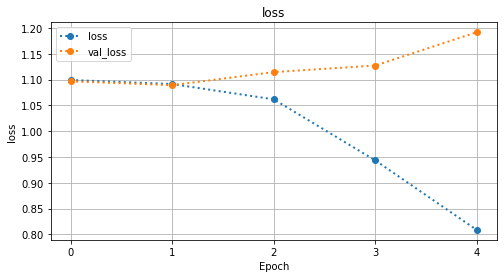

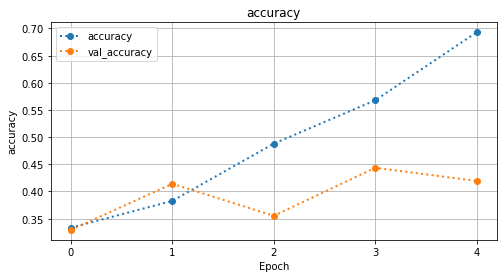

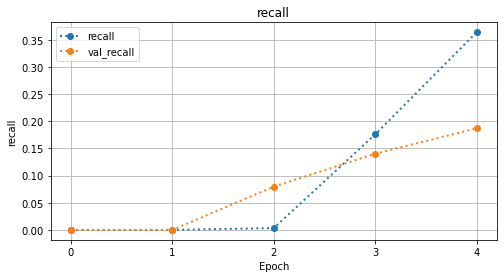

	[i] EVALUATING MODEL

	Training loss: 0.809
	Training accuracy: 0.696
	Training recall: 0.415

	Test loss: 1.350
	Test accuracy: 0.375
	Test recall: 0.163


	[i] CLASSIFICATION REPORT - TRAINING DATA

              precision    recall  f1-score   support

           0       0.78      0.63      0.70       970
           1       0.68      0.72      0.70       962
           2       0.65      0.73      0.69       952

    accuracy                           0.70      2884
   macro avg       0.70      0.70      0.70      2884
weighted avg       0.70      0.70      0.70      2884




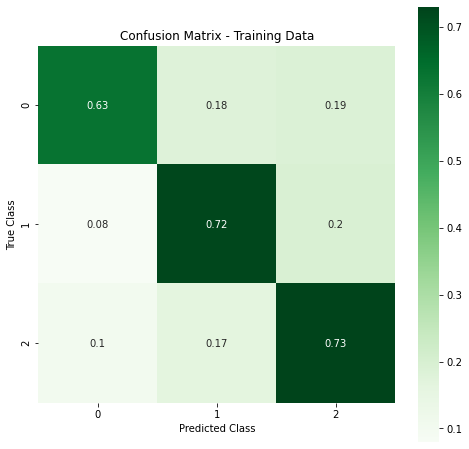




	[i] CLASSIFICATION REPORT - TEST DATA

              precision    recall  f1-score   support

           0       0.35      0.39      0.37       161
           1       0.37      0.39      0.38       169
           2       0.40      0.35      0.38       179

    accuracy                           0.38       509
   macro avg       0.38      0.38      0.38       509
weighted avg       0.38      0.38      0.38       509




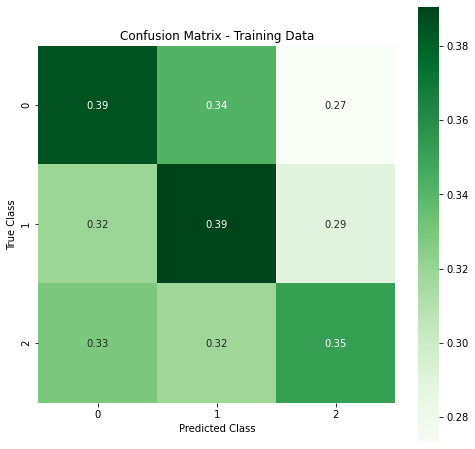

In [199]:
from tensorflow.keras import callbacks, models, layers, optimizers, regularizers
import tensorflow as tf
import matplotlib as mpl

early_stop = callbacks.EarlyStopping(monitor='val_loss',#mode='min',min_delta=.001
                                         patience=3,verbose=2,
                                     restore_best_weights=False)

    
def make_model():
    """Make a neural network with a new emebdding layer, 
    an LSTM layer with 25 unit, and a final Dense layer appropriate for the task"""
    model = models.Sequential()
    model.add(layers.Embedding(MAX_WORDS+1, EMBEDDING_SIZE))
    model.add(layers.LSTM(50, return_sequences=True))
    model.add(layers.GlobalAvgPool1D())
#     model.add(layers.GlobalAveragePooling1D())
    model.add(layers.Dense(n_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', 
                  optimizer=tf.keras.optimizers.Adam(),#'adam',
                 metrics=['accuracy', tf.keras.metrics.Recall(name='recall')])
    display(model.summary())
    return model


## make model and fit 
model= make_model()
history = model.fit(X_train_pad, y_train, batch_size=128, epochs=20,
                    validation_split=0.2, workers=-1,callbacks=[early_stop])
evaluate_network(model,X_test_pad,y_test,history,
                X_train = X_train_pad,y_train=y_train)

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_39 (Embedding)     (None, None, 300)         2545200   
_________________________________________________________________
bidirectional_12 (Bidirectio (None, None, 50)          65200     
_________________________________________________________________
global_average_pooling1d_19  (None, 50)                0         
_________________________________________________________________
dense_41 (Dense)             (None, 3)                 153       
Total params: 2,610,553
Trainable params: 2,610,553
Non-trainable params: 0
_________________________________________________________________


None

Epoch 1/20
16/16 [==============================] - 6s 146ms/step - loss: 1.0995 - accuracy: 0.3357 - recall: 0.0000e+00 - val_loss: 1.0949 - val_accuracy: 0.4065 - val_recall: 0.0000e+00
Epoch 2/20
16/16 [==============================] - 2s 114ms/step - loss: 1.0897 - accuracy: 0.4683 - recall: 0.0000e+00 - val_loss: 1.0908 - val_accuracy: 0.4007 - val_recall: 0.0000e+00
Epoch 3/20
16/16 [==============================] - 2s 113ms/step - loss: 1.0697 - accuracy: 0.5090 - recall: 0.0000e+00 - val_loss: 1.0779 - val_accuracy: 0.3984 - val_recall: 0.0150
Epoch 4/20
16/16 [==============================] - 2s 117ms/step - loss: 0.9592 - accuracy: 0.5498 - recall: 0.1666 - val_loss: 1.1387 - val_accuracy: 0.4226 - val_recall: 0.2575
Epoch 5/20
16/16 [==============================] - 2s 113ms/step - loss: 0.7031 - accuracy: 0.7510 - recall: 0.5950 - val_loss: 1.2647 - val_accuracy: 0.4180 - val_recall: 0.3891
Epoch 6/20
16/16 [==============================] - 2s 115ms/step - loss: 0.4715

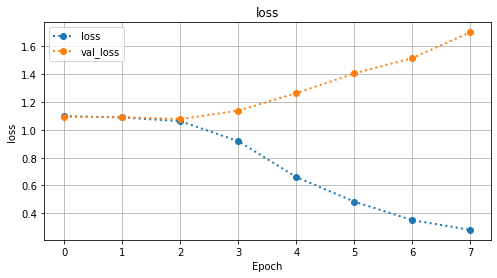

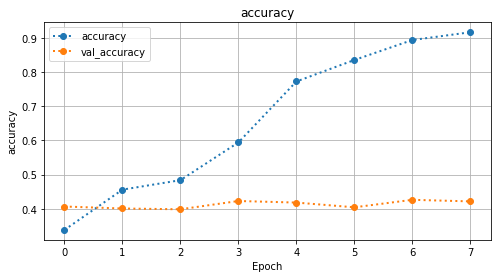

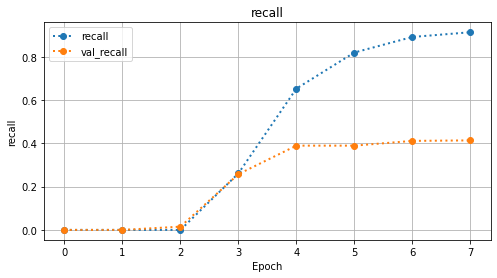

	[i] EVALUATING MODEL

	Training loss: 0.690
	Training accuracy: 0.780
	Training recall: 0.776

	Test loss: 1.775
	Test accuracy: 0.389
	Test recall: 0.367


	[i] CLASSIFICATION REPORT - TRAINING DATA

              precision    recall  f1-score   support

           0       0.73      0.85      0.79       970
           1       0.83      0.73      0.78       962
           2       0.79      0.76      0.78       952

    accuracy                           0.78      2884
   macro avg       0.79      0.78      0.78      2884
weighted avg       0.79      0.78      0.78      2884




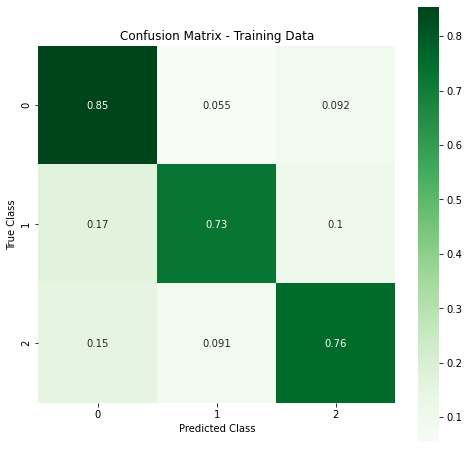




	[i] CLASSIFICATION REPORT - TEST DATA

              precision    recall  f1-score   support

           0       0.38      0.54      0.45       161
           1       0.38      0.25      0.30       169
           2       0.41      0.38      0.39       179

    accuracy                           0.39       509
   macro avg       0.39      0.39      0.38       509
weighted avg       0.39      0.39      0.38       509




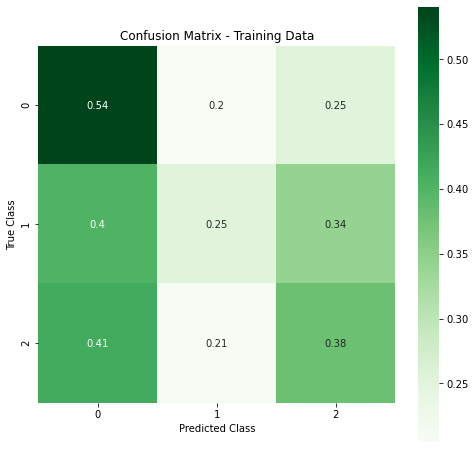

In [206]:

early_stop = callbacks.EarlyStopping(monitor='val_loss',#mode='min',min_delta=.001
                                         patience=5,verbose=2,
                                     restore_best_weights=False)

    
def make_bidirectional_model():
    """Make a neural network with a new emebdding layer, 
    an LSTM layer with 25 unit, and a final Dense layer appropriate for the task"""
    model = models.Sequential()
    model.add(layers.Embedding(MAX_WORDS+1, EMBEDDING_SIZE))
    model.add(layers.Bidirectional(layers.LSTM(25, return_sequences=True,
                                              recurrent_dropout=0.2)))
#     model.add(layers.GlobalAvgPool1D())
    model.add(layers.GlobalAveragePooling1D())
    
    model.add(layers.Dense(n_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam',
                 metrics=['accuracy', tf.keras.metrics.Recall(name='recall')])
    display(model.summary())
    return model


## make model and fit 
model= make_bidirectional_model()
history = model.fit(X_train_pad, y_train, batch_size=128, epochs=20,
                    validation_split=0.3, workers=-1,callbacks=[early_stop])
evaluate_network(model,X_test_pad,y_test,history,
                X_train = X_train_pad,y_train=y_train)

### Making Keras embedding from W2V

In [187]:
from tensorflow.keras import layers

## Saving the total number of words as vocab size
vocab_size = len(tokenizer.index_word)
# EMBEDDING_SIZE = wv.vector_size
## Doubel check current embedding size and vocab size
vocab_size,EMBEDDING_SIZE

(8483, 300)

In [188]:
### make a metrix of embedding weights
embedding_matrix = np.zeros((vocab_size+1, EMBEDDING_SIZE))

## for each item in the word index
for word, i in tokenizer.word_index.items():

    ## if word in w2vec model, fill in the embedding matrix
     if word in wv:
        embedding_vector = wv[word]
        embedding_matrix[i] = embedding_vector

        # embedding_matrix
### make the embedding layer for keras
embedding_layer = layers.Embedding(vocab_size+1,EMBEDDING_SIZE,
                                  weights=[embedding_matrix],
                                  input_length=MAX_SEQUENCE_LENGTH,
                                  trainable=False)

In [189]:
# #https://stackoverflow.com/questions/66207609/notimplementederror-cannot-convert-a-symbolic-tensor-lstm-2-strided-slice0-t/66207610
# !pip install -U numpy==1.18.5
# import numpy
# numpy.__version__

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_30 (Embedding)     (None, 54, 300)           2545200   
_________________________________________________________________
lstm_35 (LSTM)               (None, 50)                70200     
_________________________________________________________________
dense_32 (Dense)             (None, 3)                 153       
Total params: 2,615,553
Trainable params: 70,353
Non-trainable params: 2,545,200
_________________________________________________________________


None

Epoch 1/10
19/19 [==============================] - 3s 81ms/step - loss: 1.1123 - accuracy: 0.3349 - recall: 0.0022 - val_loss: 1.1188 - val_accuracy: 0.3258 - val_recall: 0.0035
Epoch 2/10
19/19 [==============================] - 1s 47ms/step - loss: 1.1061 - accuracy: 0.3318 - recall: 0.0161 - val_loss: 1.1131 - val_accuracy: 0.3189 - val_recall: 0.0000e+00
Epoch 3/10
19/19 [==============================] - 1s 46ms/step - loss: 1.0882 - accuracy: 0.3618 - recall: 4.2541e-04 - val_loss: 1.1066 - val_accuracy: 0.3432 - val_recall: 0.0000e+00
Epoch 4/10
19/19 [==============================] - 1s 49ms/step - loss: 1.0860 - accuracy: 0.3726 - recall: 5.6403e-04 - val_loss: 1.1042 - val_accuracy: 0.3258 - val_recall: 0.0000e+00
Epoch 5/10
19/19 [==============================] - 1s 49ms/step - loss: 1.0904 - accuracy: 0.3650 - recall: 0.0019 - val_loss: 1.1083 - val_accuracy: 0.3466 - val_recall: 0.0000e+00
Epoch 6/10
19/19 [==============================] - 1s 50ms/step - loss: 1.0857 -

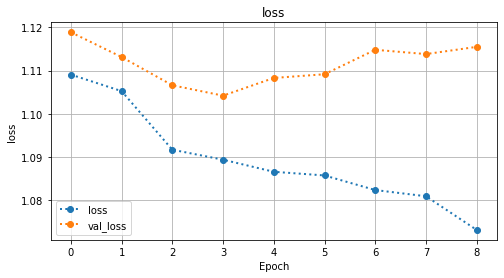

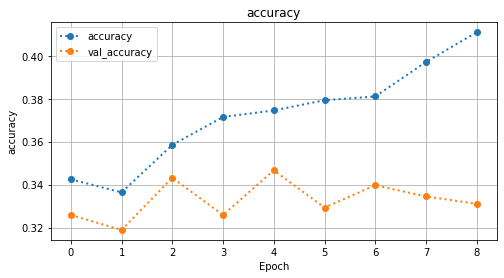

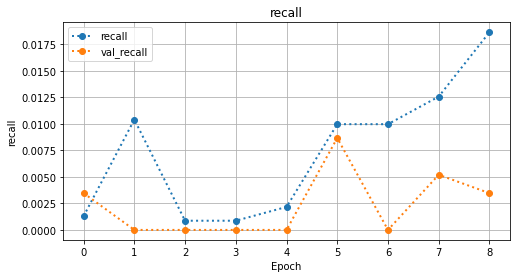

	[i] EVALUATING MODEL

	Training loss: 1.077
	Training accuracy: 0.399
	Training recall: 0.014

	Test loss: 1.118
	Test accuracy: 0.324
	Test recall: 0.002


	[i] CLASSIFICATION REPORT - TRAINING DATA

              precision    recall  f1-score   support

           0       0.40      0.41      0.41       970
           1       0.48      0.20      0.28       962
           2       0.38      0.58      0.46       952

    accuracy                           0.40      2884
   macro avg       0.42      0.40      0.38      2884
weighted avg       0.42      0.40      0.38      2884




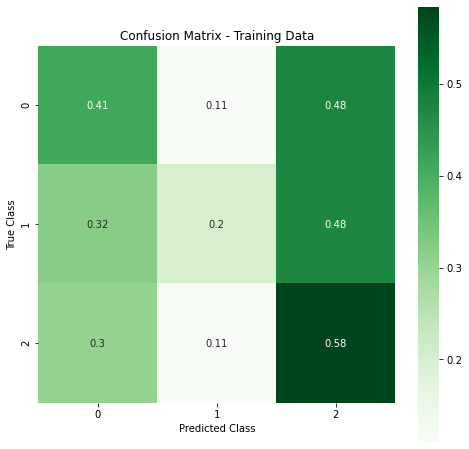




	[i] CLASSIFICATION REPORT - TEST DATA

              precision    recall  f1-score   support

           0       0.32      0.36      0.34       161
           1       0.31      0.15      0.20       169
           2       0.33      0.45      0.38       179

    accuracy                           0.32       509
   macro avg       0.32      0.32      0.31       509
weighted avg       0.32      0.32      0.31       509




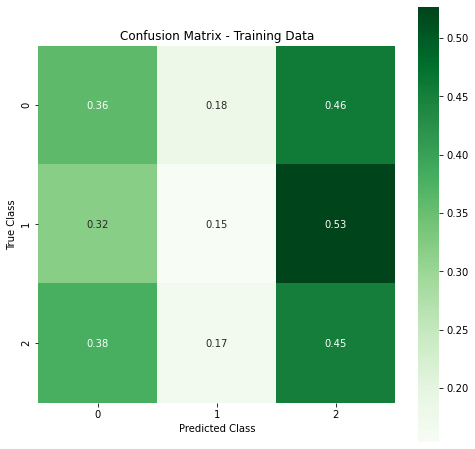

In [196]:

early_stop = callbacks.EarlyStopping(monitor='val_loss',#mode='min',min_delta=.001
                                         patience=5,verbose=2,
                                     restore_best_weights=False)
def make_w2v_model():
    """Make a neural network with a new emebdding layer, 
    an LSTM layer with 25 unit, and a final Dense layer appropriate for the task"""
    model = models.Sequential()
    
            # embedding_matrix
    ### make the embedding layer for keras
    embedding_layer = layers.Embedding(vocab_size+1,EMBEDDING_SIZE,
                                      weights=[embedding_matrix],
                                      input_length=MAX_SEQUENCE_LENGTH,
                                      trainable=False)
    model.add(embedding_layer)
#     model.add(layers.Embedding(MAX_WORDS+1, EMBEDDING_SIZE))
    model.add(layers.LSTM(50, return_sequences=False))
#     model.add(layers.GlobalAvgPool1D())
#     model.add(layers.GlobalAveragePooling1D())
    model.add(layers.Dense(n_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam',
                 metrics=['accuracy', tf.keras.metrics.Recall(name='recall')])
    display(model.summary())
    return model


## make model and fit 
model= make_w2v_model()
history = model.fit(X_train_pad, y_train, batch_size=128, epochs=10,
                    validation_split=0.2, workers=-1,callbacks=[early_stop])
evaluate_network(model,X_test_pad,y_test,history,
                X_train = X_train_pad,y_train=y_train)

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_24 (Embedding)     (None, 54, 300)           2545200   
_________________________________________________________________
bidirectional_6 (Bidirection (None, 200)               320800    
_________________________________________________________________
dense_27 (Dense)             (None, 3)                 603       
Total params: 2,866,603
Trainable params: 321,403
Non-trainable params: 2,545,200
_________________________________________________________________


None

--- CLOCK STARTED @:    06/18/21 - 07:13:33 PM --- 
------------------------------------------------------------
	FITTING MODEL:
------------------------------------------------------------
Epoch 1/10
73/73 [==============================] - 13s 121ms/step - loss: 5.3985 - accuracy: 0.3180 - recall_6: 0.0028 - val_loss: 1.6404 - val_accuracy: 0.3328 - val_recall_6: 0.0000e+00
Epoch 2/10
73/73 [==============================] - 8s 112ms/step - loss: 1.4298 - accuracy: 0.3513 - recall_6: 0.0025 - val_loss: 1.1822 - val_accuracy: 0.3189 - val_recall_6: 0.0000e+00
Epoch 3/10
73/73 [==============================] - 8s 114ms/step - loss: 1.1557 - accuracy: 0.3535 - recall_6: 9.1668e-04 - val_loss: 1.1301 - val_accuracy: 0.3120 - val_recall_6: 0.0000e+00
Epoch 4/10
73/73 [==============================] - 8s 108ms/step - loss: 1.1247 - accuracy: 0.3599 - recall_6: 0.0023 - val_loss: 1.1185 - val_accuracy: 0.3640 - val_recall_6: 0.0000e+00
Epoch 5/10
73/73 [==============================] - 9

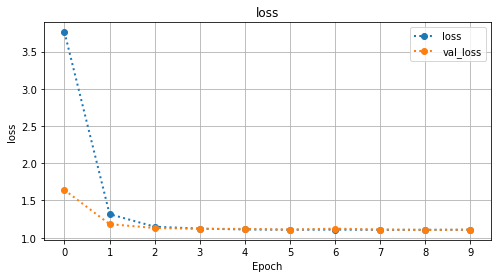

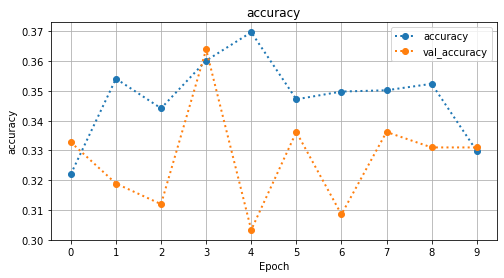

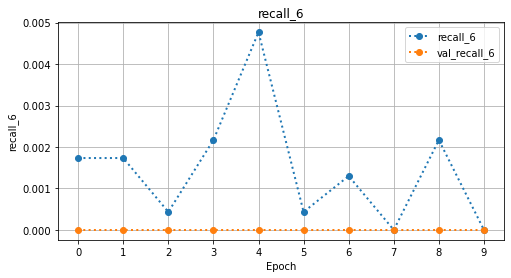

	[i] EVALUATING MODEL

	Training loss: 1.099
	Training accuracy: 0.369
	Training recall_6: 0.000

	Test loss: 1.108
	Test accuracy: 0.363
	Test recall_6: 0.000


	[i] CLASSIFICATION REPORT - TRAINING DATA

              precision    recall  f1-score   support

           0       0.37      0.55      0.45       970
           1       0.43      0.13      0.20       962
           2       0.35      0.42      0.38       952

    accuracy                           0.37      2884
   macro avg       0.38      0.37      0.34      2884
weighted avg       0.38      0.37      0.34      2884




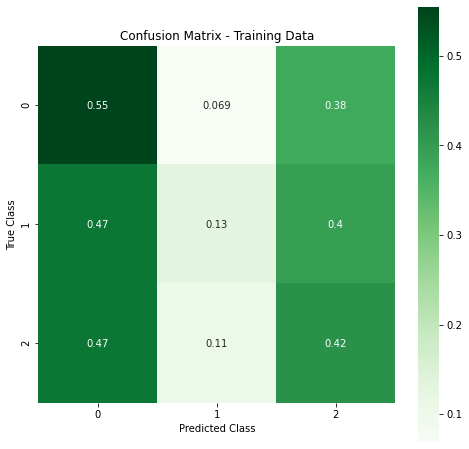




	[i] CLASSIFICATION REPORT - TEST DATA

              precision    recall  f1-score   support

           0       0.35      0.59      0.44       161
           1       0.32      0.12      0.18       169
           2       0.41      0.39      0.40       179

    accuracy                           0.36       509
   macro avg       0.36      0.37      0.34       509
weighted avg       0.36      0.36      0.34       509




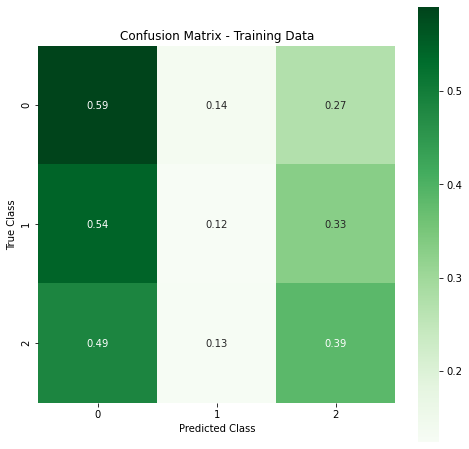

In [191]:
def make_w2v_bidrectional_lstm():
    
    early_stop = callbacks.EarlyStopping(monitor='val_loss',#mode='min',min_delta=.001
                                         patience=3,verbose=2)

    ## Make model infrastructure:
    model0 = models.Sequential()

    model0.add(embedding_layer)

    # model0.add(layers.SpatialDropout1D(0.2))
    # model0.add(layers.LSTM(units=100, return_sequences=False,
    #                        dropout=0.3,recurrent_dropout=0.3,
    #                        kernel_regularizer=regularizers.l2(.01)))
    model0.add(layers.Bidirectional(layers.LSTM(units=100, return_sequences=False,
                           dropout=0.3,recurrent_dropout=0.3,
                           kernel_regularizer=regularizers.l2(.01))))
#     model0.add(layers.Dense(50, activation='relu')) ## 06/18/21
    model0.add(layers.Dense(3, activation='softmax'))

    model0.compile(loss='categorical_crossentropy',optimizer='adam',#"adam",
                   metrics=['accuracy',tf.keras.metrics.Recall()])#,'val_acc'])#, callbacks=callbacks)
    display(model0.summary())
    return model0
    
    
    
    
model0 = make_w2v_bidrectional_lstm()
## set param
num_epochs = 10
validation_split = 0.2

clock = bs.Clock()
clock.tic()
dashes = '---'*20
print(f"{dashes}\n\tFITTING MODEL:\n{dashes}")

history0 = model0.fit(X_train_pad, y_train, 
                      epochs=num_epochs,
                      verbose=True, 
                      validation_split=validation_split,
                      batch_size=32,
                      callbacks=[early_stop],
                      class_weight=weights_dict
                     )

evaluate_network(model0,X_test_pad,y_test,history0,
                X_train = X_train_pad,y_train=y_train)

### Compare to a Dummy Classifier

[i] Training started at 06/18/21-18:55:10:
	Training time was 0.0008 seconds.

           Train  Test  Difference
accuracy   0.33  0.33        0.01 

------------------------------------------------------------
	CLASSIFICATION REPORT - TEST DATA
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.35      0.35      0.35       171
           1       0.32      0.33      0.32       168
           2       0.35      0.34      0.34       170

    accuracy                           0.34       509
   macro avg       0.34      0.34      0.34       509
weighted avg       0.34      0.34      0.34       509



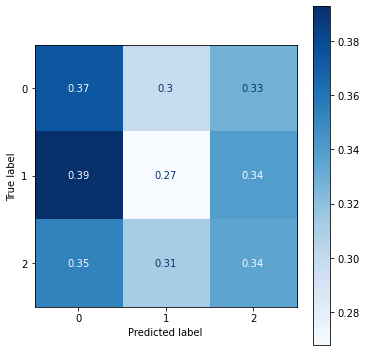

DummyClassifier(strategy='stratified')

In [78]:
from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy='stratified')
bs.ml.fit_and_time_model(clf, X_train_pad, y_train.argmax(axis=1),
                        X_test_pad,y_test.argmax(axis=1))

# clf.fit(X_train_pad, y_train.argmax(axis=1))
# preds = clf.predict(X_test_pad)
# preds

In [79]:
# y_train.argmax()

In [80]:
y_test

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

# BOOKMARK 06/17/21

In [81]:
# cm_fname = file_dict['model_0A']['fig_conf_mat.ext']
# hist_fname = file_dict['model_0A']['fig_keras_history.ext']
# summary_fname = file_dict['model_0A']['model_summary']

# df_class_report0A,fig0A=ji.evaluate_classification(model0,history0,
#                                                    X_train_pad, X_test_pad,
#                                                    y_train, y_test, 
#                                                    binary_classes=False,
#                                                    conf_matrix_classes=['Decrease','No Change','Increase'],
#                                                    normalize_conf_matrix=True, 
#                                                    save_history=True, history_filename=hist_fname,
#                                                    save_conf_matrix_png=True, conf_mat_filename=cm_fname,
#                                                    save_summary=True,summary_filename=summary_fname)

In [82]:
# ji.dict_dropdown(file_dict)

In [83]:
# reload(ji)

In [84]:
# save_me_as_model_0A=True
# save_me_as_pred_nlp = False

# ji.reload(ji)
# if save_me_as_pred_nlp:
#     model_key='nlp_model_for_predictions'

# elif save_me_as_model_0A:
#     model_key='model_0A'    
    
# filename = file_dict[model_key]['base_filename']
# nlp_files = ji.save_model_weights_params(model0,check_if_exists=True,auto_increment_name=True, 
#                                          auto_filename_suffix=True,filename_prefix=filename)

# file_dict[model_key]['output_filenames'] = nlp_files

# ji.update_file_directory(file_dict)
# ji.dict_dropdown(file_dict)

In [85]:
ihelp(model0.get_config)

------------------------------------------------------------------------------------
------ HELP ------------------------------------------------------------------------

Help on method get_config in module tensorflow.python.keras.engine.sequential:

get_config() method of tensorflow.python.keras.engine.sequential.Sequential instance
    Returns the config of the layer.
    
    A layer config is a Python dictionary (serializable)
    containing the configuration of a layer.
    The same layer can be reinstantiated later
    (without its trained weights) from this configuration.
    
    The config of a layer does not include connectivity
    information, nor the layer class name. These are handled
    by `Network` (one layer of abstraction above).
    
    Returns:
        Python dictionary.

------------------------------------------------------------------------------------
------ SOURCE ----------------------------------------------------------------------


```python
  def get_config(self):
    layer_configs = []
    for layer in super(Sequential, self).layers:
      # `super().layers` include the InputLayer if available (it is filtered out
      # of `self.layers`). Note that `self._layers` is managed by the
      # tracking infrastructure and should not be used.
      layer_configs.append(generic_utils.serialize_keras_object(layer))
    config = {
        'name': self.name,
        'layers': copy.deepcopy(layer_configs)
    }
    if not self._is_graph_network and self._build_input_shape is not None:
      config['build_input_shape'] = self._build_input_shape
    return config

```

### Model 0A Summary

## Model 0B

In [86]:
## GRU Model
from tensorflow.keras import models, layers, optimizers, regularizers

model0B = models.Sequential()

## Get and add embedding_layer
embedding_layer = ji.make_keras_embedding_layer(wv, X_train)
model0B.add(embedding_layer)
model0B.add(layers.SpatialDropout1D(0.2))
model0B.add(layers.GRU(units=100, dropout=0.5, recurrent_dropout=0.2,return_sequences=True)) 
model0B.add(layers.GRU(units=100, dropout=0.5, recurrent_dropout=0.2))

# model0.add(layers.Dense(units=50, activation='relu'))#, activation='tan' # activation='relu'))#removed 08/21

model0B.add(layers.Dense(3, activation='softmax'))

model0B.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['acc'])#,'val_acc'])#, callbacks=callbacks)
model0B.summary()

embedding_matrix.shape = (4732, 300)


IndexError: tuple index out of range

In [ ]:
ji.reload(ji)
num_epochs = 10

clock = bs.Clock()
clock.tic()
historyB = model0B.fit(X_train, y_train, epochs=num_epochs, verbose=True, validation_split=0.1,
                     batch_size=300)#, class_weight=class_weight)#callbacks=callbacks,, validation_data=(X_val))
clock.toc()


model_key = "model_0B"
cm_fname = file_dict[model_key]['fig_conf_mat.ext']
hist_fname = file_dict[model_key]['fig_keras_history.ext']
summary_fname = file_dict[model_key]['model_summary']

df_class_report0B, fig0B  = ji.evaluate_classification(model0B, historyB, 
                           X_train, X_test, y_train,y_test,
                           conf_matrix_classes=['Decrease','No Change','Increase'],
                           binary_classes=False, normalize_conf_matrix=True, 
                           save_history=True, history_filename=hist_fname, 
                           save_conf_matrix_png=True, conf_mat_filename=cm_fname,
                           save_summary=True,summary_filename=summary_fname)

In [ ]:
save_me_as_model_0B=True
save_me_as_pred_nlp = False

ji.reload(ji)
if save_me_as_pred_nlp:
    model_key='nlp_model_for_predictions'

elif save_me_as_model_0B:
    model_key='model_0B'    
    
filename = file_dict[model_key]['base_filename']
nlp_files = ji.save_model_weights_params(model0B,check_if_exists=True,auto_increment_name=True, 
                                         auto_filename_suffix=True,filename_prefix=filename)

file_dict[model_key]['output_filenames'] = nlp_files

ji.update_file_directory(file_dict)
ji.dict_dropdown(file_dict)

### Model 0B Summary

In [ ]:
ji.inspect_variables(locals())
del_me= ['one_hot_results','nlp_df','text_data']#list of variable names
for me in del_me:    
    try: 
        exec(f'del {me}')
        print(f'del {me} succeeded')
    except:
        print(f'del {me} failed')
        continue

# FORECASTING STOCK MARKET PRICE

## Loading & Processing Stock Data (SCRUB)

In [ ]:
# DISPLAY CODE TO BE USED BELOW TO LOAD AND PROCESS STOCK DATA
functions_used=['ji.load_processed_stock_data', # This script combines the oriignal 4 used:
                'ji.load_raw_stock_data_from_txt',
                'ji.set_timeindex_freq','ji.custom_BH_freq',
               'ji.get_technical_indicators']

ji.ihelp_menu(functions_used)

## Load in raw text file with minute-resolutin S&P 500 prices

## Model 1: Using Price as only feature

In [ ]:
# try:
#     stock_df
# except: 
#     print('loading')
#     stock_df = ji.load_processed_stock_data()

In [ ]:
reload(ji)
fname = file_dict['stock_df']['raw_csv_file']
raw_stock_df = ji.load_raw_stock_data_from_txt(filename = fname,
                                               verbose=2)

In [ ]:
fig = ji.plotly_time_series(raw_stock_df, y_col='BidClose',as_figure=True)
stock_df = ji.get_technical_indicators(raw_stock_df,make_price_from='BidClose')
del raw_stock_df

# SELECT DESIRED COLUMNS
stock_df = stock_df[[
    'price','ma7','ma21','26ema','12ema','MACD','20sd',
    'upper_band','lower_band','ema','momentum']]

# Make stock_price for twitter functions
stock_df.dropna(inplace=True)
ji.index_report(stock_df)
display(stock_df.head(3))

In [ ]:
ihelp_menu([ji.train_test_split_by_last_days,
           ji.make_scaler_library,
           ji.transform_cols_from_library,
           ji.make_train_test_series_gens])

In [ ]:
## SPECIFY # OF TRAINING TEST DAYS 
num_test_days=5
num_train_days= 260
### SPECIFY Number of days included in each X_sequence (each prediction)
days_for_x_window=1

# Calculate number of rows to bin for x_windows
periods_per_day = ji.get_day_window_size_from_freq( stock_df, ji.custom_BH_freq() )


## Get the number of rows for x_window 
x_window = periods_per_day * days_for_x_window#data_params['days_for_x_window'] 
print(f'X_window size = {x_window} -- ({days_for_x_window} day(s) * {periods_per_day} rows/day)\n')

## Train-test-split by the # of days
df_train, df_test = ji.train_test_split_by_last_days(stock_df,
                                                     periods_per_day =periods_per_day, 
                                                     num_test_days   = num_test_days,
                                                     num_train_days  = num_train_days,
                                                     verbose=1, iplot=True)



In [ ]:
###### RESCALE DATA USING MinMaxScalers FIT ON TRAINING DATA's COLUMNS ######
display(df_train.head(2).style.set_caption('df_train - pre-scaling'))

scaler_library, df_train = ji.make_scaler_library(df_train, transform=True, verbose=1)

df_test = ji.transform_cols_from_library(df_test, col_list=None,
                                         scaler_library=scaler_library,
                                         inverse=False)
display(df_train.head(2).style.set_caption('df_train - post-scaling'))

# Show transformed dataset
# display( df_train.head(2).round(3).style.set_caption('training data - scaled'))

# Create timeseries generators
train_generator, test_generator = ji.make_train_test_series_gens( 
    df_train['price'], df_test['price'], 
    x_window=x_window,n_features=1,batch_size=1, verbose=0)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Bidirectional, Dense, LSTM, Dropout
from tensorflow.keras.regularizers import l2

# Specifying input shape (size of samples, rank of samples?)
n_input = x_window
n_features = 1 # just stock Price

print(f'input shape: ({n_input},{n_features})')
input_shape=(n_input, n_features)

# Create model architecture
model1 = Sequential()
model1.add(LSTM(units=50, input_shape =input_shape,return_sequences=True))#,  kernel_regularizer=l2(0.01),recurrent_regularizer=l2(0.01),
#     model.add(Dropout(0.2))
model1.add(LSTM(units=50, activation='relu'))
model1.add(Dense(1))

model1.compile(loss=ji.my_rmse, metrics=['acc'],
              optimizer=optimizers.Nadam())

display(model1.summary())


In [ ]:
## FIT MODEL
dashes = '---'*20
print(f"{dashes}\n\tFITTING MODEL:\n{dashes}")

## set params
epochs=5

# override keras warnings
ji.quiet_mode(True,True,True)

# Instantiating clock timer
clock = bs.Clock()
clock.tic('')

# Fit the model
history = model1.fit_generator(train_generator,
                               epochs=epochs,
                               verbose=2, 
                               use_multiprocessing=True,
                               workers=3)


clock.toc('')


model_key = "model_1"
hist_fname = file_dict[model_key]['fig_keras_history.ext']
summary_fname = file_dict[model_key]['model_summary']

# eval_results = ji.evaluate_model_plot_history(model1, train_generator, test_generator)
ji.evaluate_regression_model(model1,history,
                             train_generator=train_generator,
                             test_generator=test_generator,
                            true_test_series=df_test['price'],
                            true_train_series =df_train['price'],
                             save_history=True,history_filename=hist_fname,
                             save_summary=True, summary_filename=summary_fname)

In [ ]:
### PREFER NEW WAY - GET DF_MODEL FIRST THEN GET EVALUATE_REGRESSION INFORMATION?
## Get true vs pred data as a dataframe and iplot
df_model1 = ji.get_model_preds_df(model1, 
                                  test_generator = test_generator,
                                  true_train_series = df_train['price'],
                                  true_test_series = df_test['price'],
                                  include_train_data=True,
                                  inverse_tf = True, 
                                  scaler = scaler_library['price'],
                                  preds_from_gen = True, 
                                  preds_from_train_preds = True, 
                                  preds_from_test_preds = True,
                                  iplot = True,
                                  verbose=0)
#                                   subplot_mode='lines+markers')
    
# Get evaluation metrics
df_results1, dfs_results1, df_shifted1 =\
ji.compare_eval_metrics_for_shifts(df_model1['true_test_price'],
                                   df_model1['pred_from_gen'],
                                   shift_list=np.arange(-4,4,1),
                                   true_train_series_to_add=df_model1['true_train_price'],
                                   display_results=True,
                                   display_U_info=True,
                                   return_results=True,
                                   return_styled_df=True,
                                   return_shifted_df=True)

In [ ]:
ji.dict_dropdown(file_dict)

In [ ]:
reload(ji)
save_model=True
ji.save_model_dfs(file_dict, 'model_1',df_model1,dfs_results1,df_shifted1)

filename_prefix = file_dict['model_1']['base_filename']
if save_model ==True:
    model_1_output_files = ji.save_model_weights_params(model1,
                                 filename_prefix=filename_prefix,
                                 auto_increment_name=True,
                                 auto_filename_suffix=True, 
                                 suffix_time_format='%m-%d-%y_%I%M%p',
                                 save_model_layer_config_xlsx=True)

### Model 1 Summary

## Model 2: Stock Price + Technical Indicators

### Technical Indicator Details

In [ ]:
# SELECT DESIRED COLUMNS
stock_df = stock_df[[
    'price','ma7','ma21','26ema','12ema','MACD','20sd',
    'upper_band','lower_band','ema','momentum']]

# Make stock_price for twitter functions
stock_df.dropna(inplace=True)
ji.index_report(stock_df)
display(stock_df.head(3))

In [ ]:
fig =ji.plotly_technical_indicators(stock_df)

1. **7 and 21 day moving averages**
```python
df['ma7'] df['price'].rolling(window = 7 ).mean() #window of 7 if daily data
df['ma21'] df['price'].rolling(window = 21).mean() #window of 21 if daily data
```    
2. **MACD(Moving Average Convergence Divergence)**

> Moving Average Convergence Divergence (MACD) is a trend-following momentumindicator that shows the relationship between two moving averages of a security’s price. The MACD is calculated by subtracting the 26-period Exponential Moving Average (EMA) from the 12-period EMA.

>The result of that calculation is the MACD line. A nine-day EMA of the MACD, called the "signal line," is then plotted on top of the MACD line, which can function as a trigger for buy and sell signals. 

> Traders may buy the security when the MACD crosses above its signal line and sell - or short - the security when the MACD crosses below the signal line. Moving Average Convergence Divergence (MACD) indicators can be interpreted in several ways, but the more common methods are crossovers, divergences, and rapid rises/falls.  - _[from Investopedia](https://www.investopedia.com/terms/m/macd.asp)_

```python
df['ewma26'] = pd.ewma(df['price'], span=26)
df['ewma12'] = pd.ewma(df['price'], span=12)
df['MACD'] = (df['12ema']-df['26ema'])
```
3. **Exponentially weighted moving average**
```python
dataset['ema'] = dataset['price'].ewm(com=0.5).mean()
```

4. **Bollinger bands**
    > "Bollinger Bands® are a popular technical indicators used by traders in all markets, including stocks, futures and currencies. There are a number of uses for Bollinger Bands®, including determining overbought and oversold levels, as a trend following tool, and monitoring for breakouts. There are also some pitfalls of the indicators. In this article, we will address all these areas."
> Bollinger bands are composed of three lines. One of the more common calculations of Bollinger Bands uses a 20-day simple moving average (SMA) for the middle band. The upper band is calculated by taking the middle band and adding twice the daily standard deviation, the lower band is the same but subtracts twice the daily std. - _[from Investopedia](https://www.investopedia.com/trading/using-bollinger-bands-to-gauge-trends/)_

    - Boilinger Upper Band:<br>
    $BOLU = MA(TP, n) + m * \sigma[TP, n ]$<br><br>
    - Boilinger Lower Band<br>
    $ BOLD = MA(TP,n) - m * \sigma[TP, n ]$
    - Where:
        - $MA$  = moving average
        - $TP$ (typical price) = $(High + Low+Close)/ 3$
        - $n$ is number of days in smoothing period
        - $m$ is the number of standard deviations
        - $\sigma[TP, n]$ = Standard Deviations over last $n$ periods of $TP$

```python
# Create Bollinger Bands
dataset['20sd'] = pd.stats.moments.rolling_std(dataset['price'],20)
dataset['upper_band'] = dataset['ma21'] + (dataset['20sd']*2)
dataset['lower_band'] = dataset['ma21'] - (dataset['20sd']*2)
```


5. **Momentum**
> "Momentum is the rate of acceleration of a security's price or volume – that is, the speed at which the price is changing. Simply put, it refers to the rate of change on price movements for a particular asset and is usually defined as a rate. In technical analysis, momentum is considered an oscillator and is used to help identify trend lines." - _[from Investopedia](https://www.investopedia.com/articles/technical/081501.asp)_

    - $ Momentum = V - V_x$
    - Where:
        - $ V $ = Latest Price
        - $ V_x $ = Closing Price
        - $ x $ = number of days ago

```python
# Create Momentum
dataset['momentum'] = dataset['price']-1
```

In [ ]:
## SPECIFY # OF TRAINING TEST DAYS 
reload(ji)
num_test_days=10
num_train_days=260
### SPECIFY Number of days included in each X_sequence (each prediction)
days_for_x_window=5

# Calculate number of rows to bin for x_windows
periods_per_day = ji.get_day_window_size_from_freq( stock_df, ji.custom_BH_freq() )


## Get the number of rows for x_window 
x_window = periods_per_day * days_for_x_window#data_params['days_for_x_window'] 
print(f'X_window size = {x_window} -- ({days_for_x_window} day(s) * {periods_per_day} rows/day)\n')

## Train-test-split by the # of days
df_train, df_test = ji.train_test_split_by_last_days(stock_df,
                                                     periods_per_day =periods_per_day, 
                                                     num_test_days   = num_test_days,
                                                     num_train_days  = num_train_days,
                                                     verbose=1, iplot=True)



In [ ]:
###### RESCALE DATA USING MinMaxScalers FIT ON TRAINING DATA's COLUMNS ######
display(df_train.head(2).style.set_caption('df_train - pre-scaling'))

scaler_library, df_train = ji.make_scaler_library(df_train, transform=True, verbose=1)

df_test = ji.transform_cols_from_library(df_test, col_list=None,
                                         scaler_library=scaler_library,
                                         inverse=False)
display(df_train.head(2).style.set_caption('df_train - post-scaling'))

# Show transformed dataset
# display( df_train.head(2).round(3).style.set_caption('training data - scaled'))

# Create timeseries generators
train_generator, test_generator = ji.make_train_test_series_gens( 
    df_train['price'], df_test['price'], 
    x_window=x_window,n_features=1,batch_size=1, verbose=0)

In [ ]:
## Make new time series generators with all stock_indicators for X_sequences
train_generator, test_generator = ji.make_train_test_series_gens(
    train_data_series=df_train,
    test_data_series=df_test,
    y_cols='price',
    x_window=x_window,
    n_features=len(df_train.columns),
    batch_size=1, verbose=1)

In [ ]:
# Create keras model from model_params
# import functions_combined_BEST as ji
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, Dense, LSTM, Dropout
from IPython.display import display
from tensorflow.keras.regularizers import l2

# Specifying input shape (size of samples, rank of samples?)
n_input = x_window #model_params['input_params']['n_input']
n_features = len(df_train.columns) # model_params['input_params']['n_features']

print(f'input shape: ({n_input},{n_features}')
input_shape=(n_input, n_features)

# Create model architecture
model2 = Sequential()
model2.add(LSTM(units=50, input_shape =input_shape,return_sequences=True))#,  kernel_regularizer=l2(0.01),recurrent_regularizer=l2(0.01),
# model2.add(Dropout(0.2))
model2.add(LSTM(units=50, activation='relu'))
model2.add(Dense(1))

model2.compile(loss=ji.my_rmse, metrics=['acc',ji.my_rmse],
              optimizer=optimizers.Nadam())

display(model2.summary())

In [ ]:
epochs=5

clock = bs.Clock()
print('---'*20)
print('\tFITTING MODEL:')
print('---'*20,'\n')     

# start the timer
clock.tic('')

# Fit the model
history = model2.fit_generator(train_generator,epochs=epochs) 
clock.toc('')

model_key = "model_2"
hist_fname = file_dict[model_key]['fig_keras_history.ext']
summary_fname = file_dict[model_key]['model_summary']

# eval_results = ji.evaluate_model_plot_history(model1, train_generator, test_generator)
ji.evaluate_regression_model(model2,history,
                             train_generator=train_generator,
                             test_generator=test_generator,
                            true_test_series=df_test['price'],
                            true_train_series =df_train['price'],
                             save_history=True,history_filename=hist_fname,
                             save_summary=True, summary_filename=summary_fname)

In [ ]:
### PREFER NEW WAY - GET DF_MODEL FIRST THEN GET EVALUATE_REGRESSION INFORMATION?
## Get true vs pred data as a dataframe and iplot
df_model2 = ji.get_model_preds_df(model2, 
                                  test_generator=test_generator,
                                  true_train_series = df_train['price'],
                                  true_test_series = df_test['price'],
                                  x_window=x_window,
                                  n_features=len(df_train.columns),
                                  scaler=scaler_library['price'],
                                  preds_from_gen=True, 
                                  inverse_tf=True,
                                  iplot=True)

# Compare predictions if predictions timebins shifted
df_results2, dfs_results2, df_shifted2 =\
ji.compare_eval_metrics_for_shifts(df_model2['true_test_price'],
                                   df_model2['pred_from_gen'],
                                   shift_list=np.arange(-4,5,1),
                                   true_train_series_to_add=df_model2['true_train_price'],
                                   display_results=True,
                                   return_styled_df=True,
                                   display_U_info=False,
                                   return_shifted_df=True,
                                   return_results=True)

In [ ]:
##SAVING DFS
ji.save_model_dfs(file_dict,'model_2',
               df_model=df_model2,
              df_results=dfs_results2,
              df_shifted=df_shifted2)

In [ ]:
df_results2, dfs_results2, df_shifted2 =\
ji.compare_eval_metrics_for_shifts(df_model2['true_test_price'],
                                   df_model2['pred_from_gen'],
                                   shift_list=np.arange(-4,5,1),
                                   true_train_series_to_add=df_model2['true_train_price'],
                                   display_results=True,
                                   return_styled_df=True,
                                   display_U_info=False,
                                   return_shifted_df=True,
                                   return_results=True)

### Model 2: Summary

# PART 4: COMBINING TWEET STATS, NLP CLASSIFICATION, AND MARKET DATA

1. Load up stock data in CBH form
2. Load up twitter data without NLP
3. Create time_interval_bins ...
    - from *stock CBH* time index
4. Check twitter_df for any tweets from 1_hour prior
5. Extract the 'content' column and retweet/fav counts 


    

In [ ]:
file_dict=ji.def_filename_dictionary(load_prior=False,save_directory=True)

In [ ]:
# LOAD IN FULL STOCK DATASET using ClosingBig S&P500 WITH INDEX.FREQ=CBH
fname = file_dict['stock_df']['stock_df_with_indicators']
full_df = ji.load_processed_stock_data(processed_data_filename=fname)

# SELECT DESIRED COLUMNS
stock_df = full_df[[
    'price','ma7','ma21','26ema','12ema','MACD',
    '20sd','upper_band','lower_band','ema','momentum'
]]

stock_df.head()

stock_df['date_time'] = stock_df.index.to_series()
ji.index_report(stock_df)

stock_df.sort_index(inplace=True)
display(stock_df.head(2),stock_df.tail(2))
del full_df

In [ ]:
## LOAD IN RAW TWITTER DATA, NO PROCESSING
twitter_df= ji.load_raw_twitter_file(filename='data/trumptwitterarchive_export_iphone_only__08_23_2019.csv',
                                     date_as_index=True,
                                     rename_map={'text': 'content', 'created_at': 'date'})
twitter_df = ji.check_twitter_df(twitter_df,text_col='content',remove_duplicates=True, remove_long_strings=True)


In [ ]:
# MAKE TIME INTERVALS BASED ON BUSINESS HOUR START (09:30-10:30)
clock = bs.Clock(verbose=1)
clock.tic()

time_intervals= \
ji.make_time_index_intervals(stock_df,
                             col='date_time', 
                             closed='right',
                             return_interval_dicts=False) 
clock.lap('time_intervals created.')


## USE THE TIME INDEX TO FILTER OUT TWEETS FROM THE HOUR PRIOR
twitter_df, bin_codes = ji.bin_df_by_date_intervals(twitter_df ,time_intervals)
stock_df, bin_codes_stock = ji.bin_df_by_date_intervals(stock_df, time_intervals, column='date_time')

clock.lap('bins added to dataframes')
# display(twitter_df.head(2), stock_df.head(2))

## COLLAPSE DFs BY CODED BINS
twitter_grouped = ji.collapse_df_by_group_index_col(twitter_df,
                                                    group_index_col='int_bins',
                                                    drop_orig=True,
                                                    verbose=0)

stocks_grouped = ji.collapse_df_by_group_index_col(stock_df,
                                                    drop_orig=True,
                                                    group_index_col='int_bins', 
                                                  verbose=0)

clock.toc('collapsed dfs to _grouped')
display(twitter_grouped.head(3),stocks_grouped.head(3))

In [ ]:
ihelp_menu(ji.merge_stocks_and_tweets)

In [ ]:
## STOCKS AND TWEETS 
df_combined = ji.merge_stocks_and_tweets(stocks_grouped, 
                                      twitter_grouped,
                                      on='int_bins',how='left',
                                      show_summary=True)

In [ ]:
ji.column_report(df_combined)

In [ ]:
## Check for and address new null values
ji.check_null_small(df_combined);
cols_to_fill_zeros = ['num_tweets','total_retweet_count','total_favorite_count']
for col in cols_to_fill_zeros:
    idx_null = ji.find_null_idx(df_combined, column=col)
    df_combined.loc[idx_null,col] = 0

cols_to_fill_blank_str = ['group_content','source','tweet_times','is_retweet']
for col in cols_to_fill_blank_str:
    idx_null = ji.find_null_idx(df_combined, column=col)
    df_combined.loc[idx_null, col] = ""
ji.check_null_small(df_combined);

In [ ]:
ji.dict_dropdown(file_dict)

fname = file_dict['df_combined']['pre_nlp']
df_combined.to_csv(fname)
print(fname)

In [ ]:
## Add nlp
df_nlp = ji.full_twitter_df_processing(df_combined,'group_content',force=True)
ji.column_report(df_nlp, as_qgrid=True)

In [ ]:
df_nlp.head()

In [ ]:
## Use case ratio null values as index to replace values
idx_null= ji.check_null_small(df_nlp,null_index_column='case_ratio')
df_nlp.loc[idx_null,'case_ratio'] = 0.0
ji.check_null_small(df_nlp)

## replace sentiment_class, set =-1
cols_to_replace_misleading_values = ['sentiment_class']
for col in cols_to_replace_misleading_values:
    df_nlp.loc[idx_null,col] = -1

## remap sentiment class
sent_class_mapper = {'neg':0,
                     -1:1,
                    'pos':2}
df_nlp['sentiment_class'] = df_nlp['sentiment_class'].apply(lambda x: sent_class_mapper[x])

bool_cols_to_ints = ['has_tweets']
for col in bool_cols_to_ints:
    df_nlp[col] = df_nlp[col].apply(lambda x: 1 if x==True else 0)
    

In [ ]:
df_nlp.head()

In [ ]:
ji.display_same_tweet_diff_cols(df_nlp.groupby('has_tweets').get_group(True),
                                columns=['group_content','content_min_clean','cleaned_stopped_lemmas'],as_md=True)

In [ ]:
ji.check_twitter_df(df_nlp,char_limit=61*350)
# get_floats = df_nlp['content_min_clean'].apply(lambda x: isinstance(x,float))


In [ ]:
fname =file_dict['df_combined']['post_nlp']
df_nlp.to_csv(fname)
print(f'saved to {fname}')

### Loading in NLP Model for Predictions

In [ ]:
ji.dict_dropdown(file_dict)

In [ ]:
def get_most_recent_filenames(full_filename,str_to_find=None):
    import os
    import time
    fparts = full_filename.split('/')
    folder = '/'.join(fparts[0:-1])
    name = fparts[-1]
    
    filelist = os.listdir(folder)

    mtimes = [['file','date modified']]
    for file in filelist:
        if str_to_find is None:
            mtimes.append([file, time.ctime(os.path.getmtime(folder+'/'+file))])
        elif str_to_find in file:
            mtimes.append([file, time.ctime(os.path.getmtime(folder+'/'+file))])
    res = bs.list2df(mtimes)
    res['date modified'] = pd.to_datetime(res['date modified'])
    res.set_index('date modified',inplace=True)
    res.sort_index(ascending=False, inplace=True)
    
    most_recent = res.iloc[0]
    import re
    re.compile(r'()')
    
    return    res

In [ ]:
res = get_most_recent_filenames(file_dict['model_0A']['base_filename'])
res.iloc[0:10]

In [ ]:
reload(ji)

In [ ]:
## Load the nlp model and weights with layers set trainable=False
base_fname = file_dict['nlp_model_for_predictions']['base_filename']
nlp_model,df_model_layers =  ji.load_model_weights_params(base_filename= base_fname,#'models/NLP/nlp_model0B__09-02-2019_0121pm',
                                        load_model_params=False,
                                        load_model_layers_excel=True,
                                        trainable=False)
## Load in Word2Vec model from earlier
w2v_model = io.load_word2vec(file_dict=file_dict)

### Get Predictions for Hour-Binned Tweets

In [ ]:
ihelp_menu([ji.get_tokenizer_and_text_sequences,
           ji.replace_embedding_layer])

In [ ]:
ji.column_report(df_nlp)

In [ ]:
## GET X_SEQUENES FOR BINNED TWEETS AND CREATE NEW EMBEDDING LAYER FOR THEIR SIZE
reload(ji)
text_data=df_nlp['cleaned_stopped_lemmas']
tokenizer, X_sequences = ji.get_tokenizer_and_text_sequences(w2v_model,text_data)

new_nlp_model = ji.replace_embedding_layer(nlp_model,w2v_model,text_data,verbose=2)
new_nlp_model.summary()

In [ ]:
## GET PREDICTIONS FROM NEW MODEL
preds = new_nlp_model.predict_classes(X_sequences)
print(type(preds), preds.shape)
ji.check_y_class_balance(preds)

In [ ]:
## add to df
df_nlp['pred_classes_int'] = preds
mapper= {0:'neg',
        1:'no_change',
        2:'pos'}
df_nlp['pred_classes'] = df_nlp['pred_classes_int'].apply(lambda x: mapper[x])
display(df_nlp.head())

In [ ]:
ji.dict_dropdown(file_dict)

In [ ]:
# fname = file_dict['df_combined']['with_preds']

# df_nlp.to_csv(fname)
# print(fname)

## Model 3: Stock Price + Indicators + NLP Preds & Tweet Features

In [ ]:
## IMPORT CUSTOM CAPSTONE FUNCTIONS
import functions_combined_BEST as ji
import functions_io as io

from functions_combined_BEST import ihelp, ihelp_menu,\
reload, inspect_variables

## IMPORT MY PUBLISHED PYPI PACKAGE 
import bs_ds as  bs
from bs_ds.imports import *

## IMPORT CONVENIENCE FUNCTIONS
from pprint import pprint
import qgrid
import json

# Import plotly and cufflinks for iplots
import plotly
import cufflinks as cf
from plotly import graph_objs as go
from plotly.offline import iplot
cf.go_offline()

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

#Set pd.set_options for tweet visibility
pd.set_option('display.max_colwidth',100)
pd.set_option('display.max_columns',50)

file_dict = io.def_filename_dictionary(load_prior=False, save_directory=True)
# file_dict = ji.load_filename_directory()

In [ ]:
df_combined = pd.read_csv('data/__combined_stock_data_with_tweet_preds.csv', index_col=0,parse_dates=True)
df_combined.head()

### Finalize colums for final model

In [ ]:
model_col_list = ['price', 'ma7', 'ma21', '26ema', '12ema', 'MACD', '20sd', 'upper_band','lower_band', 'ema', 'momentum',
                  'has_tweets','num_tweets','case_ratio', 'compound_score','pos','neu','neg','sentiment_class',
                  'pred_classes','pred_classes_int','total_favorite_count','total_retweet_count']

df_combined = ji.set_timeindex_freq(df_combined,fill_nulls=False)

df_to_model = df_combined[model_col_list].copy()#df_nlp[model_col_list].copy()
# df_to_model.to_csv('data/_df_to_model_final_model.csv')
df_to_model.head()

In [ ]:
# del_me= ['X_sequences','df_nlp','twitter_grouped','bin_codes_stock','bin_codes']#list of variable names
# for me in del_me:    
#     try: 
#         exec(f'del {me}')
#         print(f'del {me} succeeded')
#     except:
#         print(f'del {me} succeeded')
#         continue
# ji.inspect_variables(locals())


In [ ]:
## SPECIFY # OF TRAINING TEST DAYS 
reload(ji)
num_test_days=5
num_train_days=260
### SPECIFY Number of days included in each X_sequence (each prediction)
days_for_x_window=1

cols_to_exclude = ['pred_classes','has_tweets']
# Calculate number of rows to bin for x_windows
periods_per_day = ji.get_day_window_size_from_freq(df_to_model.drop(cols_to_exclude,axis=1), ji.custom_BH_freq() )


## Get the number of rows for x_window 
x_window = periods_per_day * days_for_x_window#data_params['days_for_x_window'] 
print(f'X_window size = {x_window} -- ({days_for_x_window} day(s) * {periods_per_day} rows/day)\n')

## Train-test-split by the # of days
df_train, df_test = ji.train_test_split_by_last_days(df_to_model.drop(cols_to_exclude,axis=1),
                                                     periods_per_day =periods_per_day, 
                                                     num_test_days   = num_test_days,
                                                     num_train_days  = num_train_days,
                                                     verbose=1, iplot=True)



In [ ]:
###### RESCALE DATA USING MinMaxScalers FIT ON TRAINING DATA's COLUMNS ######
display(df_train.head(2).style.set_caption('df_train - pre-scaling'))

scaler_library, df_train = ji.make_scaler_library(df_train, transform=True, verbose=1)

df_test = ji.transform_cols_from_library(df_test, col_list=None,
                                         scaler_library=scaler_library,
                                         inverse=False)
display(df_train.head(2).style.set_caption('df_train - post-scaling'))

# Show transformed dataset
# display( df_train.head(2).round(3).style.set_caption('training data - scaled'))

# Create timeseries generators
train_generator, test_generator = ji.make_train_test_series_gens(
    train_data_series=df_train,
    test_data_series=df_test,
    y_cols='price',
    x_window=x_window,
    n_features=len(df_train.columns),
    batch_size=1, verbose=1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Bidirectional, Dense, LSTM, Dropout
from IPython.display import display
from tensorflow.keras.regularizers import l2

# Specifying input shape (size of samples, rank of samples?)
n_input =x_window
n_features = len(df_train.columns)
print(f'input shape: ({n_input},{n_features})')
input_shape=(n_input, n_features)

# Create model architecture
model3 = Sequential()
model3.add(LSTM(units=100, input_shape =input_shape,return_sequences=True,dropout=0.3,recurrent_dropout=0.3))#,  kernel_regularizer=l2(0.01),recurrent_regularizer=l2(0.01),
model3.add(LSTM(units=100, activation='relu', return_sequences=False,dropout=0.3,recurrent_dropout=0.3))
#     model.add(Dense(units=10, activation='relu'))
model3.add(Dense(1))#,activation='relu'))


model3.compile(loss=ji.my_rmse, metrics=['acc'],optimizer=optimizers.Nadam())
    
model3.summary()

In [ ]:
## FIT MODEL
dashes = '---'*20
print(f"{dashes}\n\tFITTING MODEL:\n{dashes}")

## set params
epochs=5

# override keras warnings
ji.quiet_mode(True,True,True)

# Instantiating clock timer
clock = bs.Clock()
clock.tic('')

# Fit the model
history = model3.fit_generator(train_generator,
                               epochs=epochs,
                               verbose=2, 
                               use_multiprocessing=True,
                               workers=3)
clock.toc('')

model_key = "model_3"
hist_fname = file_dict[model_key]['fig_keras_history.ext']
summary_fname = file_dict[model_key]['model_summary']

# eval_results = ji.evaluate_model_plot_history(model1, train_generator, test_generator)
ji.evaluate_regression_model(model3,history,
                             train_generator=train_generator,
                             test_generator=test_generator,
                            true_test_series=df_test['price'],
                            true_train_series =df_train['price'],
                             save_history=True,history_filename=hist_fname,
                             save_summary=True, summary_filename=summary_fname)

In [ ]:
### PREFER NEW WAY - GET DF_MODEL FIRST THEN GET EVALUATE_REGRESSION INFORMATION?
## Get true vs pred data as a dataframe and iplot
df_model3 = ji.get_model_preds_df(model3, 
                                  test_generator = test_generator,
                                  true_train_series = df_train['price'],
                                  true_test_series = df_test['price'],
                                  include_train_data=True,
                                  inverse_tf = True, 
                                  scaler = scaler_library['price'],
                                  preds_from_gen = True, 
                                  iplot = False,
                                  verbose=1)
#                                   subplot_mode='lines+markers')
ji.plotly_true_vs_preds_subplots(df_model3)
    
# Get evaluation metrics
df_results3, dfs_results3, df_shifted3 =\
ji.compare_eval_metrics_for_shifts(df_model3['true_test_price'],
                                   df_model3['pred_from_gen'],
                                   shift_list=np.arange(-4,4,1),
                                   true_train_series_to_add=df_model3['true_train_price'],
                                   display_results=True,
                                   display_U_info=True,
                                   return_results=True,
                                   return_styled_df=True,
                                   return_shifted_df=True)


save_model=True
ji.save_model_dfs(file_dict, 'model_3',df_model3,dfs_results3,df_shifted3)

In [ ]:
reload(ji)
filename_prefix = file_dict['model_3']['base_filename']
if save_model ==True:
    model_3_output_files = bs.save_model_weights_params(model3,
                                 filename_prefix=filename_prefix,
                                 auto_increment_name=True,
                                 auto_filename_suffix=True, 
                                 suffix_time_format='%m-%d-%y_%I%M%p',
                                 save_model_layer_config_xlsx=True)

### Model 3 Summary

## Model X: XGB Regression + Feature Importance


In [ ]:
## SPECIFY # OF TRAINING TEST DAYS 
reload(ji)
num_test_days=20
num_train_days=2*52*5
### SPECIFY Number of days included in each X_sequence (each prediction)
days_for_x_window=1

cols_to_exclude = ['pred_classes','has_tweets']
# Calculate number of rows to bin for x_windows
periods_per_day = ji.get_day_window_size_from_freq(df_to_model.drop(cols_to_exclude,axis=1), ji.custom_BH_freq() )


## Get the number of rows for x_window 
x_window = periods_per_day * days_for_x_window#data_params['days_for_x_window'] 
print(f'X_window size = {x_window} -- ({days_for_x_window} day(s) * {periods_per_day} rows/day)\n')

## Train-test-split by the # of days
df_train, df_test = ji.train_test_split_by_last_days(df_to_model.drop(cols_to_exclude,axis=1),
                                                     periods_per_day =periods_per_day, 
                                                     num_test_days   = num_test_days,
                                                     num_train_days  = num_train_days,
                                                     verbose=1, iplot=True)

###### RESCALE DATA USING MinMaxScalers FIT ON TRAINING DATA's COLUMNS ######
display(df_train.head(2).style.set_caption('df_train - pre-scaling'))

scaler_library, df_train = ji.make_scaler_library(df_train, transform=True, verbose=1)

df_test = ji.transform_cols_from_library(df_test, col_list=None,
                                         scaler_library=scaler_library,
                                         inverse=False)
display(df_train.head(2).style.set_caption('df_train - post-scaling'))


In [ ]:
## Shift price values such that the y-value being predicted is the following hour's Closing Price
df_train['price_shifted'] = df_train['price'].shift(-1)
df_test['price_shifted'] = df_test['price'].shift(-1)

display(df_train[['price','price_shifted','momentum','ema','num_tweets',]].head(10))

# Drop the couple of null values created by the shift
df_train.dropna(subset=['price_shifted'], inplace=True)
df_test.dropna(subset=['price_shifted'], inplace=True)

## Drop columns and make train-test-X and y
target_col = 'price_shifted'
drop_cols = ['price_shifted','price']

X_train = df_train.drop(drop_cols,axis=1)
y_train = df_train[target_col]
X_test = df_test.drop(drop_cols,axis=1)
y_test = df_test[target_col]

In [ ]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

reg = xgb.XGBRegressor(n_estimators=1000,silent=False,max_depth=4)

reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)


## Get Predictions
pred_price = reg.predict(X_test)
pred_price_series = pd.Series(pred_price,index=df_test.index,name='pred_test_price')#.plot()
df_xgb = pd.concat([df_train['price'].rename('true_train_price'), pred_price_series,df_test['price'].rename('true_test_price')],axis=1)


df_results = ji.evaluate_regression(df_test['price'], pred_price_series,show_results=True);


fig = ji.plotly_true_vs_preds_subplots(df_xgb,true_train_col='true_train_price',
                                true_test_col='true_test_price',
                                pred_test_columns='pred_test_price')


## PLOT FEATURE IMPORTANCE
feature_importance={}
for import_type in ['weight','gain','cover']:
    reg.importance_type = import_type
    cur_importances = reg.feature_importances_
    feature_importance[import_type] = pd.Series(data = cur_importances,
                                               index=df_train.drop(drop_cols,axis=1).columns,
                                               name=import_type)

df_importance = pd.DataFrame(feature_importance)
    
importance_fig = df_importance.sort_values(by='weight', ascending=True).iplot(kind='barh',theme='solar',
                                                                    title='Feature Importance',
                                                                    xTitle='Relative Importance<br>(sum=1.0)',
                                                                    asFigure=True)

iplot(importance_fig)

In [ ]:
# from plotly.offline import plot,iplot
# html_fig = plot(importance_fig,output_type='div')

# with open ('html_importance_fig.html','w') as f:
#     f.write(html_fig)

In [ ]:
# Compare predictions if predictions timebins shifted
df_resultsX, dfs_resultsX, df_shiftedX =\
ji.compare_eval_metrics_for_shifts(df_xgb['true_test_price'],
                                   df_xgb['pred_test_price'],
                                   shift_list=np.arange(-4,5,1),
                                   true_train_series_to_add=df_xgb['true_train_price'],
                                   display_results=True,
                                   return_styled_df=True,
                                   display_U_info=False,
                                   return_shifted_df=True,
                                   return_results=True)
df_importance.to_csv('results/modelxgb/df_importance.csv')

ji.save_model_dfs(file_dict, 'model_xgb',df_xgb,dfs_resultsX,df_shiftedX)

In [ ]:
tree_vis = xgb.to_graphviz(reg)#,**{'format':'svg'})

tree_vis.render("xgb_full_model_",format="pdf",)

### Model Interpretation

In [ ]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(reg)
shap_values = explainer.shap_values(X_train)
shap_interaction_values = explainer.shap_interaction_values(X_train)

In [ ]:
shap.summary_plot(shap_interaction_values,X_train)

In [ ]:
shap.summary_plot(shap_values, features=X_train)

### Model X Summary

In [ ]:
# importance_fig = df_importance.sort_values(by='weight', ascending=True).iplot(kind='barh',theme='solar',
#                                                                     title='Feature Importance',
#                                                                     xTitle='Relative Importance<br>(sum=1.0)',
#                                                                     asFigure=True)

# iplot(importance_fig)

# Summary

In [ ]:
dfs_list = {'Model 1':dfs_results1,
            'Model 2':dfs_results2,
            'Model 3':dfs_results3,
            'XGB Regressor':dfs_resultsX}
for k,v in dfs_list.items():
    new_cap = f'Evaluation Metrics for {k}'
    display(v.set_caption(new_cap))
#     [display(x.set_cat) for x in dfs_list]